# Phishing Website Detector - Domain Shield AI

Problem Statement:

The objective of this project is to develop an effective machine learning model capable of distinguishing between legitimate and phishing websites based on a comprehensive set of features associated with each website. The dataset, consisting of 88,647 instances, serves as input for the machine learning process. Each instance is represented by 111 features, contributing to the classification of websites into two classes: legitimate (labeled as 0) and phishing (labeled as 1).

Dataset Overview:

- Total Instances: 88,647
- Legitimate Website Instances (labeled as 0): 58,000
- Phishing Website Instances (labeled as 1): 30,647

Feature Set:

The dataset includes a diverse set of 111 features, capturing various aspects of website characteristics such as URL structure, domain attributes, temporal information, IP-related details, and other relevant parameters. These features are designed to encapsulate the distinctive traits of both legitimate and phishing websites.

Objective:

The primary goal is to develop a robust machine learning model that can effectively classify websites as either legitimate or phishing based on the provided feature set. The model should exhibit high accuracy, precision, and recall, demonstrating its ability to accurately identify instances of phishing while minimizing false positives and false negatives.

Significance:

The ability to accurately identify phishing websites is crucial for ensuring online security. Phishing attacks pose a significant threat to users by attempting to deceive them into disclosing sensitive information. A successful machine learning model can contribute to enhancing cybersecurity measures, thereby safeguarding users from potential risks associated with malicious online activities.

Challenges:

The challenges in this project involve navigating through a high-dimensional feature space, addressing class imbalance, and ensuring the model's generalization across a diverse range of website instances. Additionally, interpreting the significance of individual features and understanding their impact on the classification process will be crucial for model transparency and reliability.

Expected Outcome:

The successful development of a machine learning model with the ability to accurately classify websites will empower users and security systems to proactively identify and mitigate potential phishing threats, contributing to a safer online environment.



# Importing Required Packages

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Import the data as pandasDataframe

In [5]:
df = pd.read_csv('data/Input.csv')
pd.set_option('display.max_columns', None)
df.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_equal_url  qty_at_url  qty_and_url  qty_tld_url  length_url  \
0              0           0            0            1          25   
1              3           0            2            3         223   
2              0           0            0            1          15   
3              0           0            0            1          81   
4              0           0            0            1          19   

   qty_dot_domain  qty_dot_directory  qty_hyphen_directory  \
0               2                  1                     0   
1               2                  3                     0   
2               2                  0                     0   
3               2                  2                     0   
4               2                 -1                    -1   

   qty_underline_directory  qty_slash_directory  qty_questionmark_directory  \
0                        0                    1                           0   
1                        0                    3                           0   
2                        0                    1                           0   
3                        2                    5                           0   
4                       -1                   -1                          -1   

   qty_equal_directory  qty_at_directory  qty_and_directory  \
0                    0                 0                  0   
1                    0                 0                  0   
2                    0                 0                  0   
3                    0                 0                  0   
4                   -1                -1                 -1   

   qty_exclamation_directory  qty_space_directory  qty_tilde_directory  \
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                         -1                   -1                   -1   

   qty_comma_directory  qty_plus_directory  qty_asterisk_directory  \
0                    0                   0                       0   
1                    0                   0                       0   
2                    0                   0                       0   
3                    0                   0                       0   
4                   -1                  -1                      -1   

   qty_hashtag_directory  qty_dollar_directory  qty_percent_directory  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      0   
4                     -1                    -1                     -1   

   directory_length  qty_dot_file  qty_hyphen_file  qty_underline_file  \
0                 8             1                0                   0   
1                42             1                0                   0   
2                 1             0                0                   0   
3                62             1                0                   0   
4                -1            -1               -1                  -1   

   qty_slash_file  qty_questionmark_file  qty_equal_file  qty_at_file  \
0               0                      0               0            0   
1               0                      0          

In [6]:
## checking no. of rows and columns
df.shape

(88647, 74)

# Checking Null Values

In [7]:
df.isnull().sum()

qty_dot_url               0
qty_hyphen_url            0
qty_underline_url         0
qty_slash_url             0
qty_equal_url             0
                         ..
time_domain_activation    0
time_domain_expiration    0
qty_ip_resolved           0
ttl_hostname              0
phishing                  0
Length: 74, dtype: int64

# Checking Data Type Information

In [8]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   qty_dot_url                 88647 non-null  int64
 1   qty_hyphen_url              88647 non-null  int64
 2   qty_underline_url           88647 non-null  int64
 3   qty_slash_url               88647 non-null  int64
 4   qty_equal_url               88647 non-null  int64
 5   qty_at_url                  88647 non-null  int64
 6   qty_and_url                 88647 non-null  int64
 7   qty_tld_url                 88647 non-null  int64
 8   length_url                  88647 non-null  int64
 9   qty_dot_domain              88647 non-null  int64
 10  qty_dot_directory           88647 non-null  int64
 11  qty_hyphen_directory        88647 non-null  int64
 12  qty_underline_directory     88647 non-null  int64
 13  qty_slash_directory         88647 non-null  int64
 14  qty_qu

# Checking Duplicated Values

In [9]:
df.duplicated().sum()

5368

# Checking the number of unique values of each column

In [10]:
df.nunique()

qty_dot_url                  23
qty_hyphen_url               30
qty_underline_url            22
qty_slash_url                25
qty_equal_url                20
                          ...  
time_domain_activation     8790
time_domain_expiration     3093
qty_ip_resolved              17
ttl_hostname              10171
phishing                      2
Length: 74, dtype: int64

# Checking Statistics of dataset

In [11]:
df.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_equal_url    qty_at_url   qty_and_url   qty_tld_url    length_url  \
count   88647.000000  88647.000000  88647.000000  88647.000000  88647.000000   
mean        0.205861      0.022133      0.140885      1.047480     36.347615   
std         0.954272      0.279652      0.924864      0.254755     46.191590   
min         0.000000      0.000000      0.000000      0.000000      4.000000   
25%         0.000000      0.000000      0.000000      1.000000     17.000000   
50%         0.000000      0.000000      0.000000      1.000000     22.000000   
75%         0.000000      0.000000      0.000000      1.000000     38.000000   
max        23.000000     43.000000     26.000000     12.000000   4165.000000   

       qty_dot_domain  qty_dot_directory  qty_hyphen_directory  \
count    88647.000000       88647.000000          88647.000000   
mean         1.870622          -0.323666             -0.360813   
std          0.705607           0.899499              1.101398   
min          0.000000          -1.000000             -1.000000   
25%          1.000000          -1.000000             -1.000000   
50%          2.000000          -1.000000             -1.000000   
75%          2.000000           0.000000              0.000000   
max         21.000000          19.000000             23.000000   

       qty_underline_directory  qty_slash_directory  \
count             88647.000000         88647.000000   
mean                 -0.477997             0.713685   
std                   0.682409             2.216137   
min                  -1.000000            -1.000000   
25%                  -1.000000            -1.000000   
50%                  -1.000000            -1.000000   
75%                   0.000000             2.000000   
max                  17.000000            22.000000   

       qty_questionmark_directory  qty_equal_directory  qty_at_directory  \
count                88647.000000         88647.000000      88647.000000   
mean                    -0.535935            -0.528343         -0.532550   
std                      0.498710             0.517986          0.551786   
min                     -1.000000            -1.000000         -1.000000   
25%                     -1.000000            -1.000000         -1.000000   
50%                     -1.000000            -1.000000         -1.000000   
75%                      0.000000             0.000000          0.000000   
max                      0.000000             5.000000         43.000000   

       qty_and_directory  qty_exclamation_directory  qty_space_directory  \
count       88647.000000               88647.000000         88647.000000   
mean           -0.531422                  -0.534310            -0.535145   
std             0.538253                   0.504044             0.503964   
min            -1.000000                  -1.000000            -1.000000   
25%            -1.000000                  -1.000000            -1.000000   
50%            -1.000000                  -1.000000            -1.000000   
75%             0.000000                   0.000000             0.000000   
max            26.000000                   9.000000             9.000000   

       qty_tilde_directory  qty_comma_directory  qty_plus_directory  \
count         88647.000000         88647.000000        88647.000000   
mean             -0.532765

# Insights
1. Qty-related Features :
- For many features, the mean and median values are close, suggesting a symmetric distribution.

2. Length-related Features:
- The length-related features ('length_url', 'directory_length', 'file_length', 'params_length') have varying ranges, with significant differences between their mean and median values.

3. Phishing Label:
- The target variable phishing is binary (0 or 1), indicating whether a URL is associated with phishing (1) or not (0).
- The dataset contains more non-phishing instances (0) than phishing instances (1).

4. Temporal Features:
- Features related to time (e.g., 'time_domain_activation', 'time_domain_expiration') have a wide range of values, indicating differences in the activation and expiration times of domains.

5. IP-related Features:
- Features related to IP addresses (asn_ip, qty_ip_resolved) also show variations, but further analysis is needed to interpret their significance.

6. TTL and Hostname:
- 'ttl_hostname' has a wide range, indicating differences in Time-to-Live values for hostnames.

7. Correlation and Scaling:
- The range of values for different features suggests that scaling might be beneficial for certain machine learning algorithms.
- The correlation between features and their impact on the target variable would be important to investigate for feature selection.

8. Outliers:
- The presence of outliers in some features, especially those related to quantities, underscores the need for outlier detection and handling.
 





   

# Getting The no. of Numerical, Discrete, Continuous and Categorical Features :

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 25]
continuous_features = [feature for feature in df.columns if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Numerical Features count : {len(numerical_features)}")
print(f"Numerical Features are as follows :\n {numerical_features}\n")

print(f"Discrete Features count : {len(discrete_features)}")
print(f"Discrete Features are as follows :\n {discrete_features}\n")

print(f"Continuous Features count : {len(continuous_features)}")
print(f"Continuous Features are as follows :\n {continuous_features}\n")

print(f"Categorical Features count : {len(categorical_features)}")
print(f"Categorical Features are as follows :\n {categorical_features}")

Numerical Features count : 74
Numerical Features are as follows :
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'file_length', 

# Showing the feature having missing values


In [13]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

[]

# Insight :

- The dataset is meticulously curated, demonstrating a notable absence of missing values, ensuring the reliability and completeness of the data for thorough exploratory data analysis.

# Checking Outliers

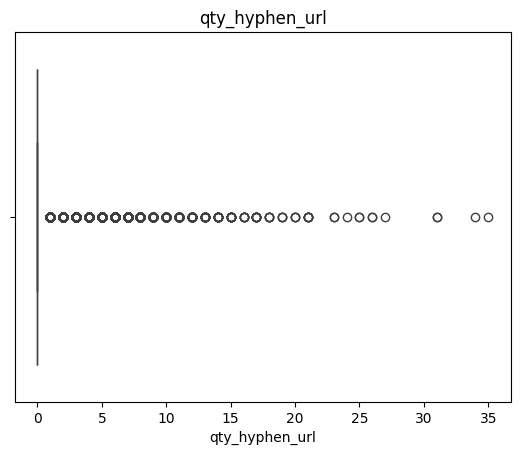

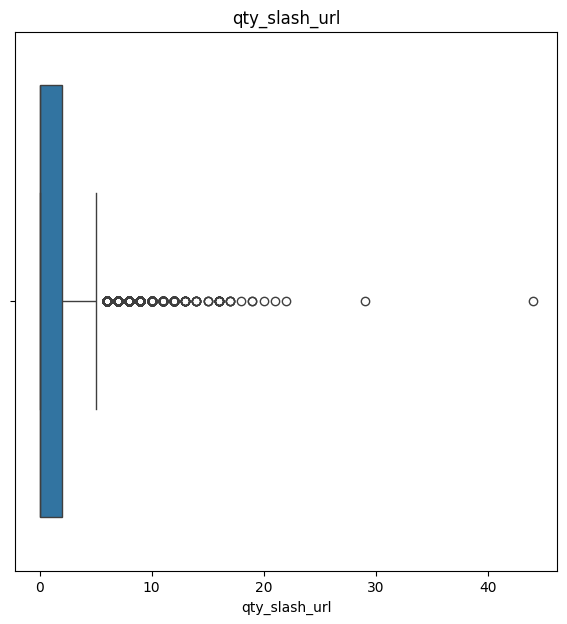

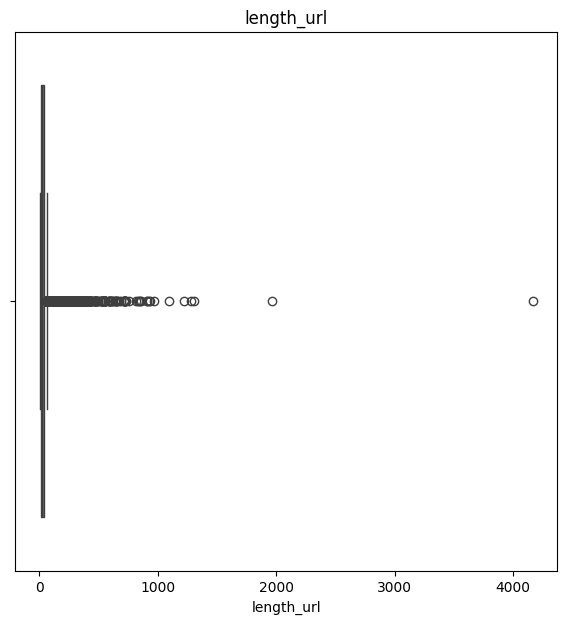

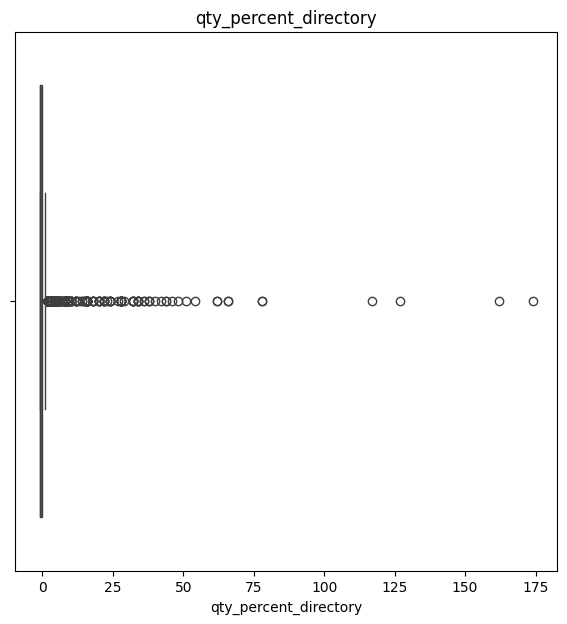

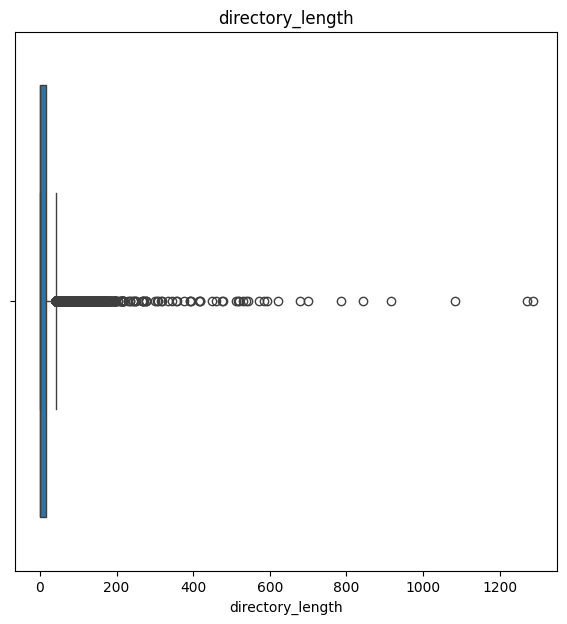

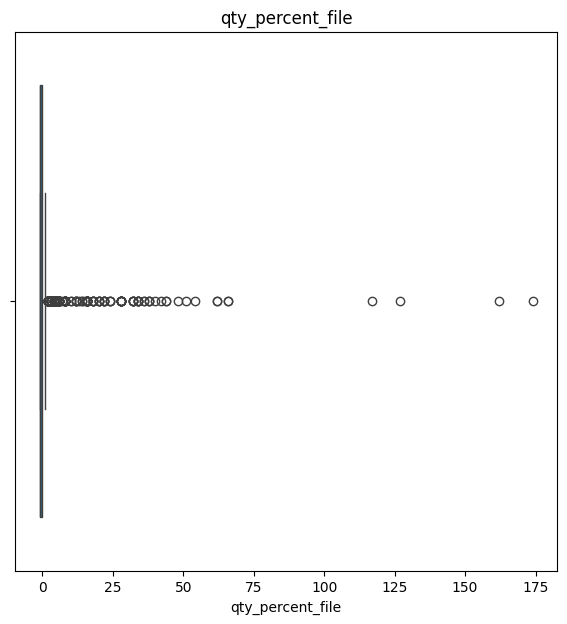

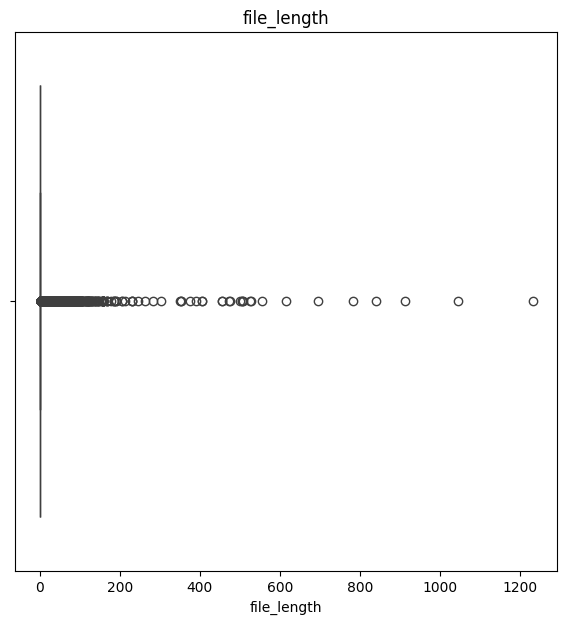

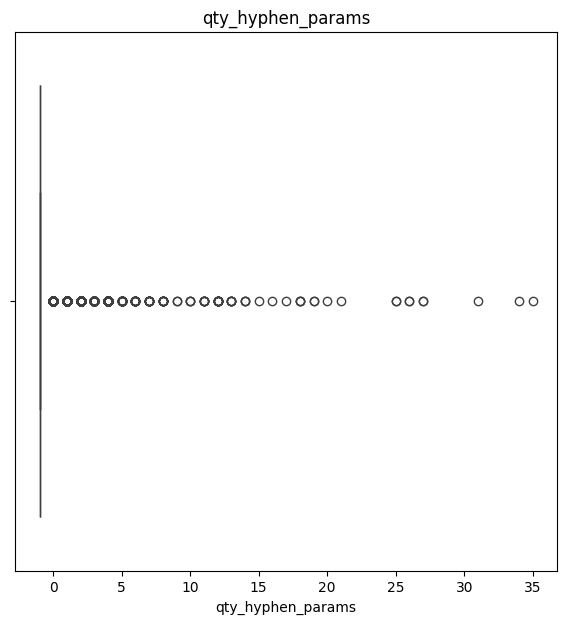

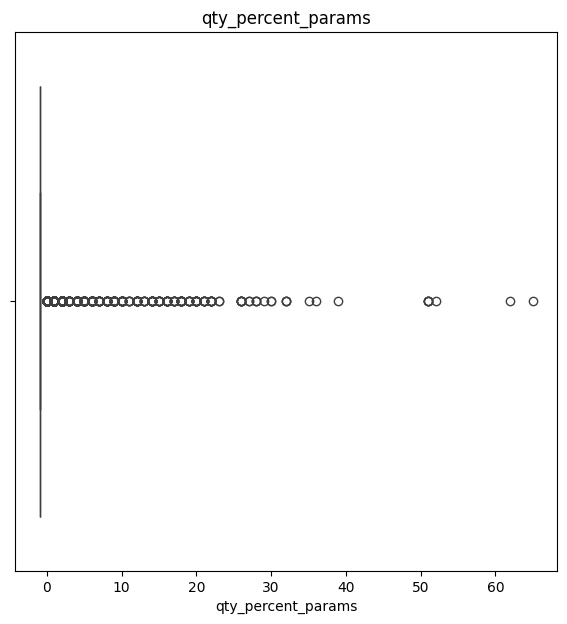

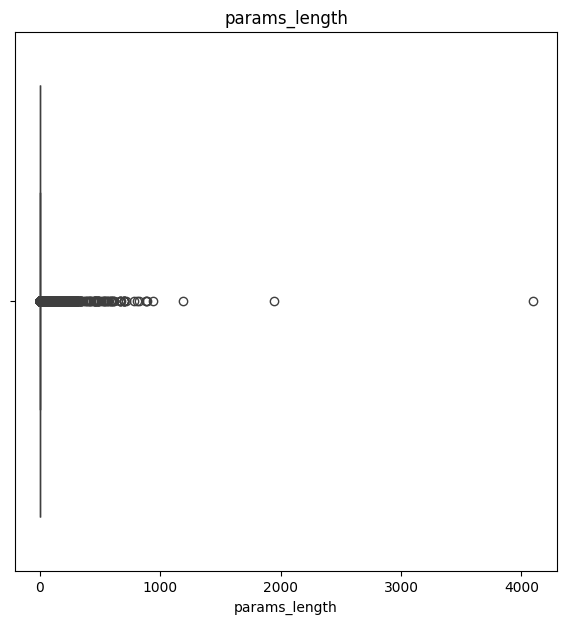

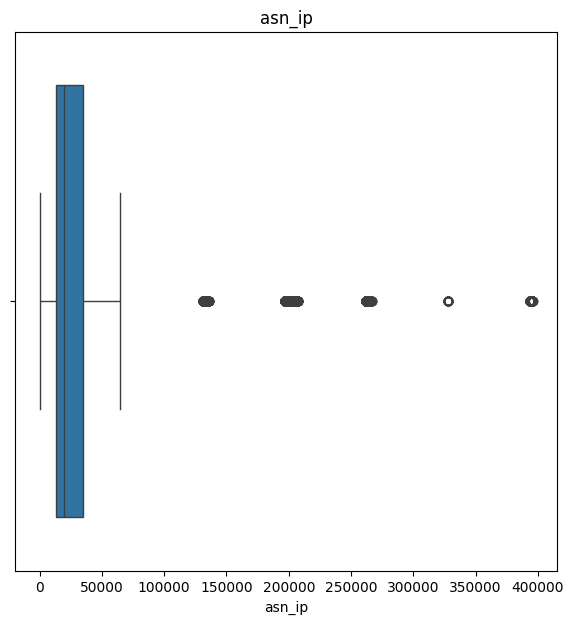

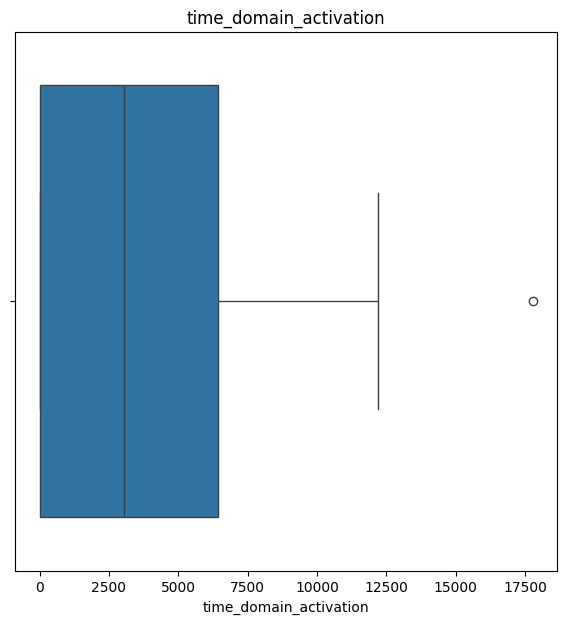

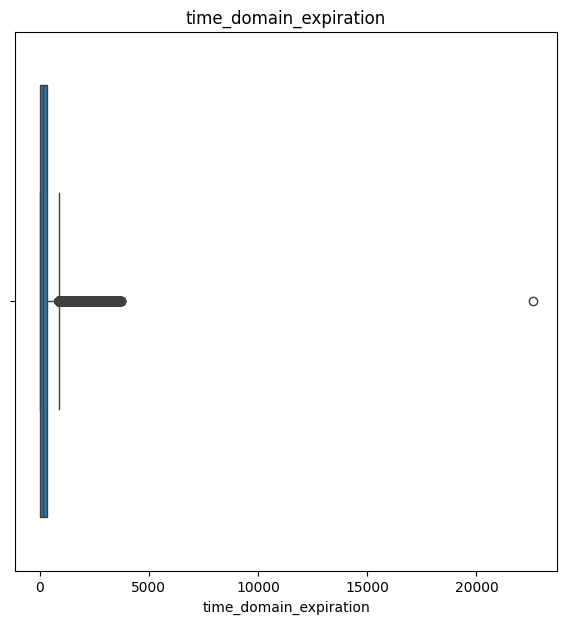

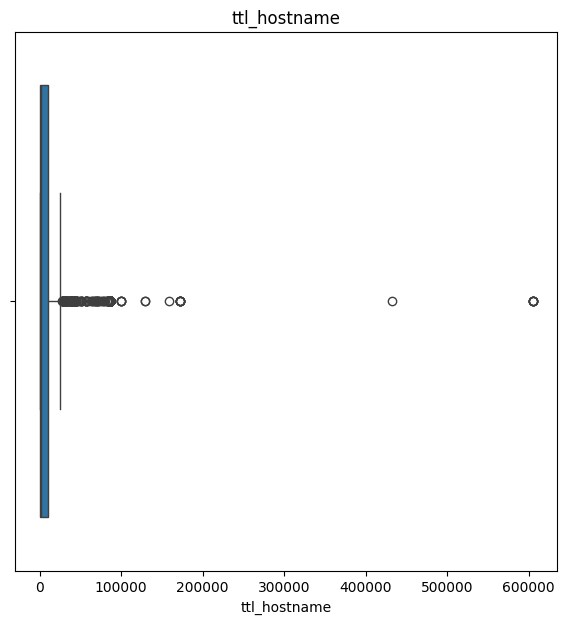

<Figure size 700x700 with 0 Axes>

In [14]:
for feature in continuous_features:
    data = df.copy()
    sns.boxplot(data=data, x=data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

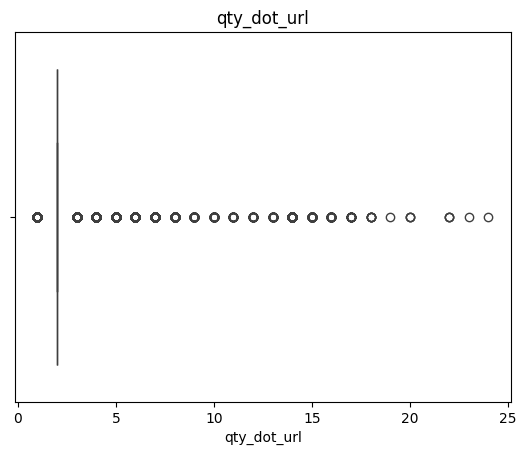

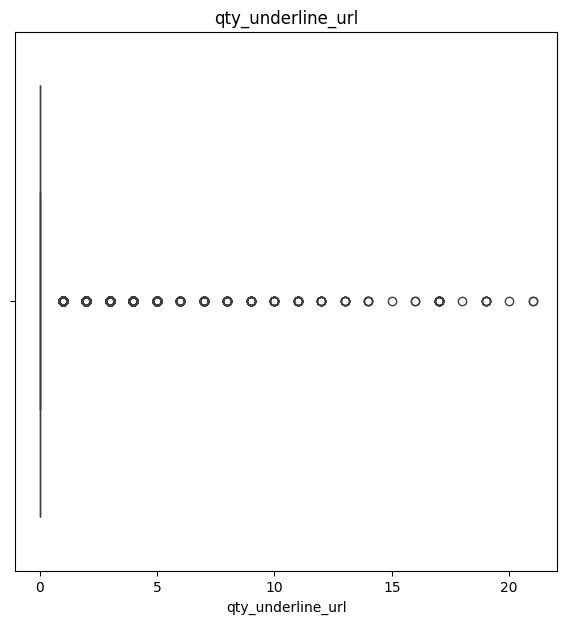

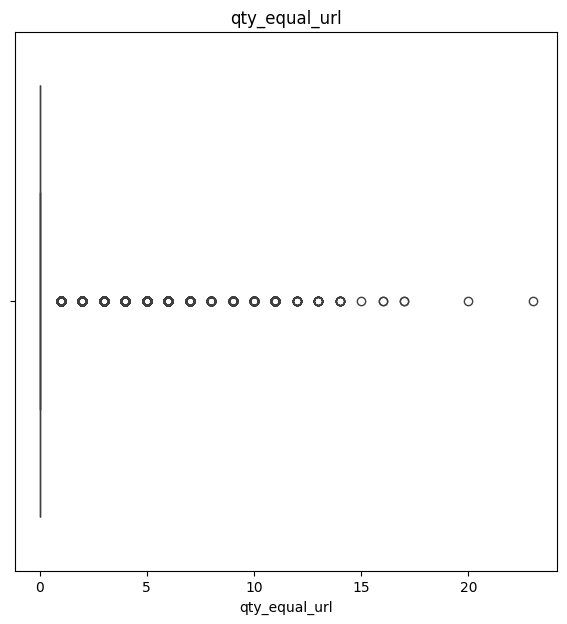

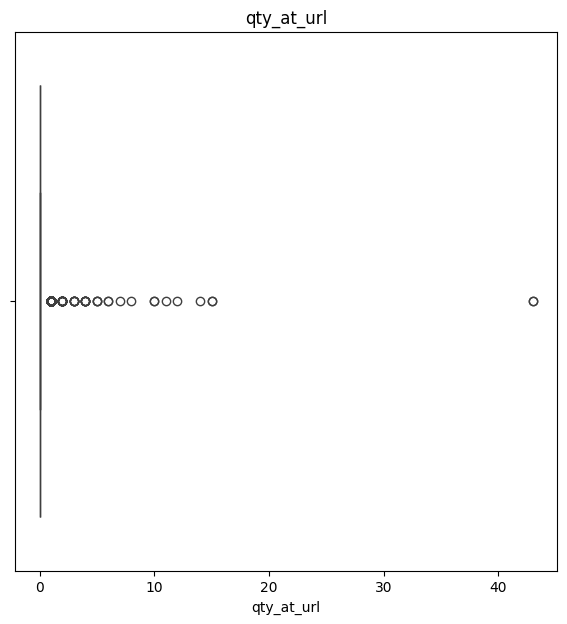

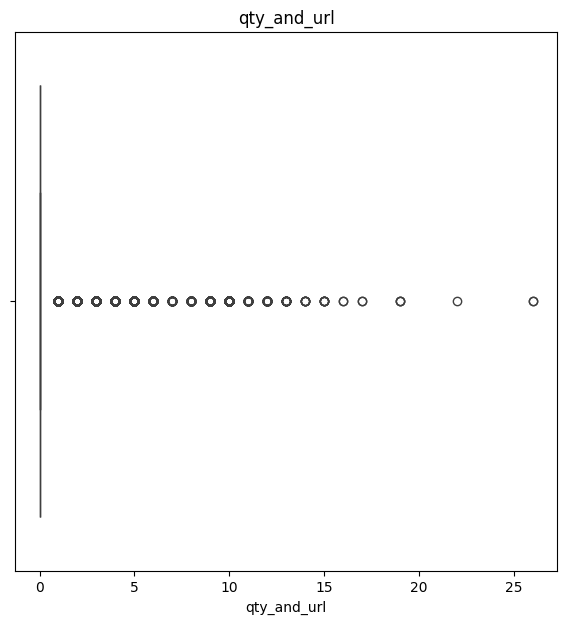

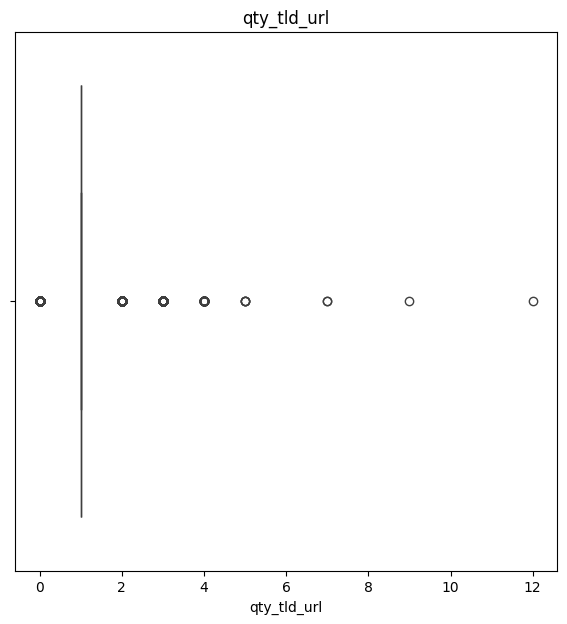

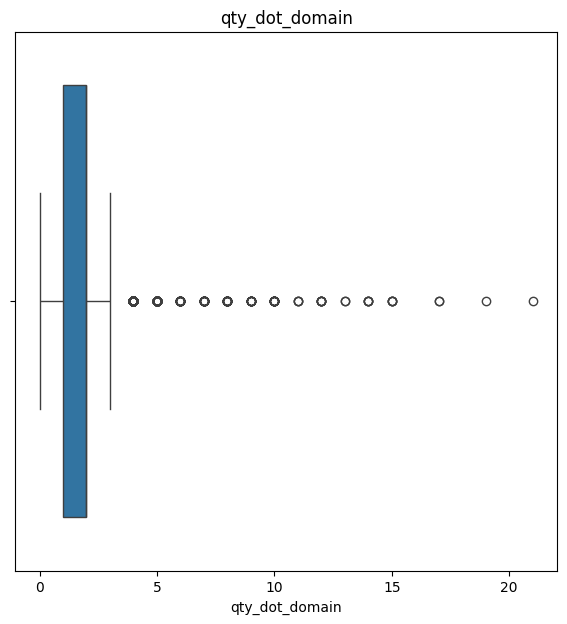

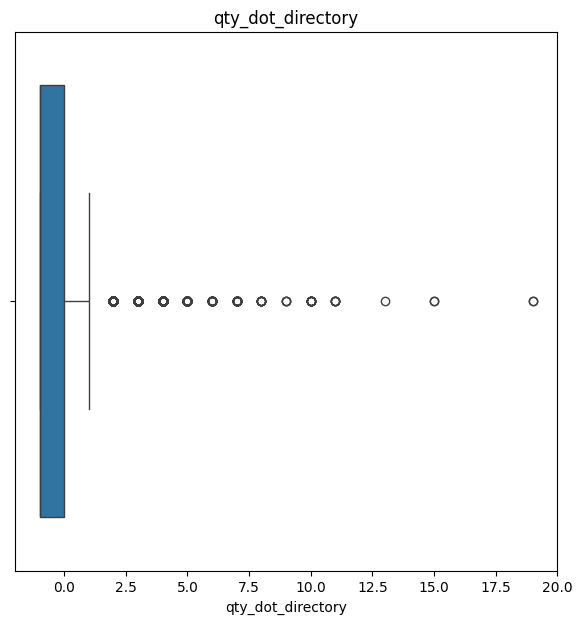

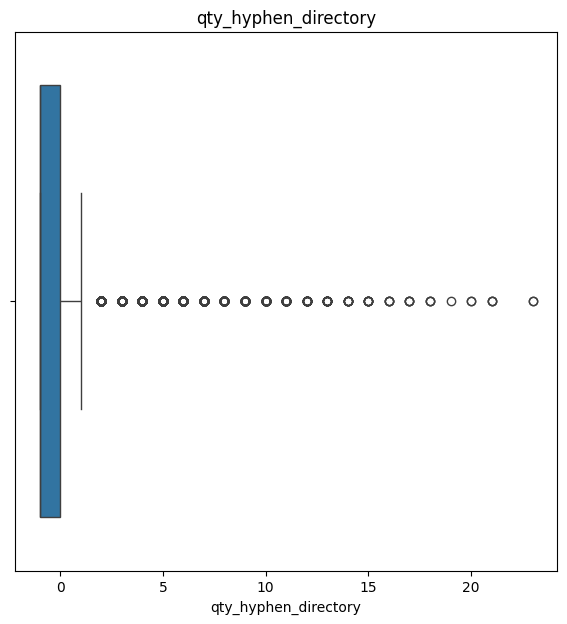

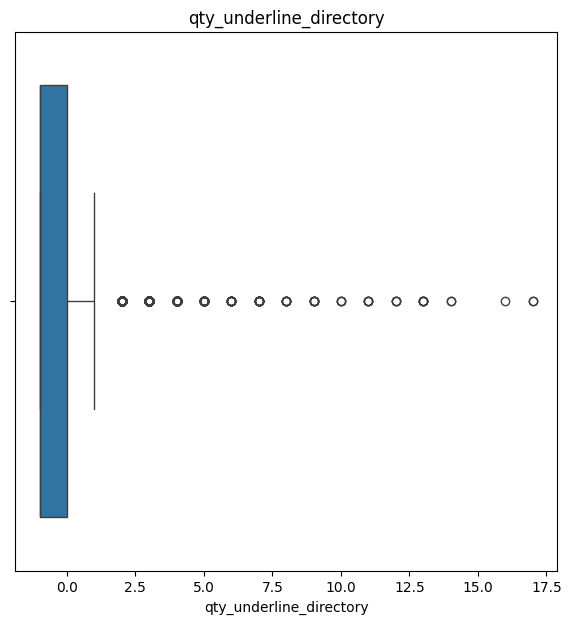

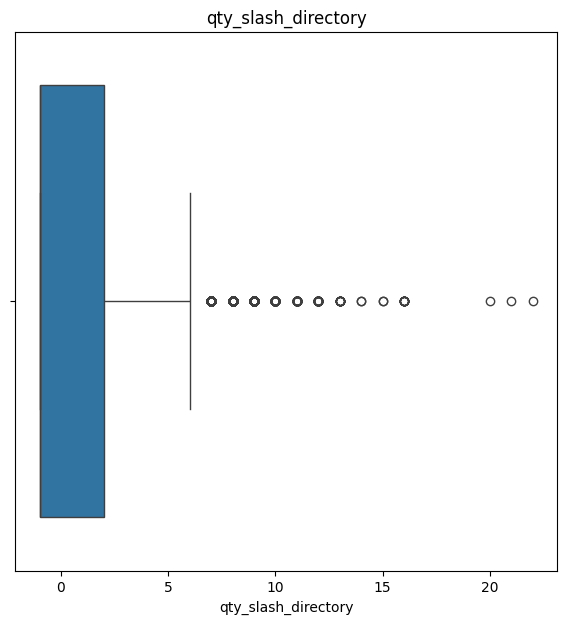

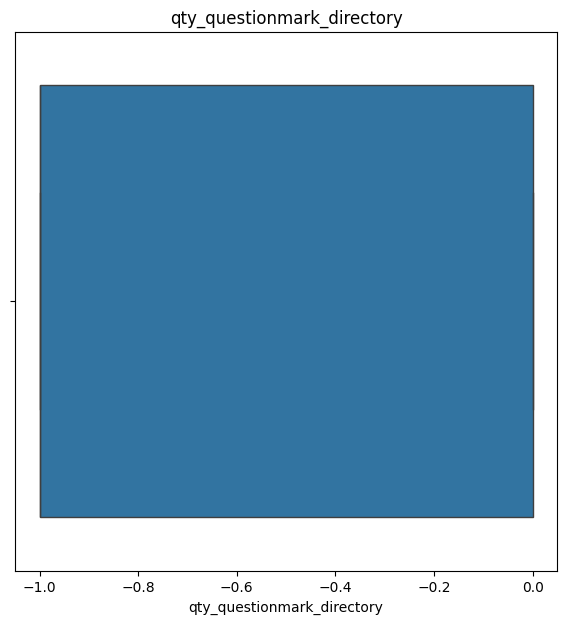

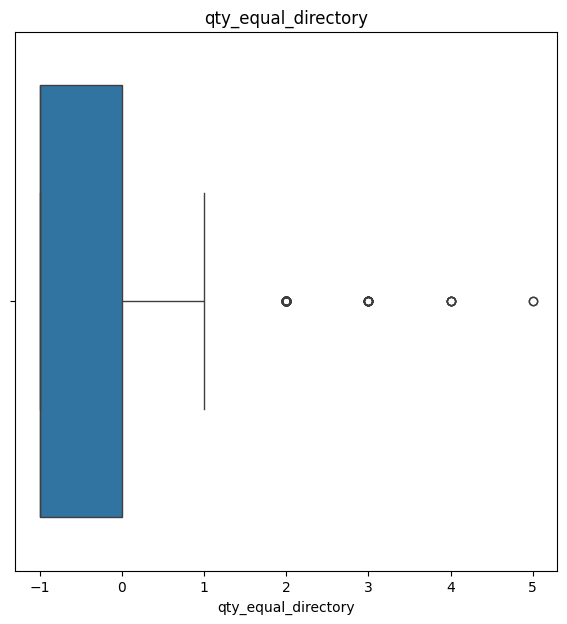

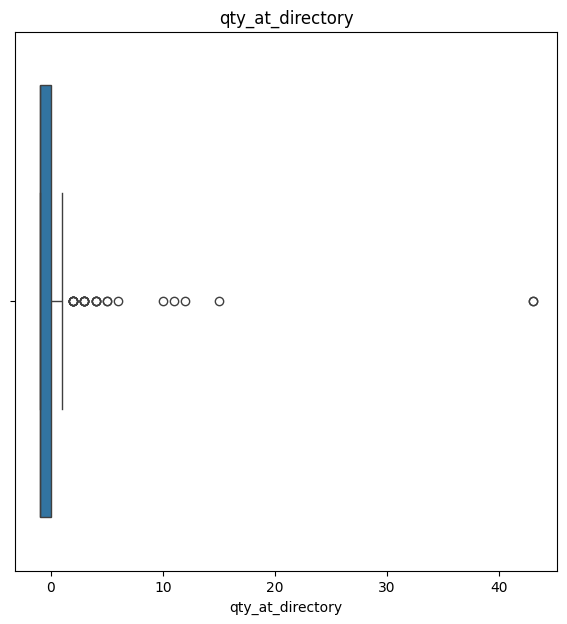

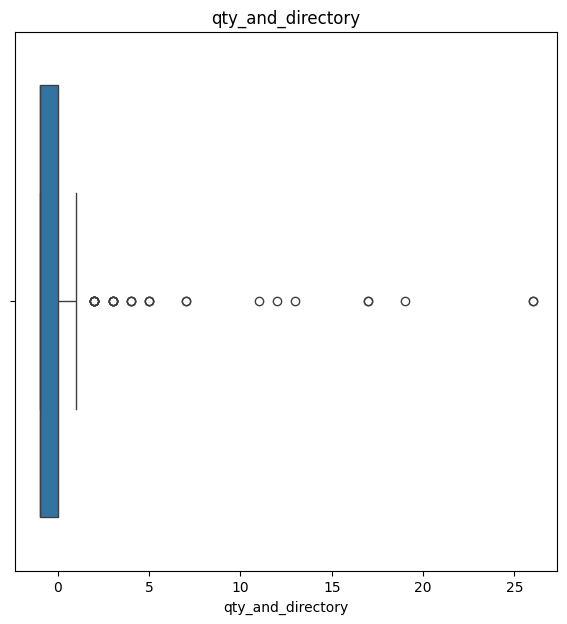

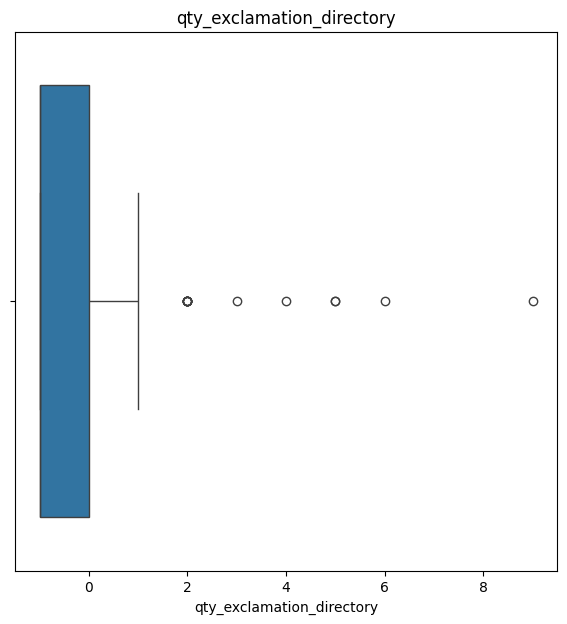

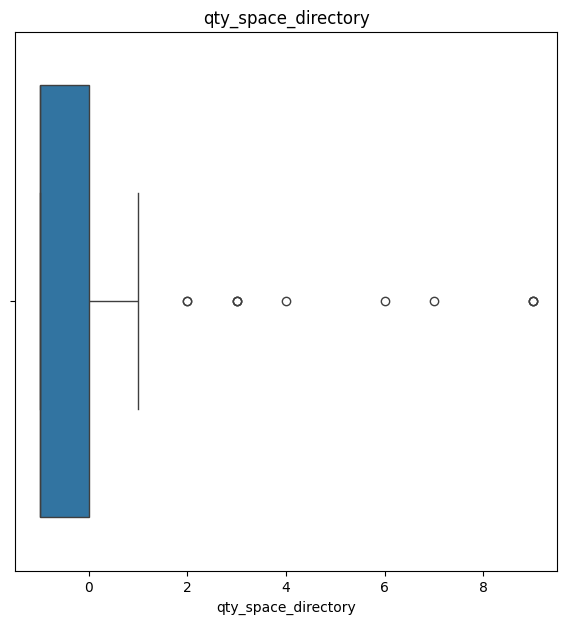

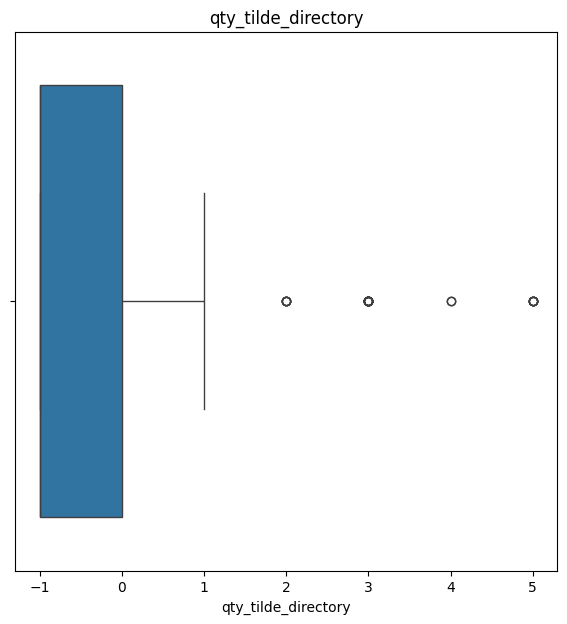

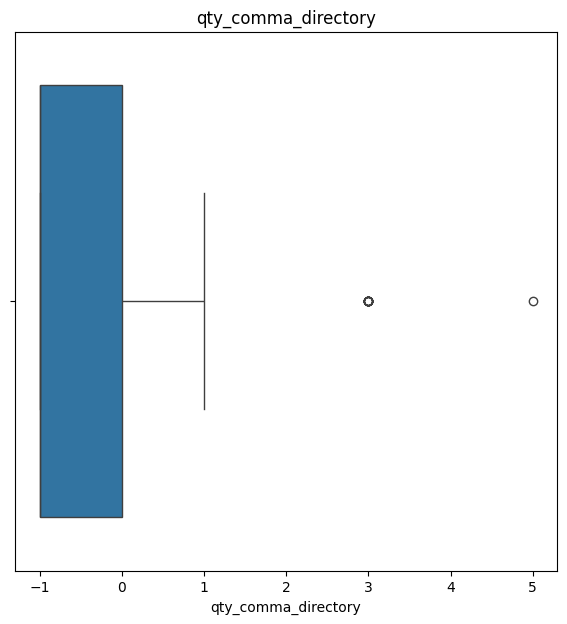

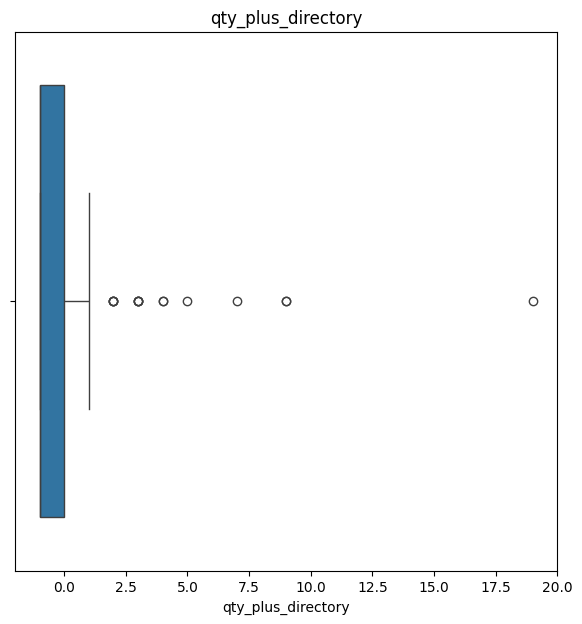

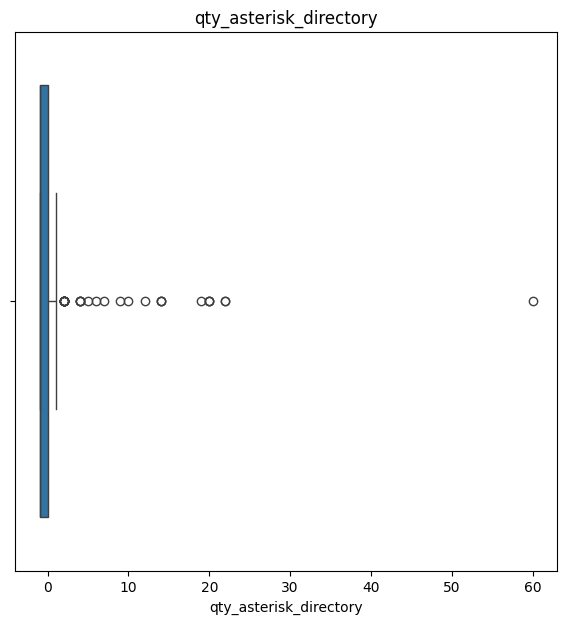

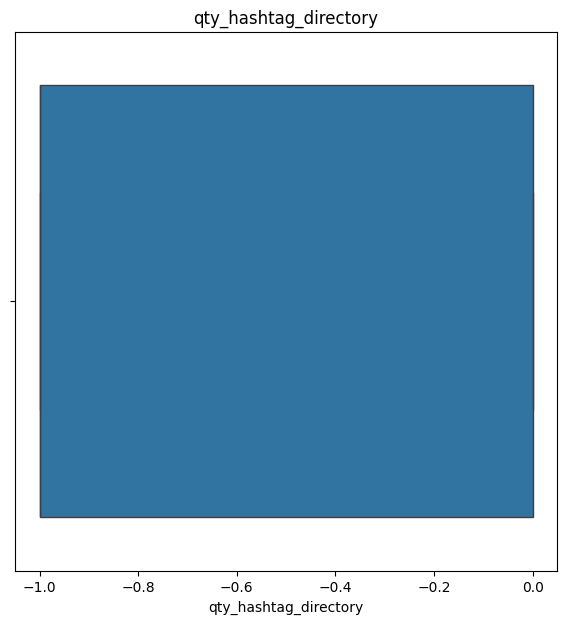

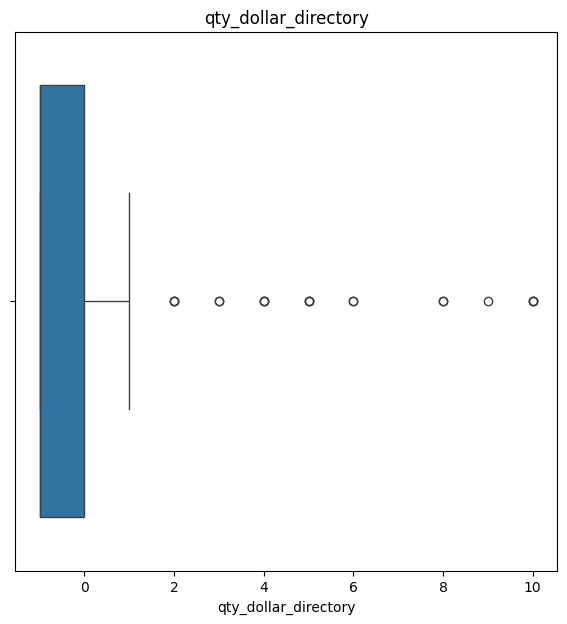

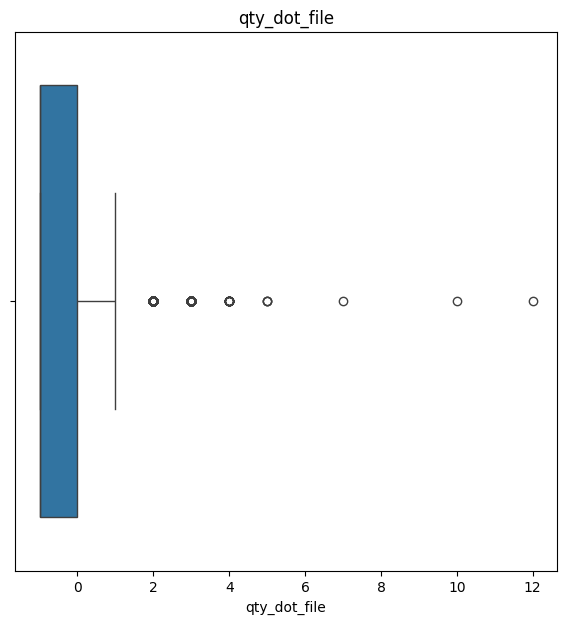

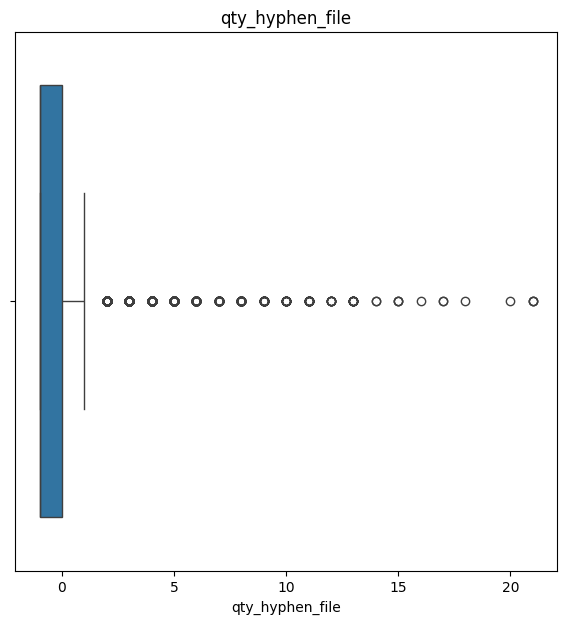

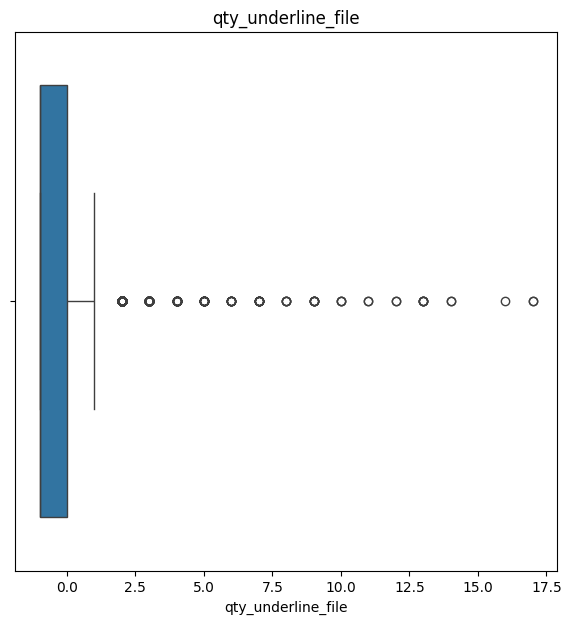

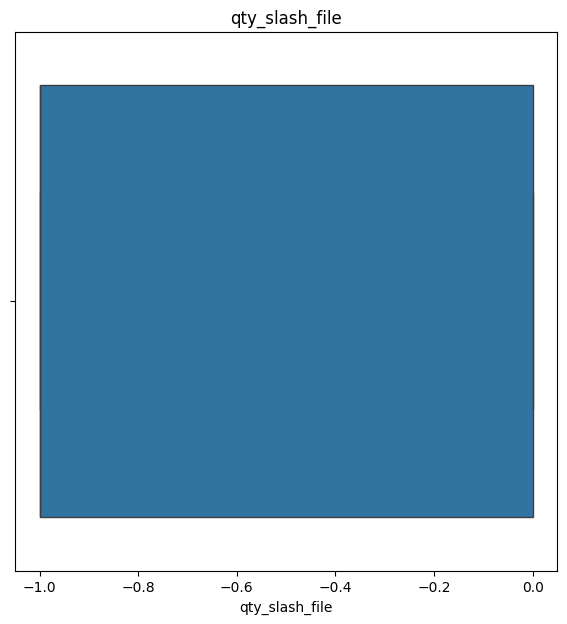

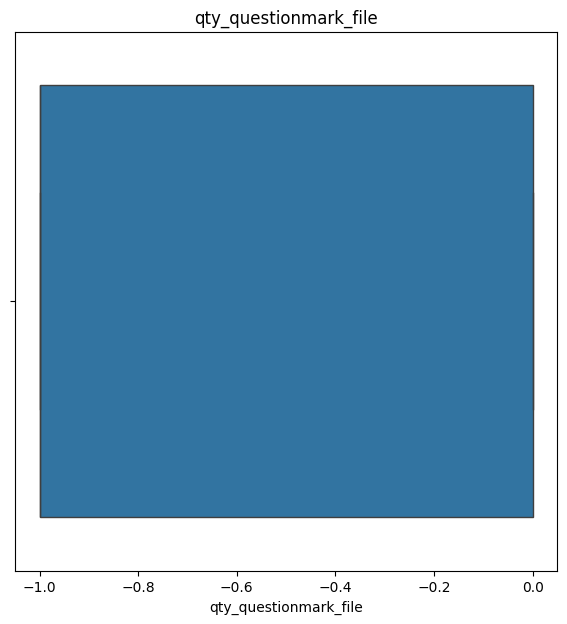

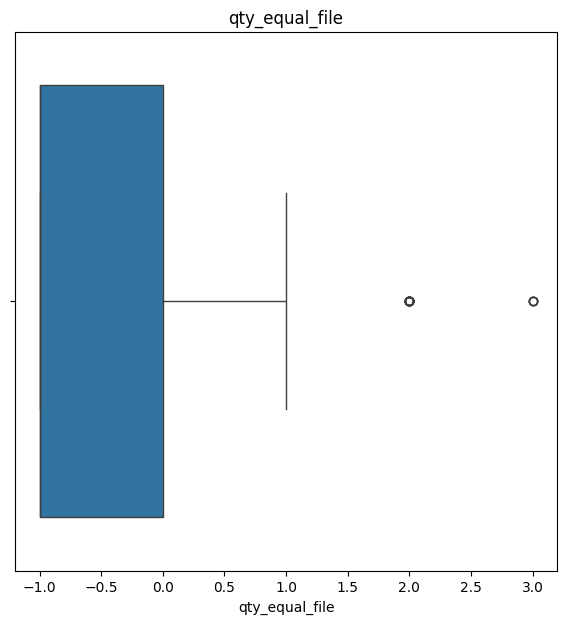

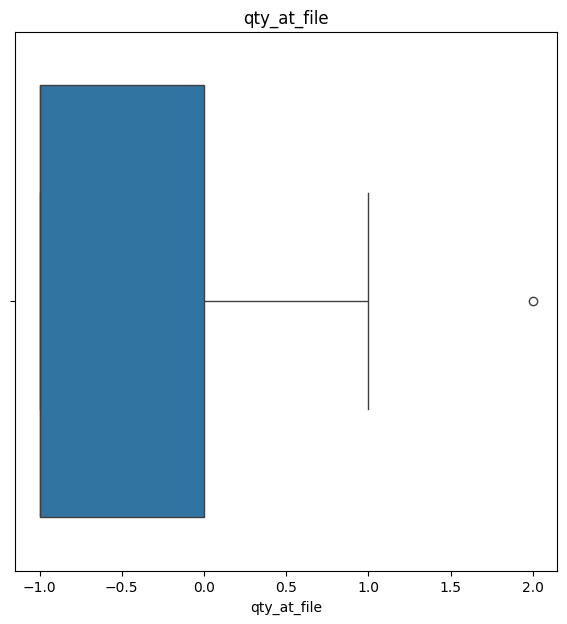

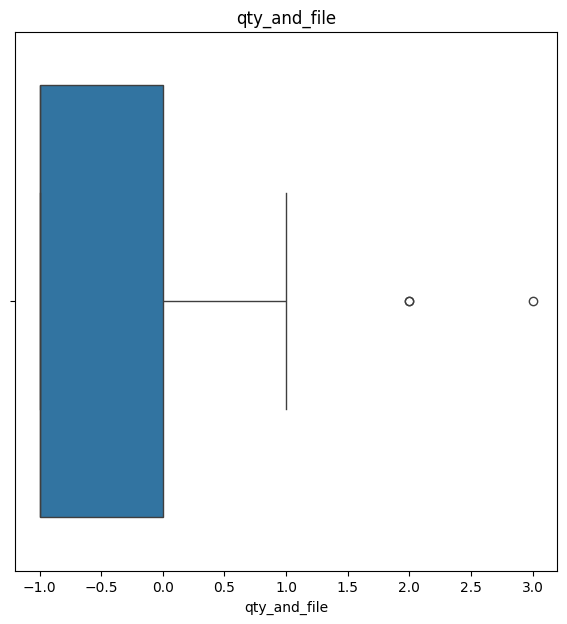

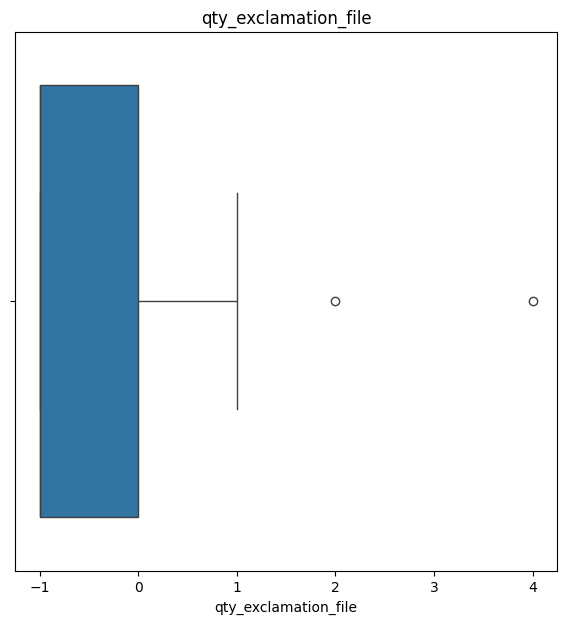

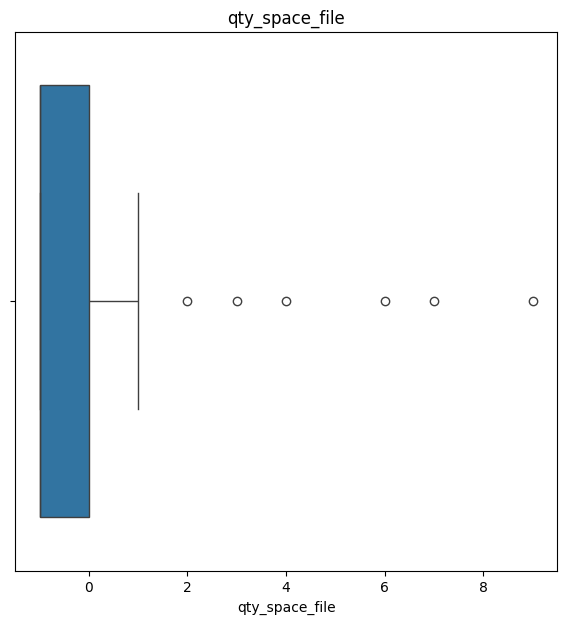

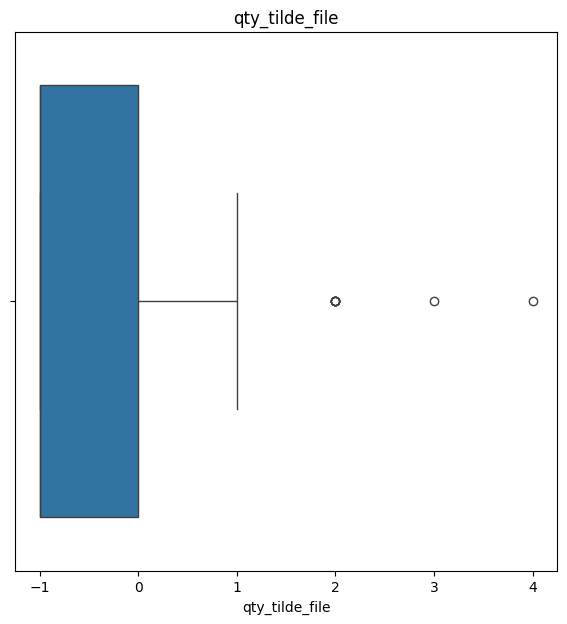

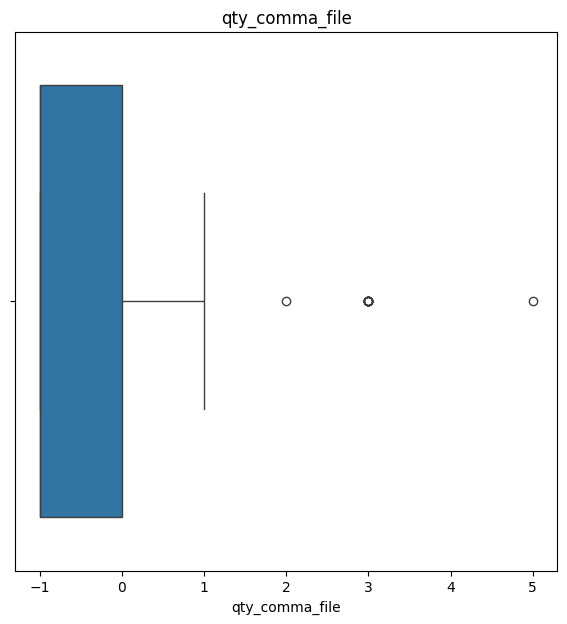

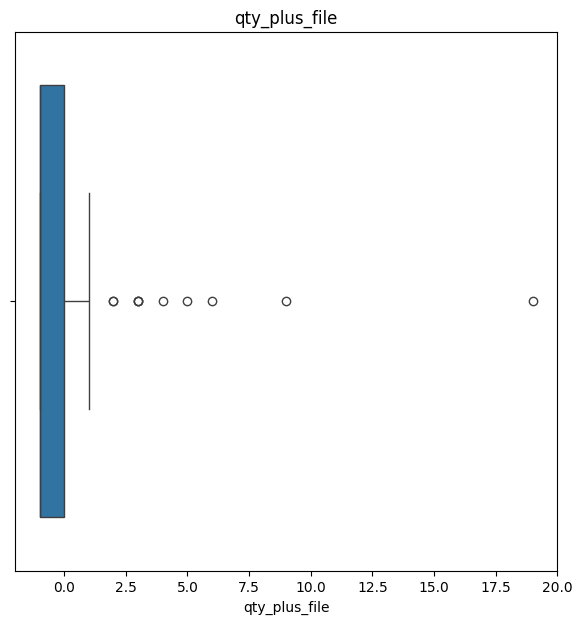

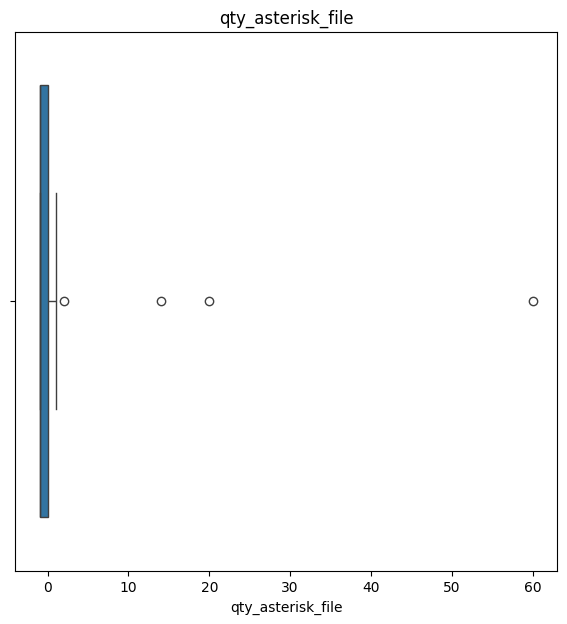

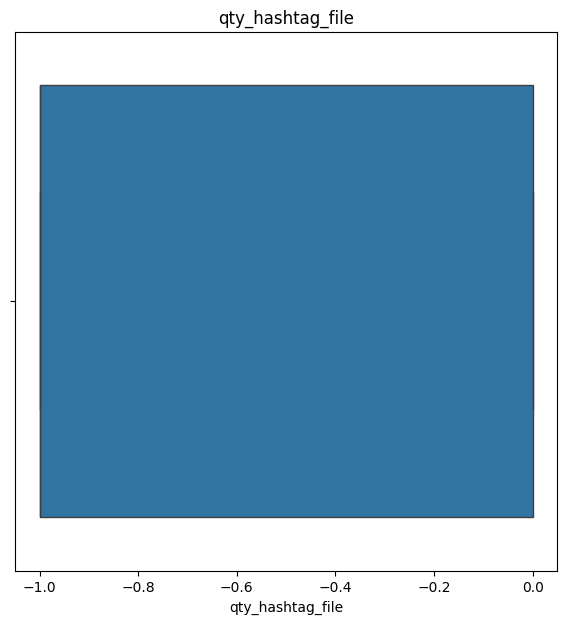

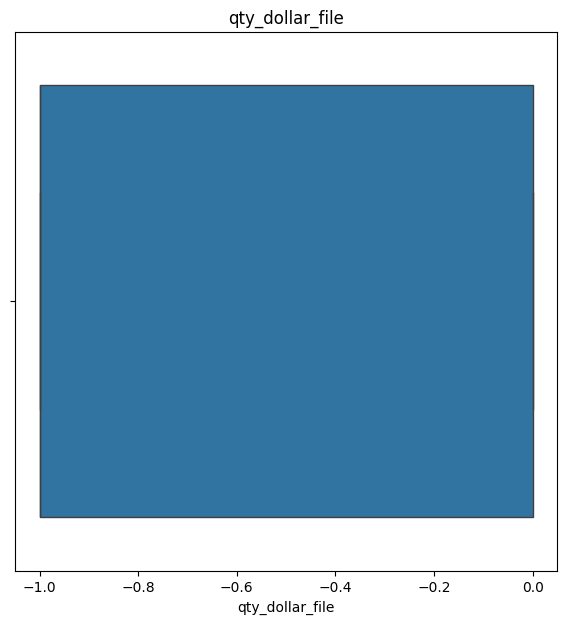

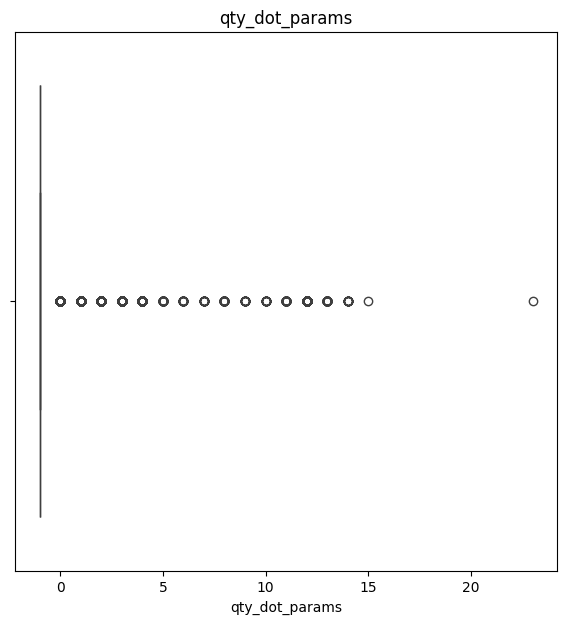

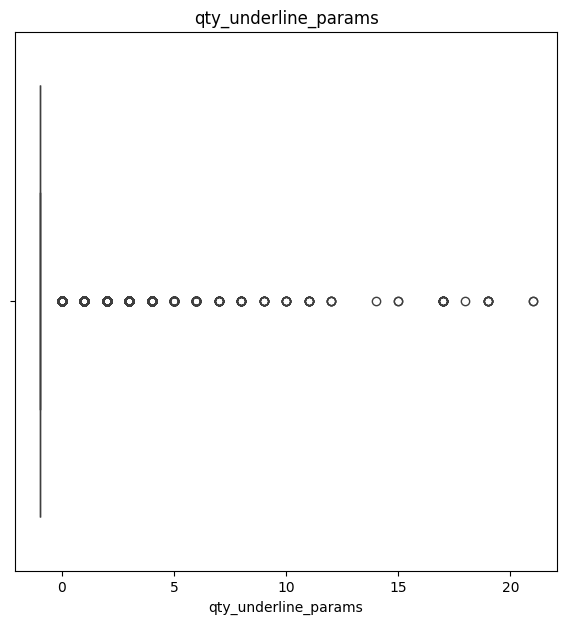

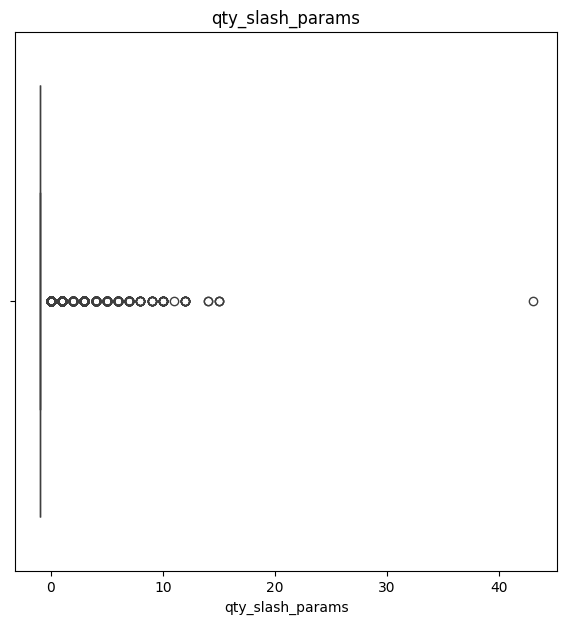

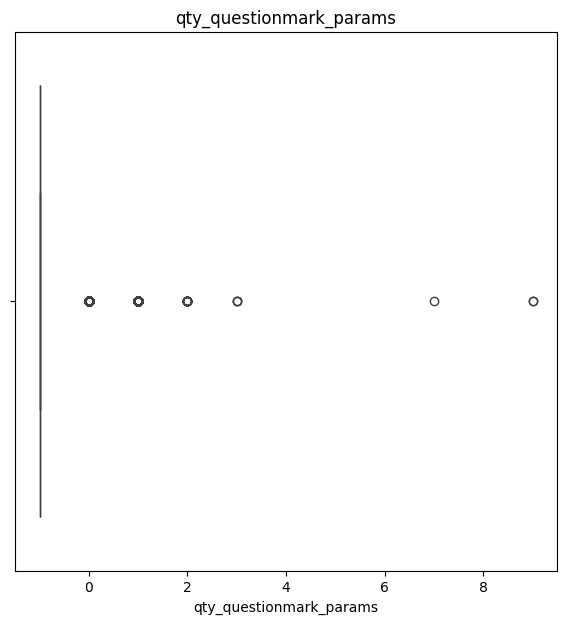

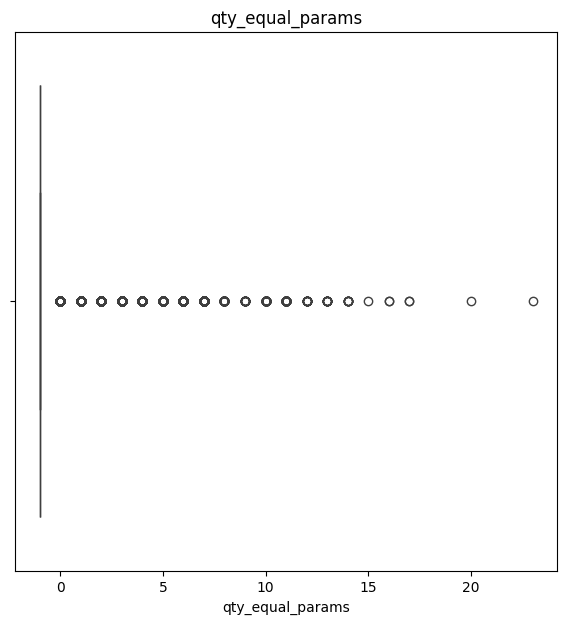

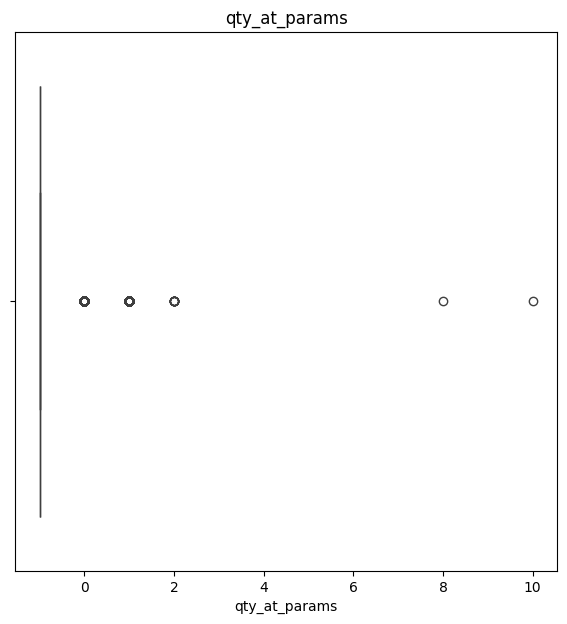

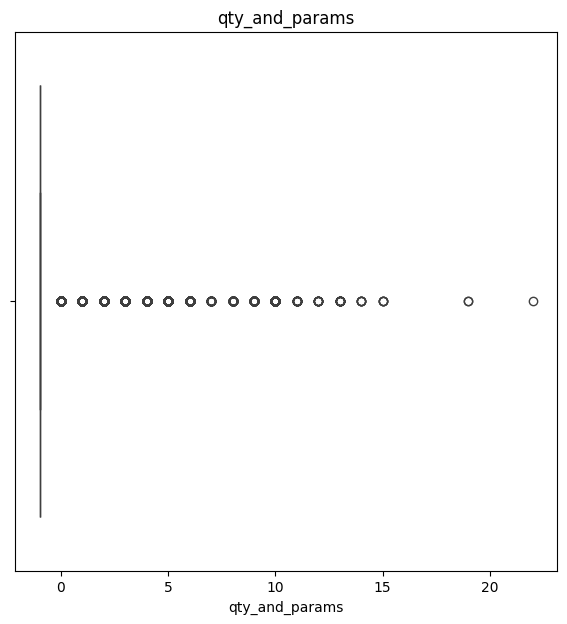

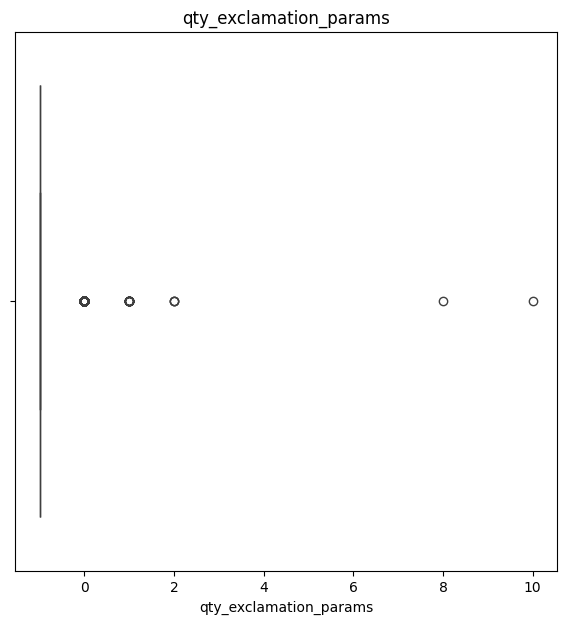

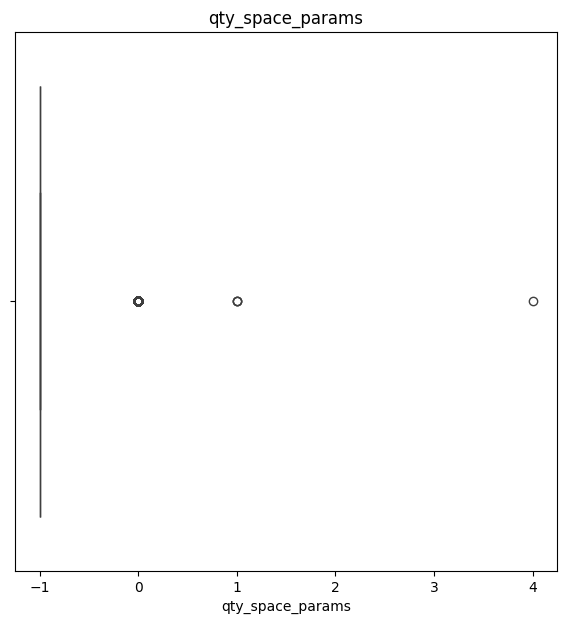

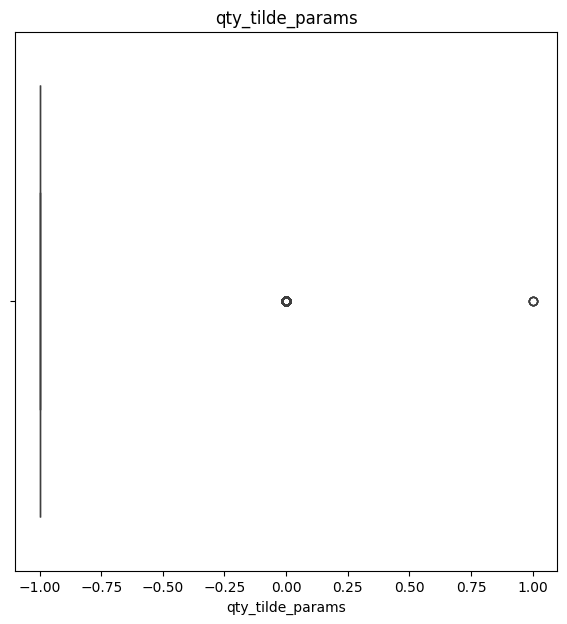

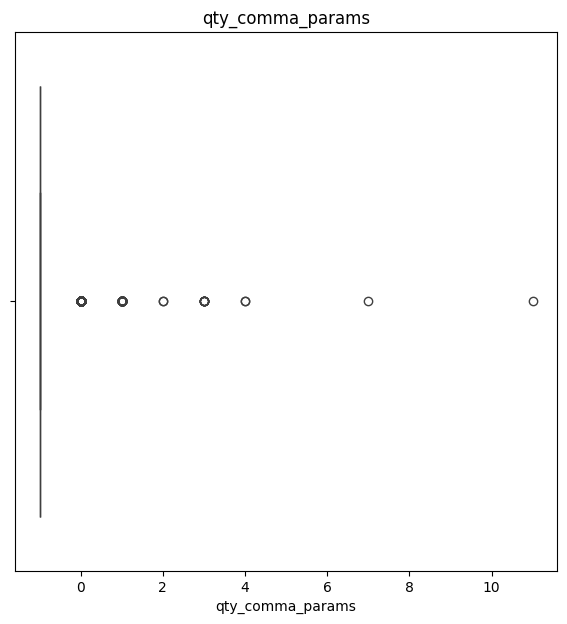

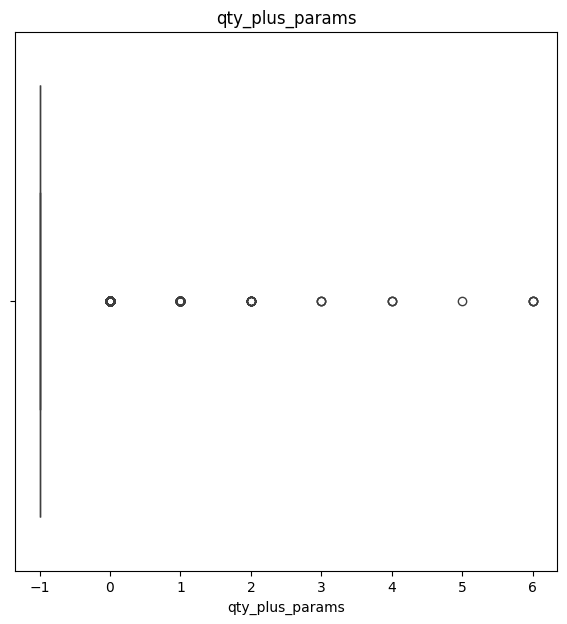

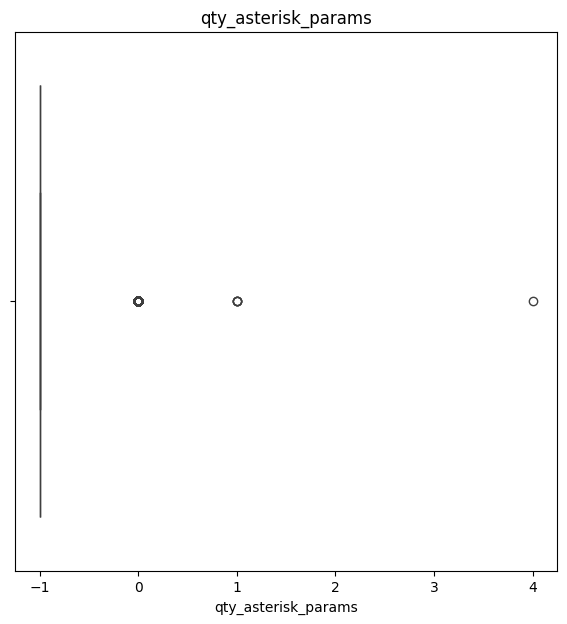

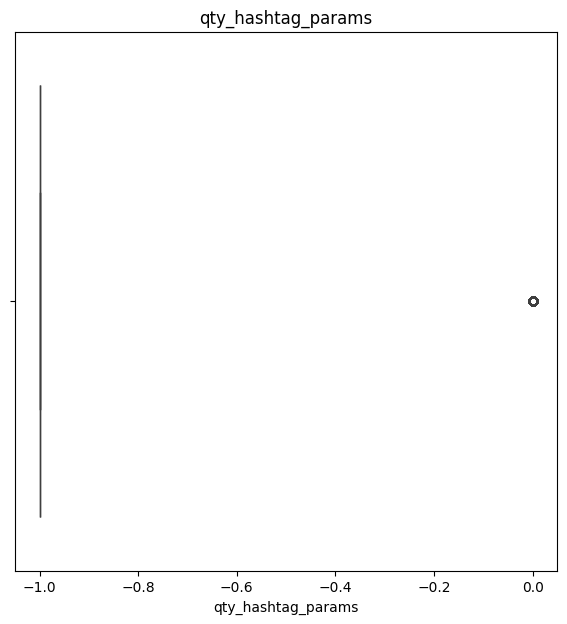

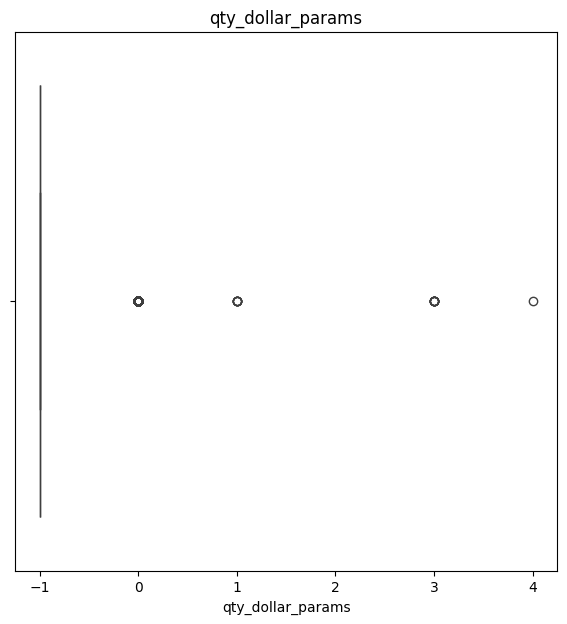

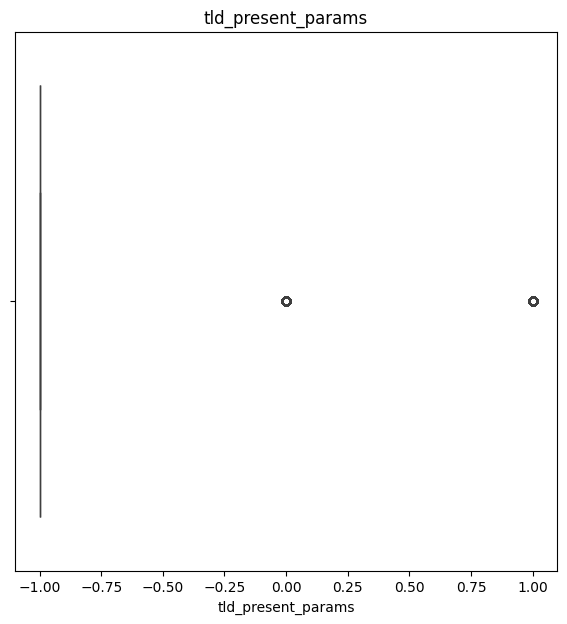

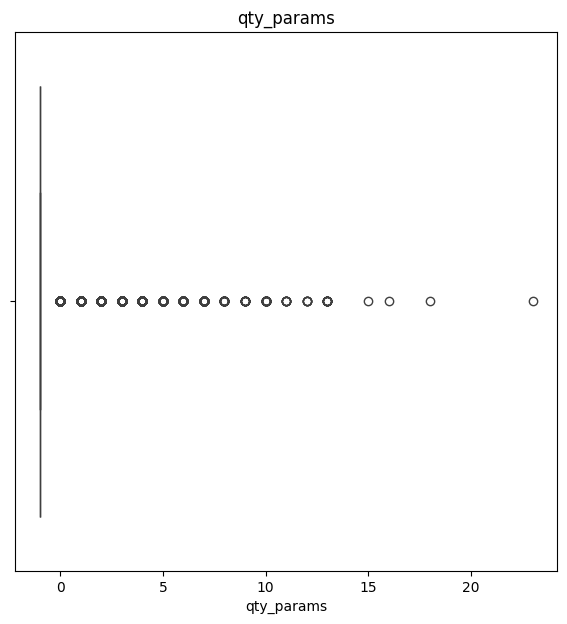

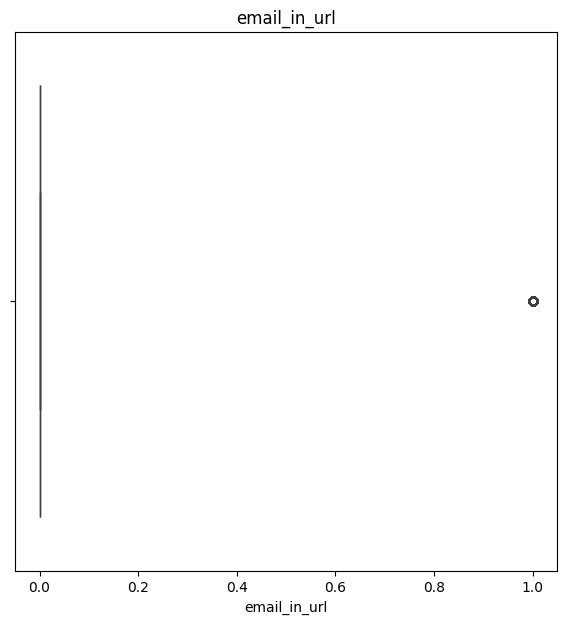

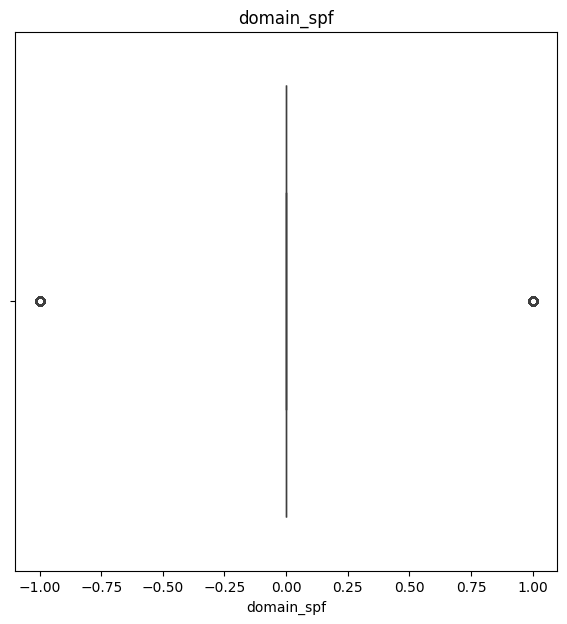

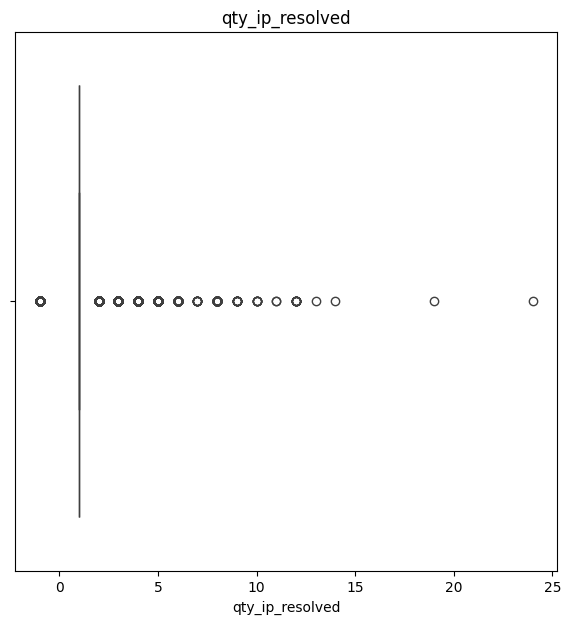

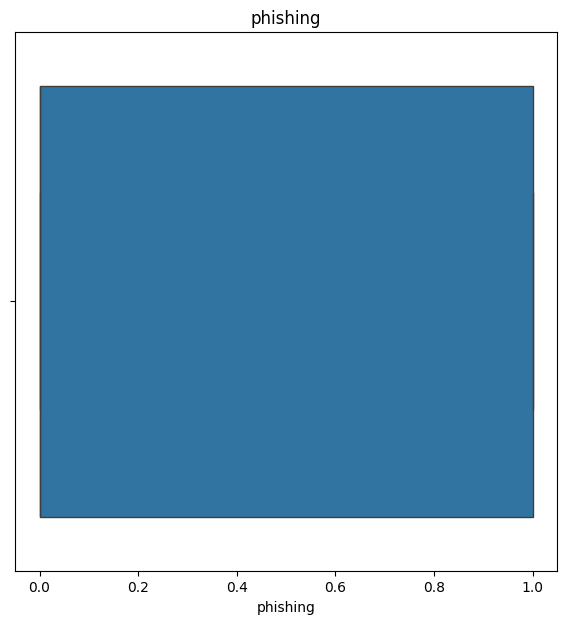

<Figure size 700x700 with 0 Axes>

In [15]:
for feature in discrete_features:
    data = df.copy()
    sns.boxplot(data=data, x=data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

# Insights

Outliers are present for discrete as well as continuous features

# Checking the distribution of Continuous Features

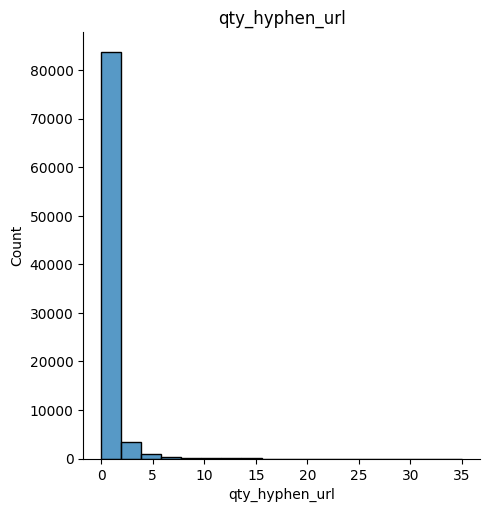

<Figure size 700x700 with 0 Axes>

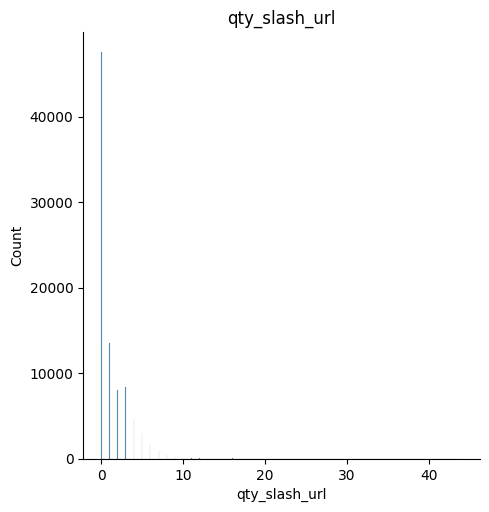

<Figure size 700x700 with 0 Axes>

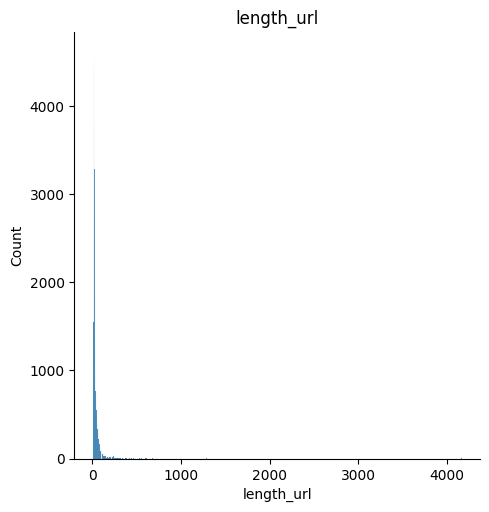

<Figure size 700x700 with 0 Axes>

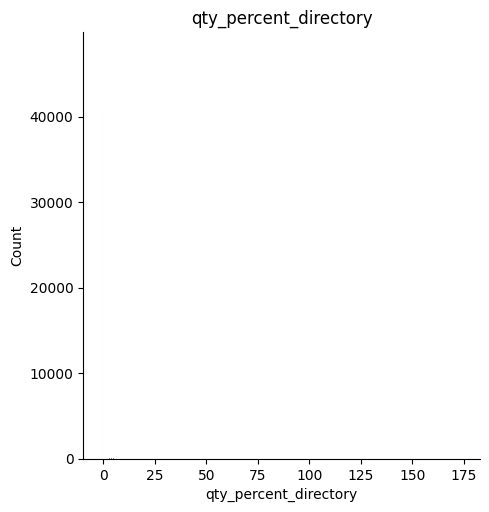

<Figure size 700x700 with 0 Axes>

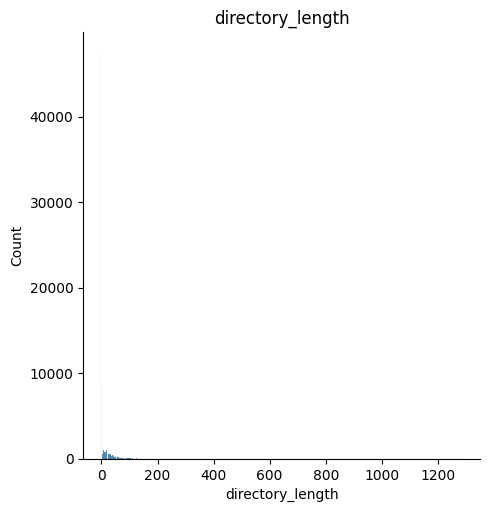

<Figure size 700x700 with 0 Axes>

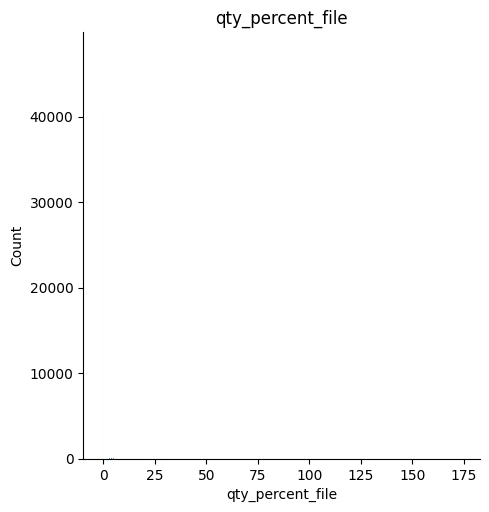

<Figure size 700x700 with 0 Axes>

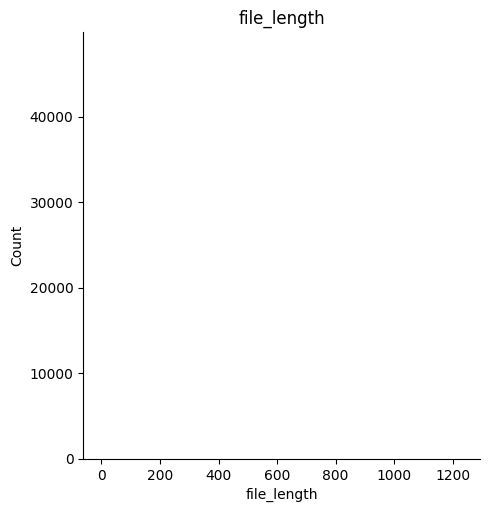

<Figure size 700x700 with 0 Axes>

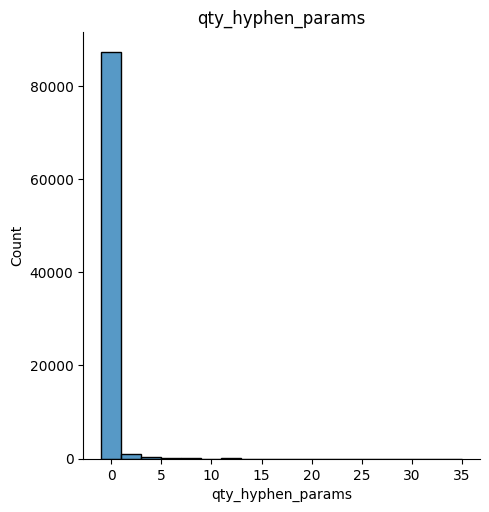

<Figure size 700x700 with 0 Axes>

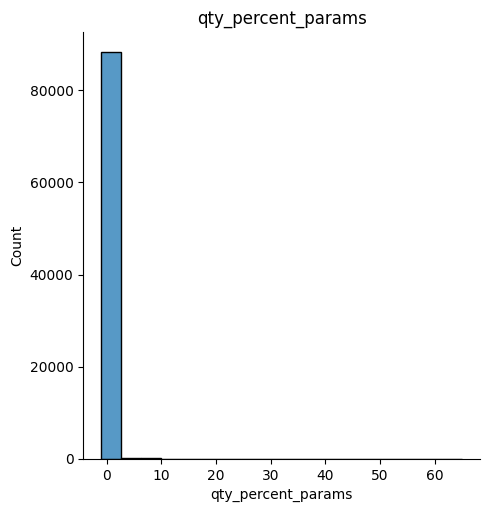

<Figure size 700x700 with 0 Axes>

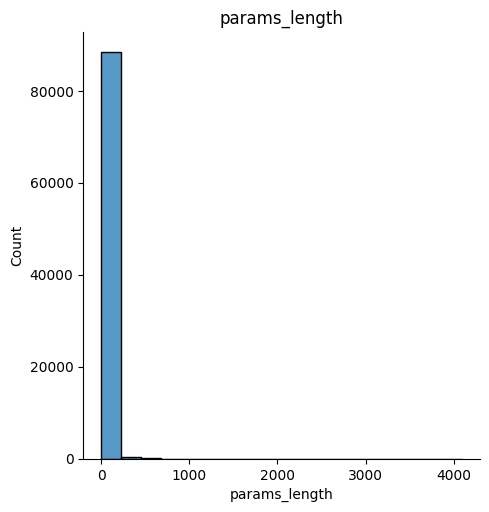

<Figure size 700x700 with 0 Axes>

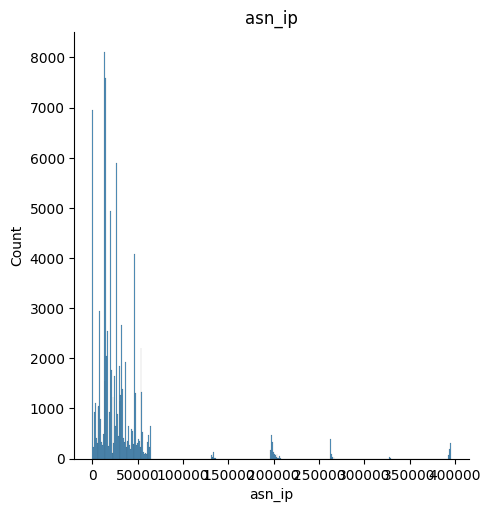

<Figure size 700x700 with 0 Axes>

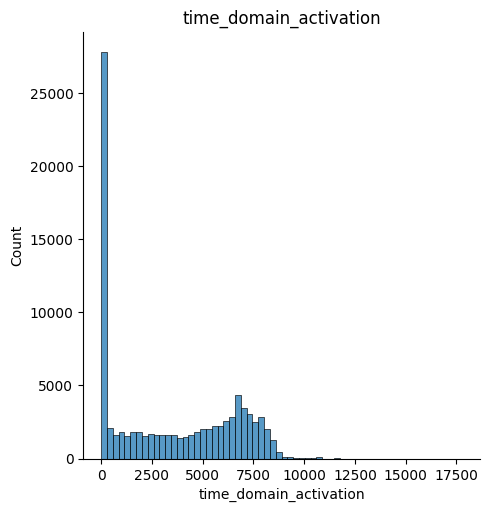

<Figure size 700x700 with 0 Axes>

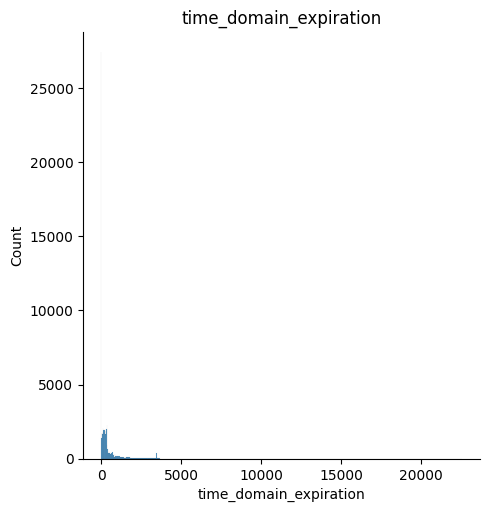

<Figure size 700x700 with 0 Axes>

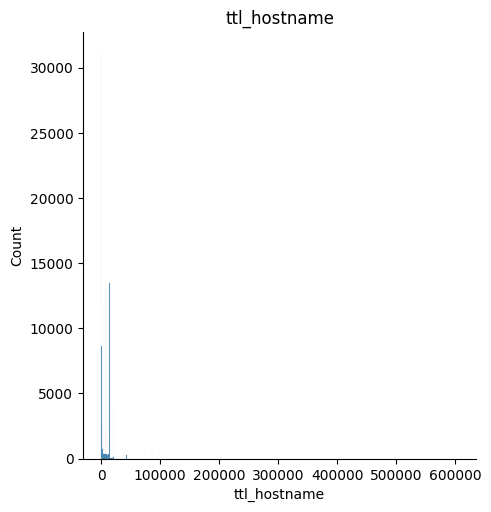

<Figure size 700x700 with 0 Axes>

In [16]:
for feature in continuous_features:
    data = df.copy()
    sns.displot(data=data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.figure(figsize=(7,7))
    plt.show()

# Checking the distribution of discrete features

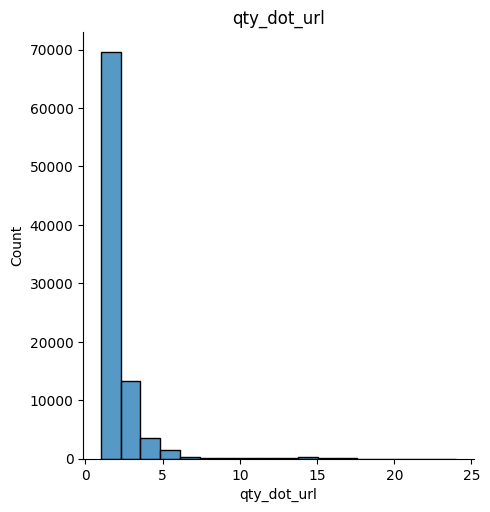

<Figure size 700x700 with 0 Axes>

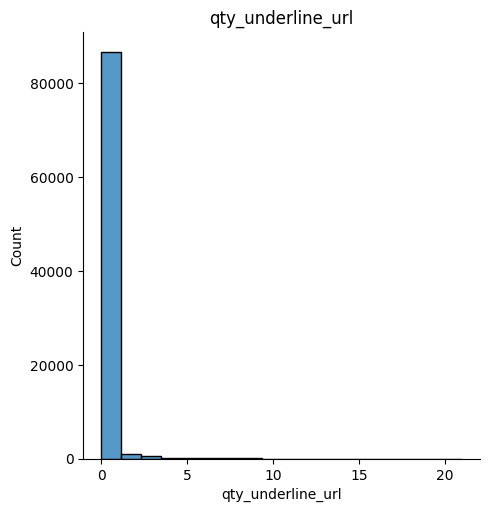

<Figure size 700x700 with 0 Axes>

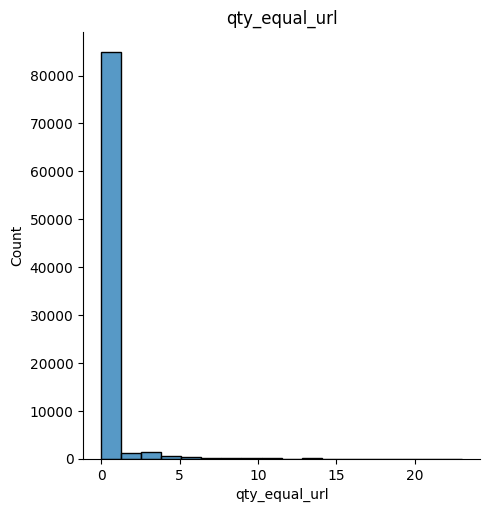

<Figure size 700x700 with 0 Axes>

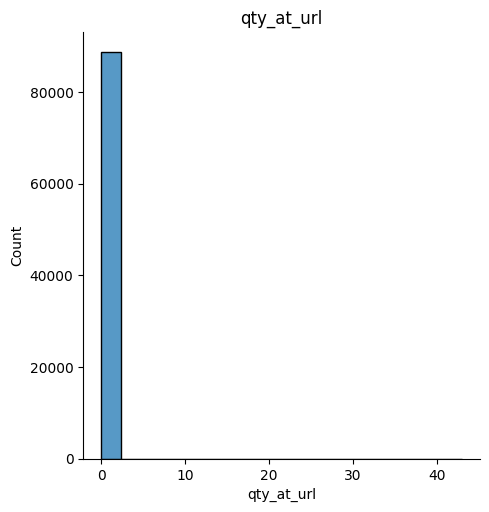

<Figure size 700x700 with 0 Axes>

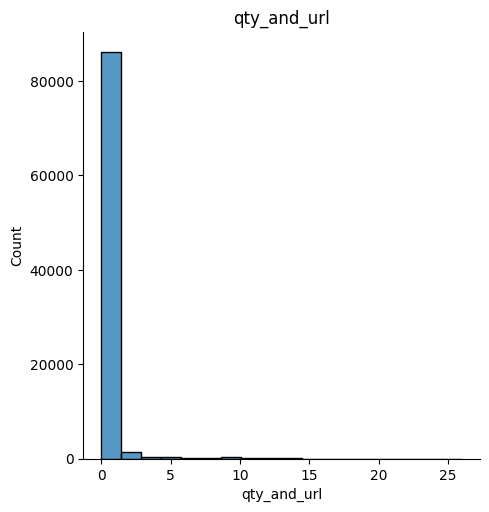

<Figure size 700x700 with 0 Axes>

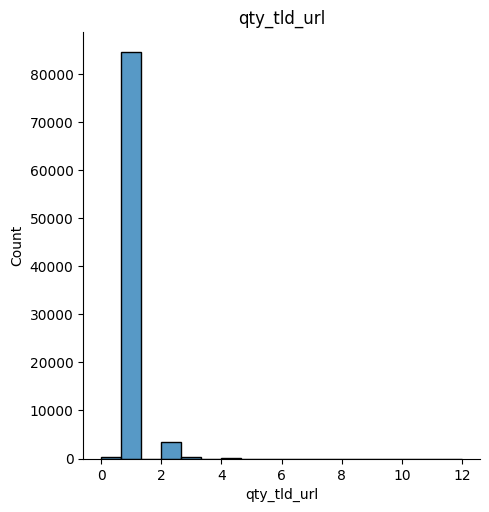

<Figure size 700x700 with 0 Axes>

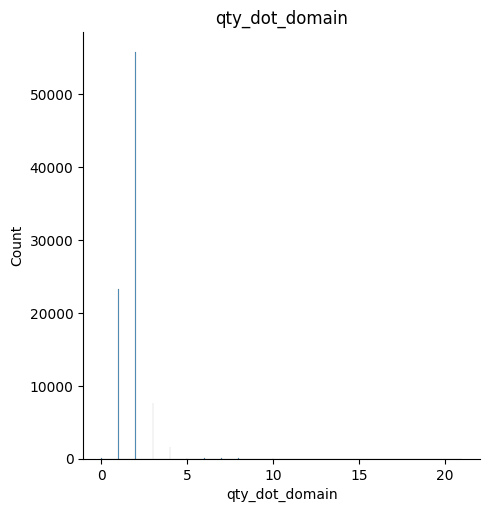

<Figure size 700x700 with 0 Axes>

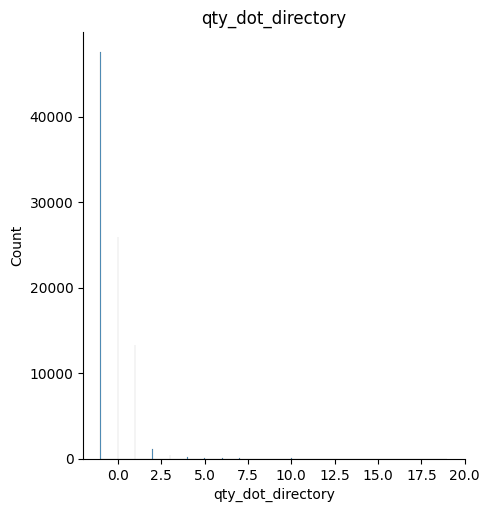

<Figure size 700x700 with 0 Axes>

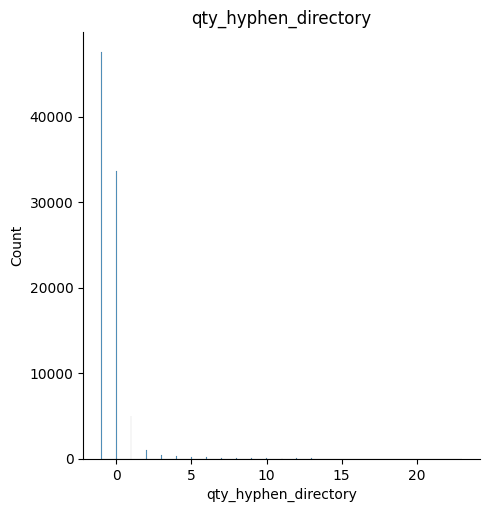

<Figure size 700x700 with 0 Axes>

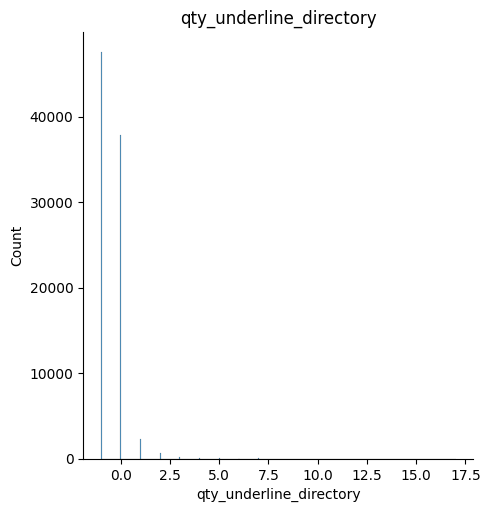

<Figure size 700x700 with 0 Axes>

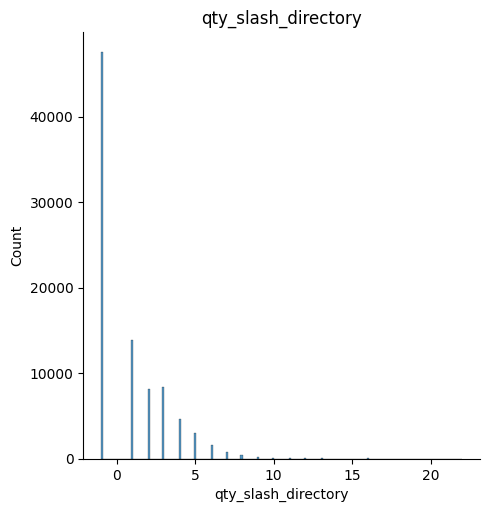

<Figure size 700x700 with 0 Axes>

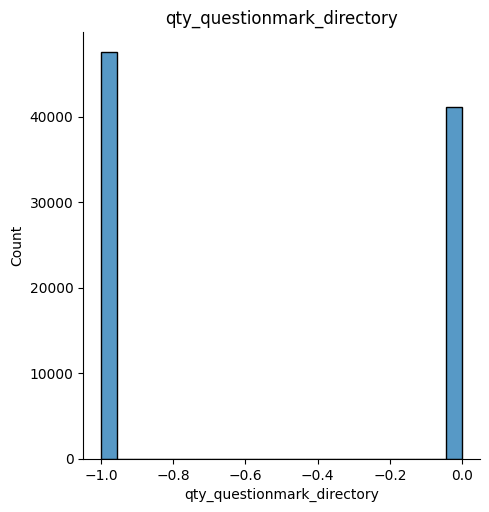

<Figure size 700x700 with 0 Axes>

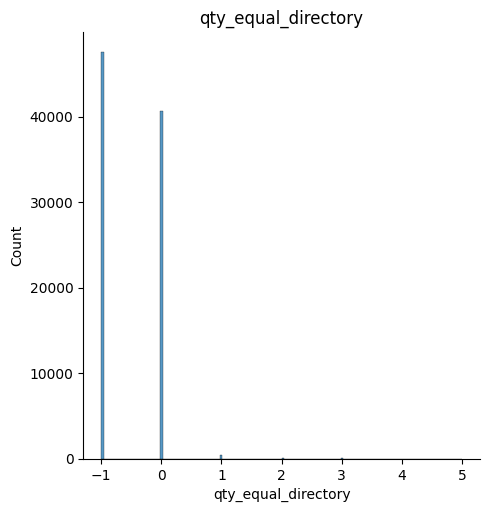

<Figure size 700x700 with 0 Axes>

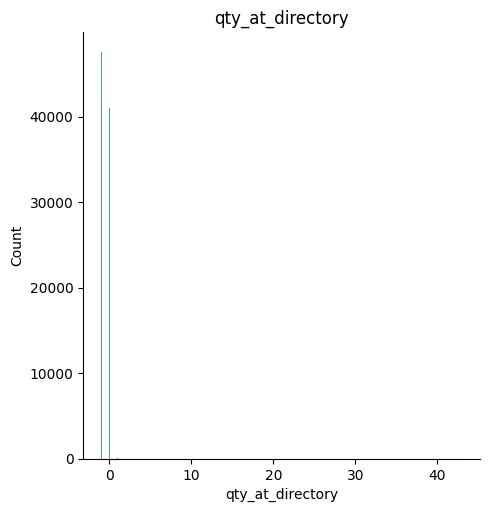

<Figure size 700x700 with 0 Axes>

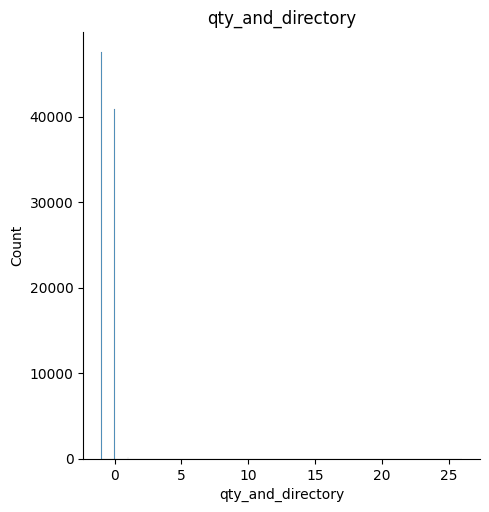

<Figure size 700x700 with 0 Axes>

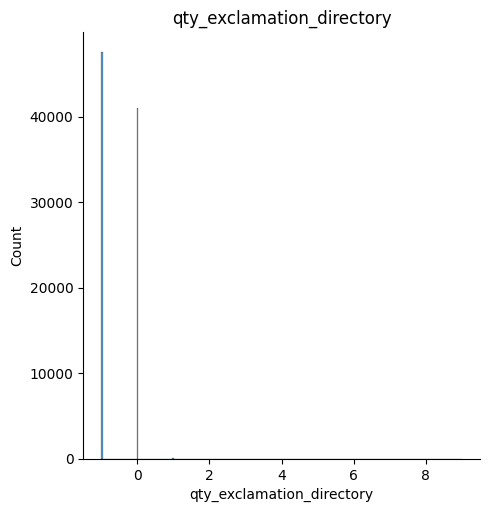

<Figure size 700x700 with 0 Axes>

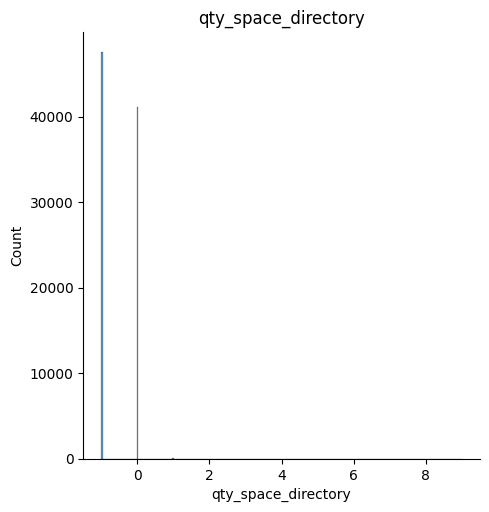

<Figure size 700x700 with 0 Axes>

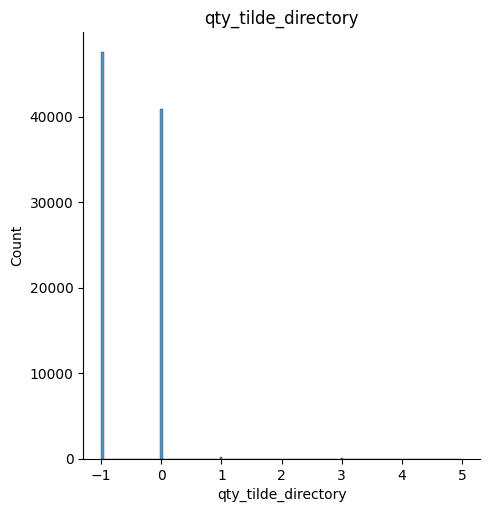

<Figure size 700x700 with 0 Axes>

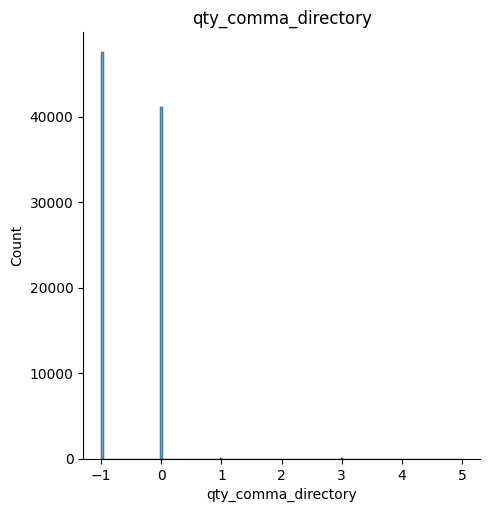

<Figure size 700x700 with 0 Axes>

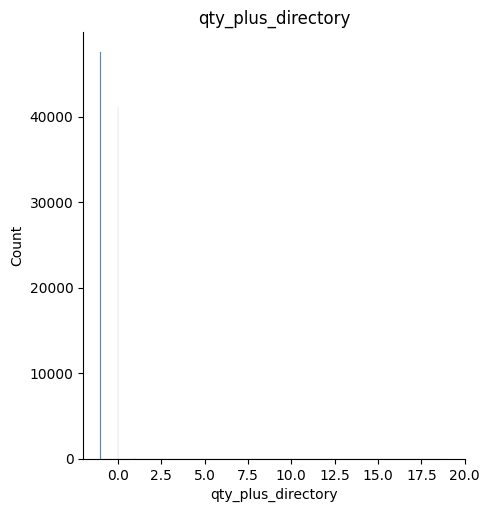

<Figure size 700x700 with 0 Axes>

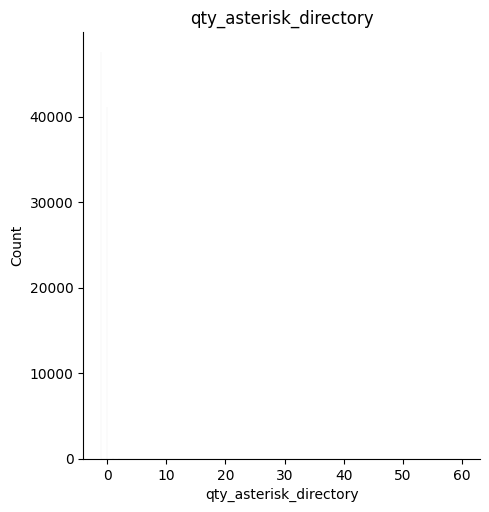

<Figure size 700x700 with 0 Axes>

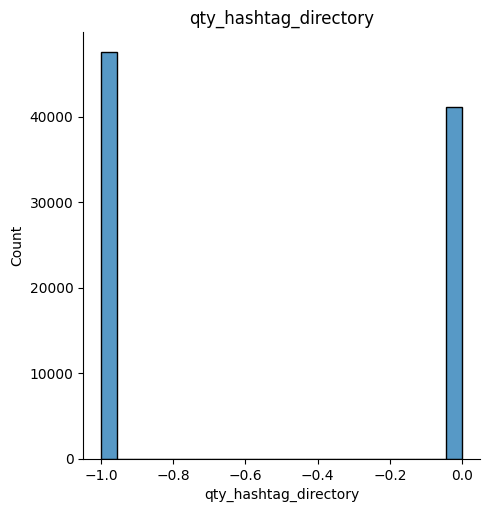

<Figure size 700x700 with 0 Axes>

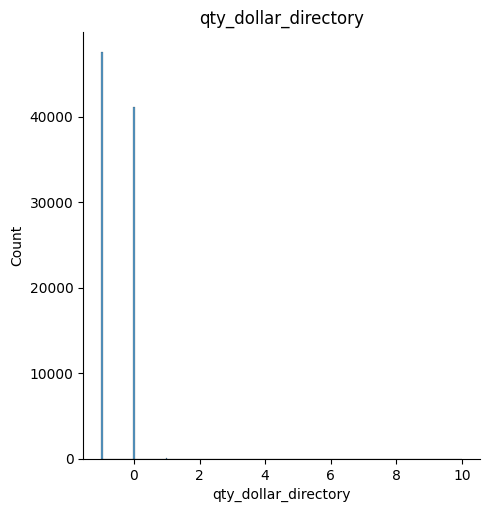

<Figure size 700x700 with 0 Axes>

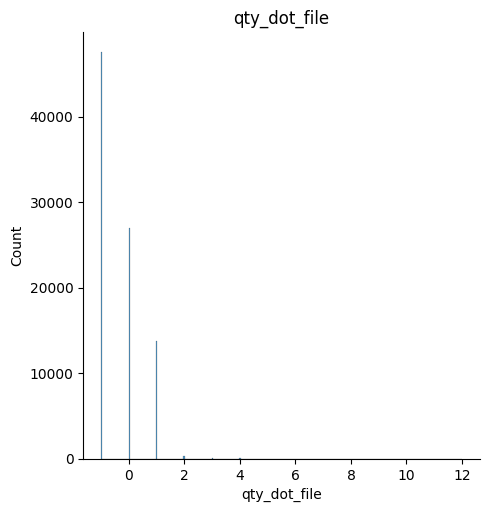

<Figure size 700x700 with 0 Axes>

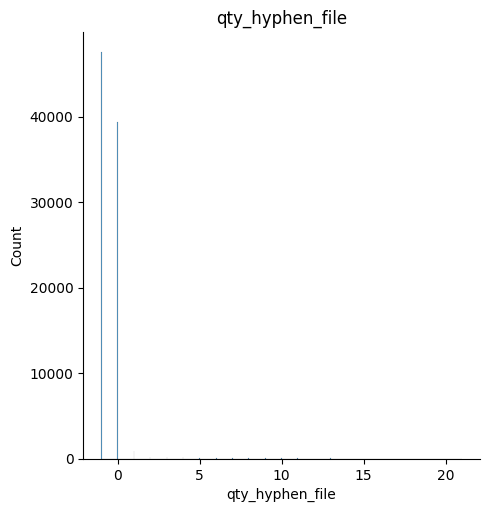

<Figure size 700x700 with 0 Axes>

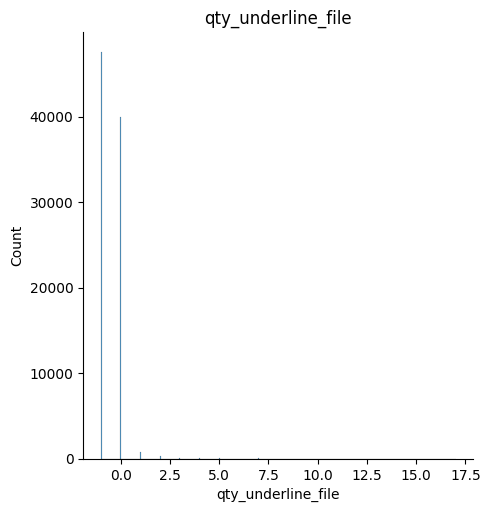

<Figure size 700x700 with 0 Axes>

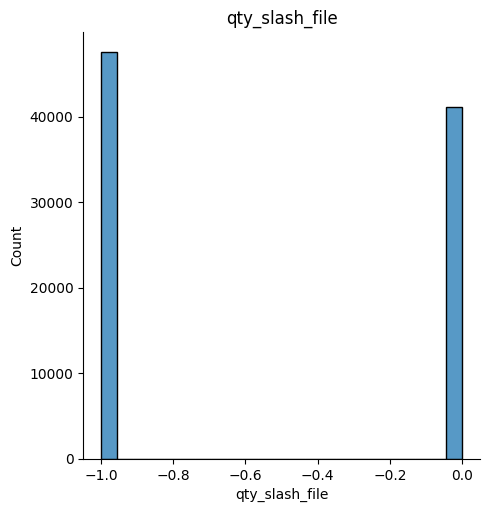

<Figure size 700x700 with 0 Axes>

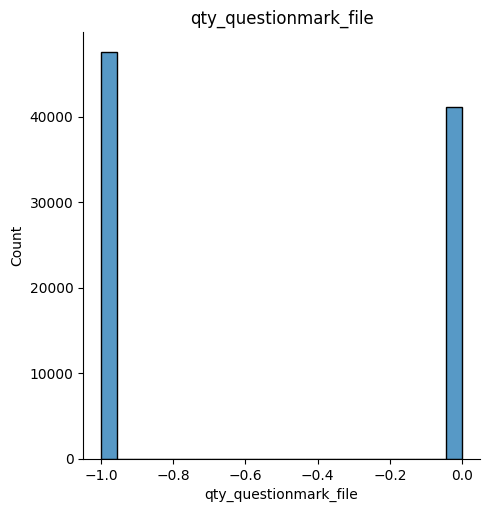

<Figure size 700x700 with 0 Axes>

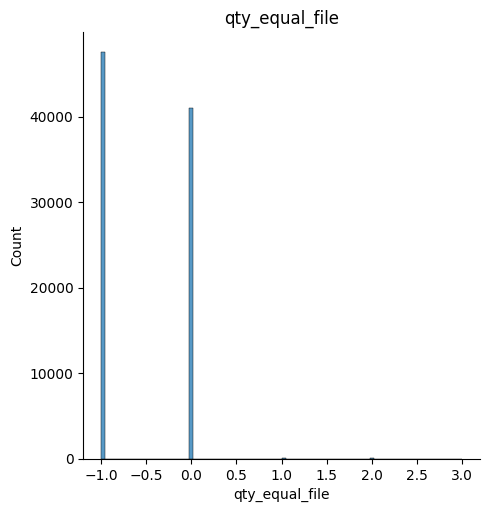

<Figure size 700x700 with 0 Axes>

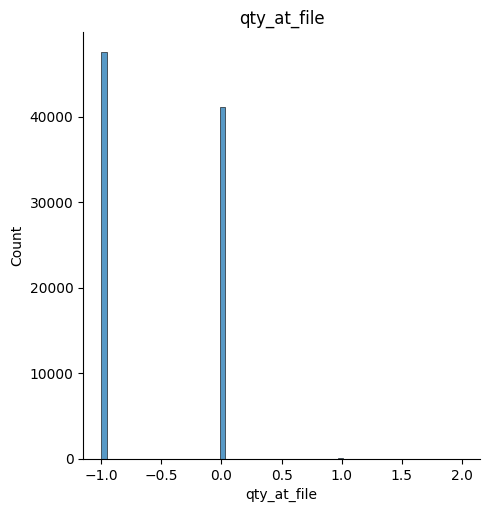

<Figure size 700x700 with 0 Axes>

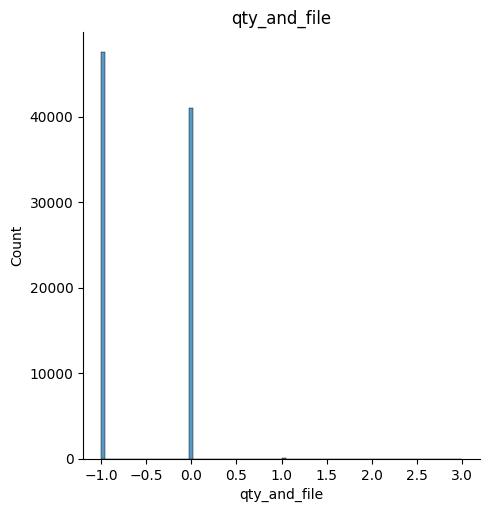

<Figure size 700x700 with 0 Axes>

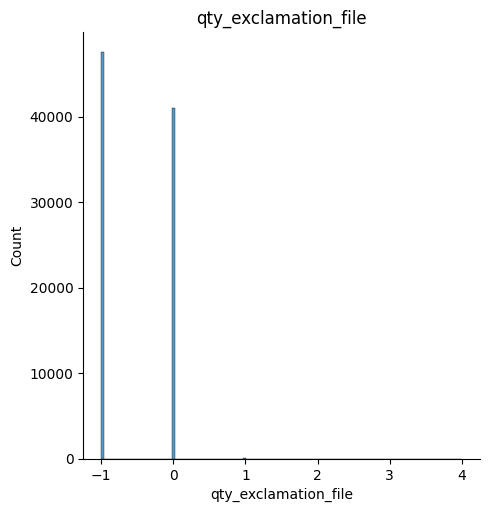

<Figure size 700x700 with 0 Axes>

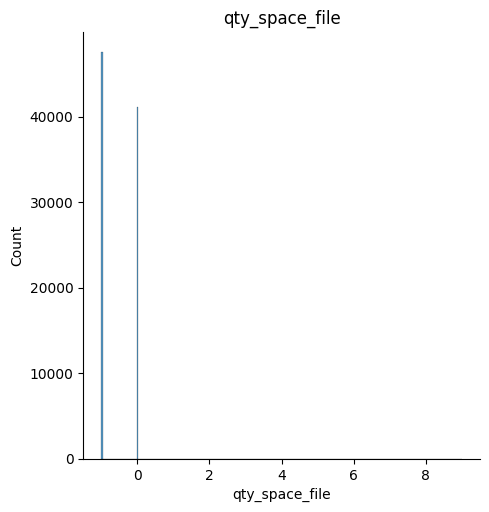

<Figure size 700x700 with 0 Axes>

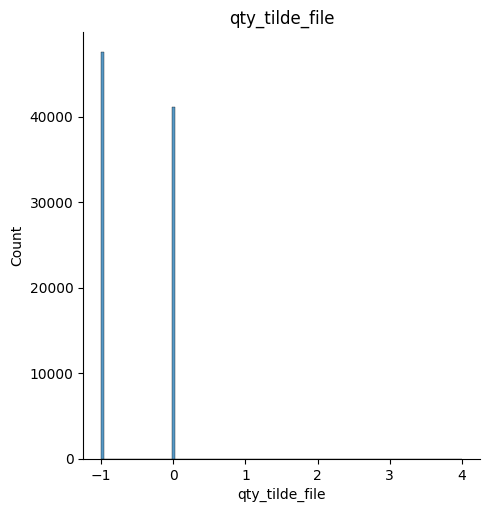

<Figure size 700x700 with 0 Axes>

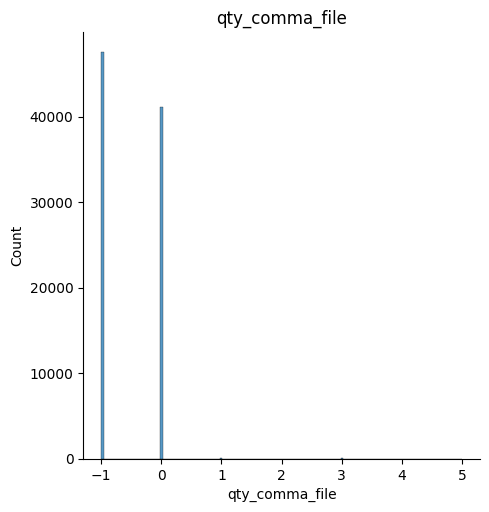

<Figure size 700x700 with 0 Axes>

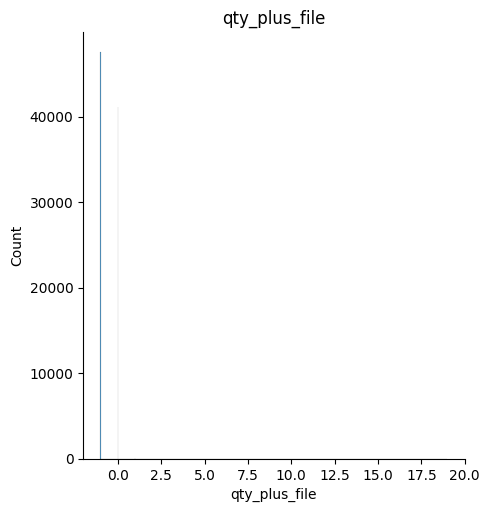

<Figure size 700x700 with 0 Axes>

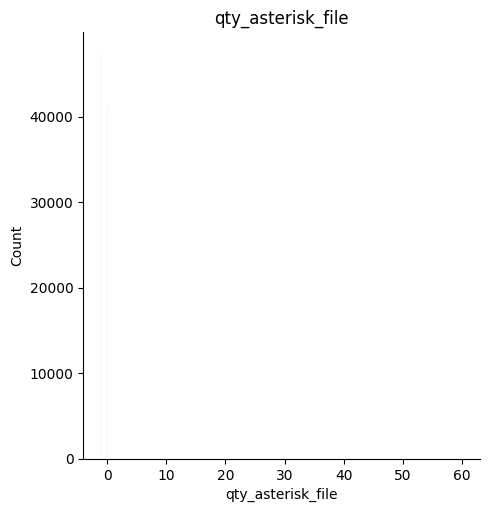

<Figure size 700x700 with 0 Axes>

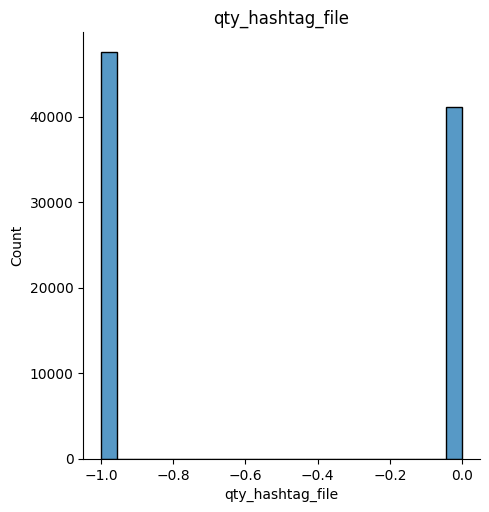

<Figure size 700x700 with 0 Axes>

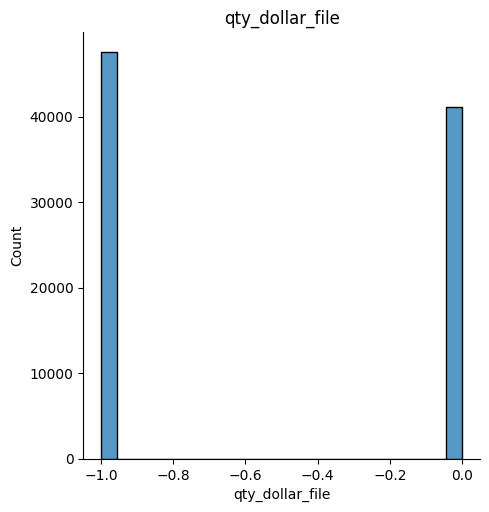

<Figure size 700x700 with 0 Axes>

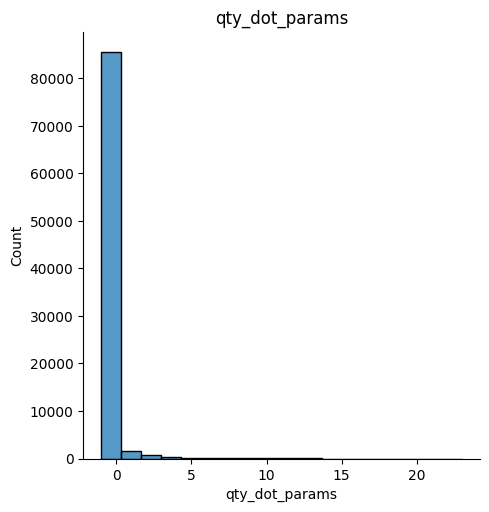

<Figure size 700x700 with 0 Axes>

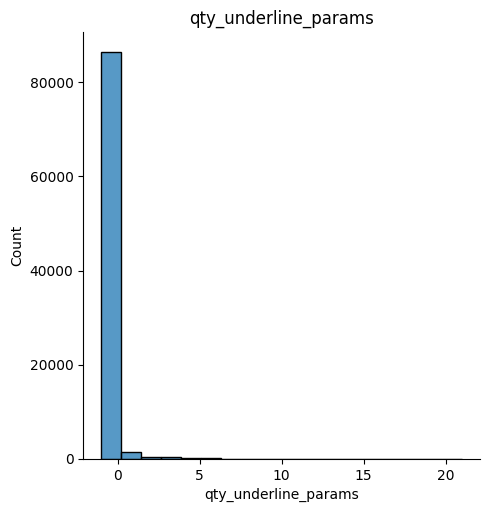

<Figure size 700x700 with 0 Axes>

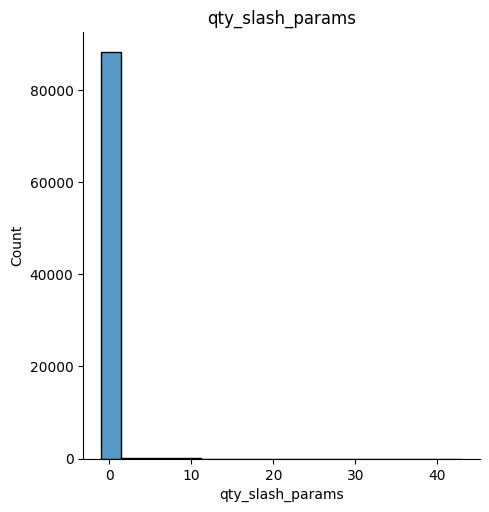

<Figure size 700x700 with 0 Axes>

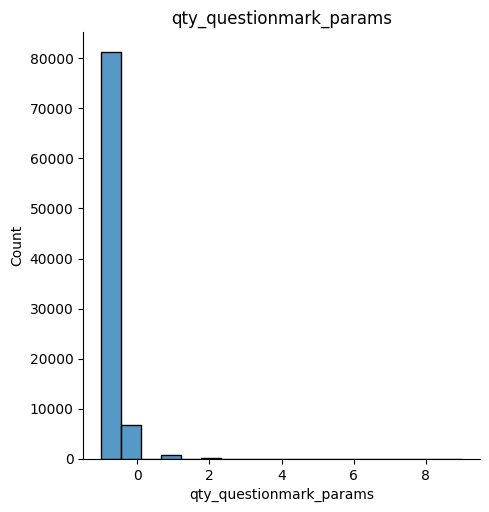

<Figure size 700x700 with 0 Axes>

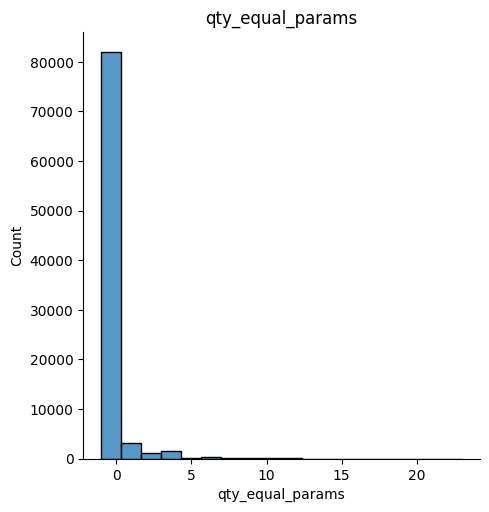

<Figure size 700x700 with 0 Axes>

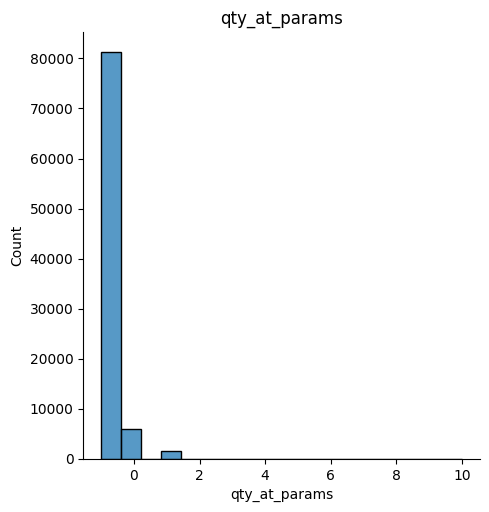

<Figure size 700x700 with 0 Axes>

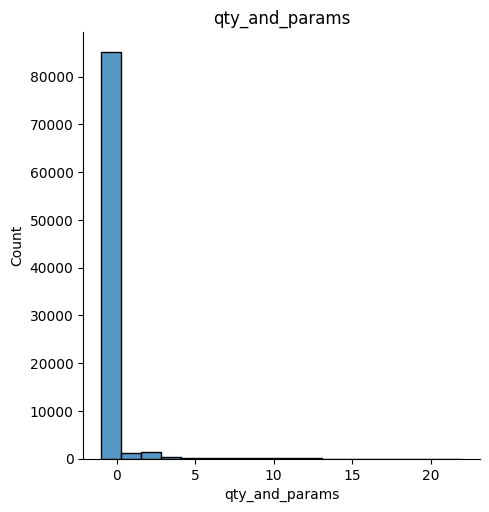

<Figure size 700x700 with 0 Axes>

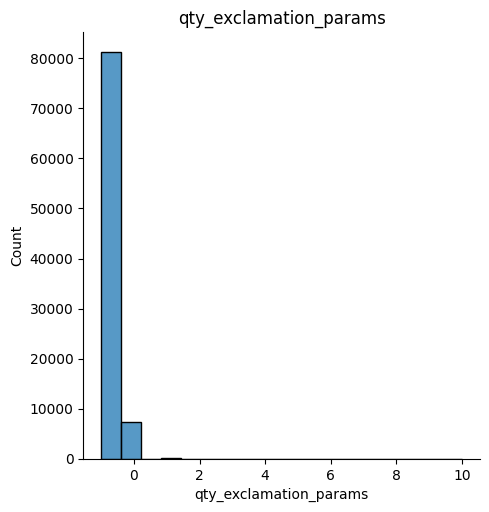

<Figure size 700x700 with 0 Axes>

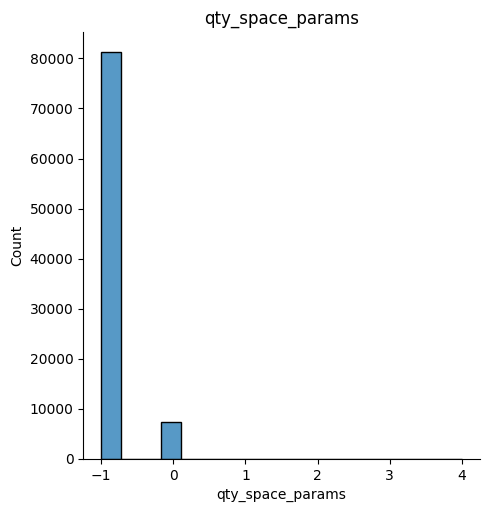

<Figure size 700x700 with 0 Axes>

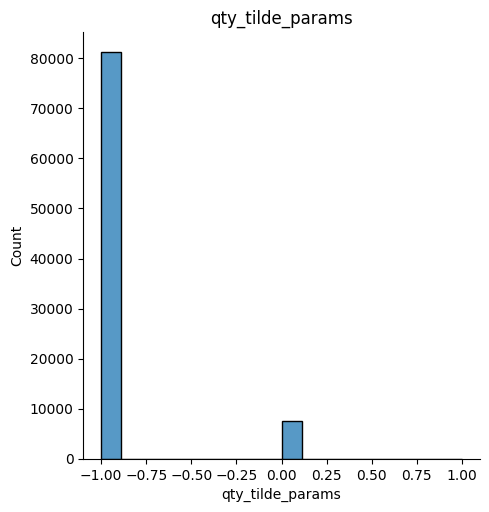

<Figure size 700x700 with 0 Axes>

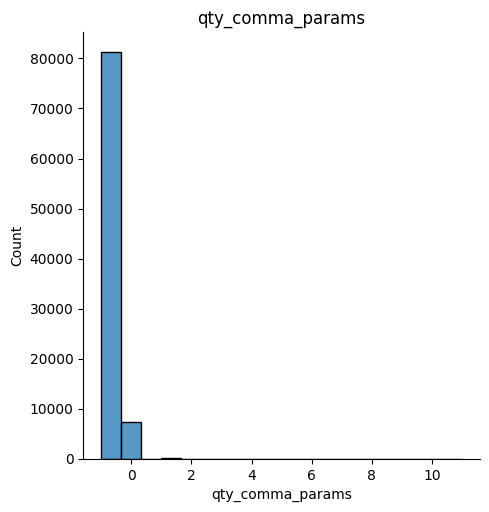

<Figure size 700x700 with 0 Axes>

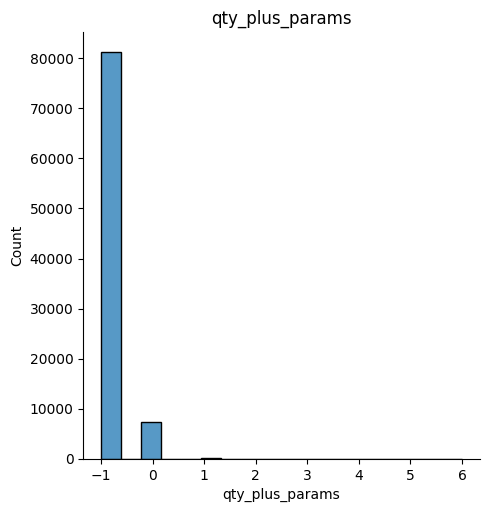

<Figure size 700x700 with 0 Axes>

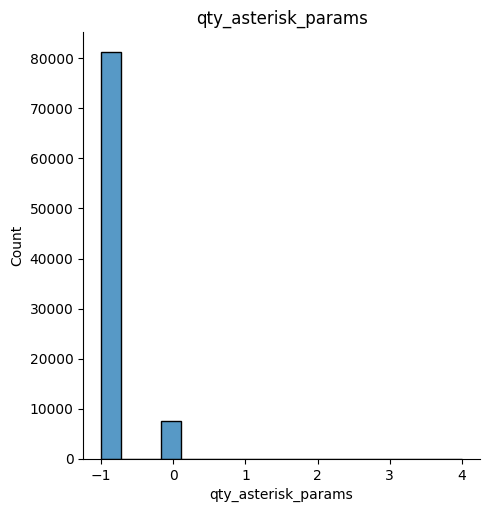

<Figure size 700x700 with 0 Axes>

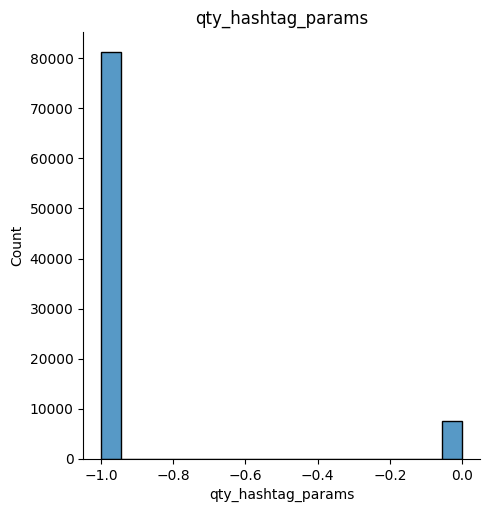

<Figure size 700x700 with 0 Axes>

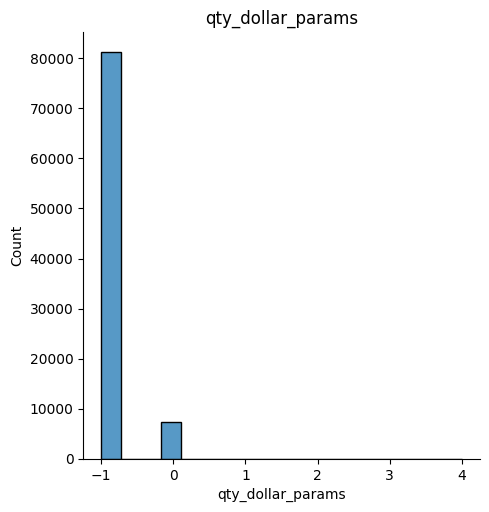

<Figure size 700x700 with 0 Axes>

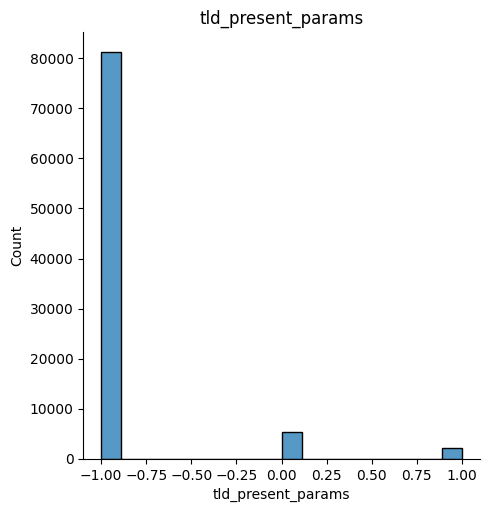

<Figure size 700x700 with 0 Axes>

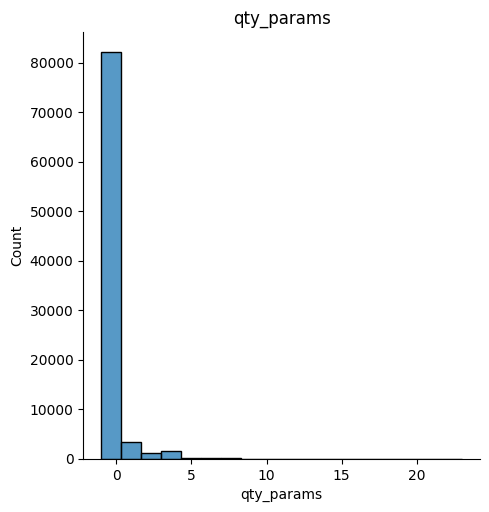

<Figure size 700x700 with 0 Axes>

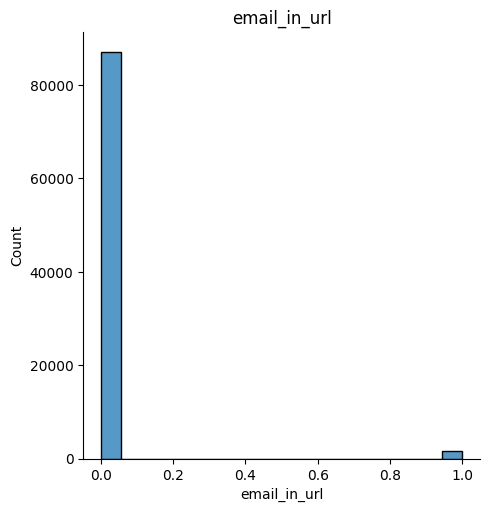

<Figure size 700x700 with 0 Axes>

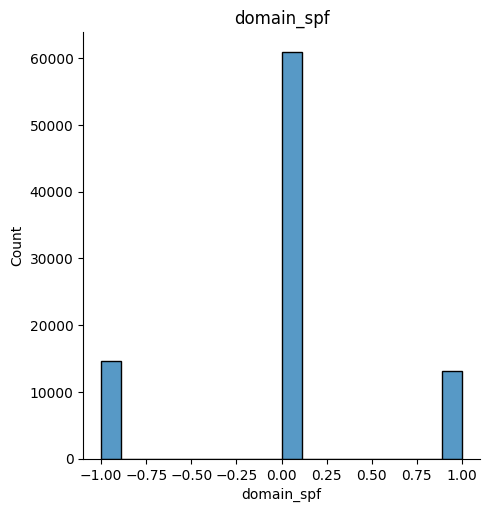

<Figure size 700x700 with 0 Axes>

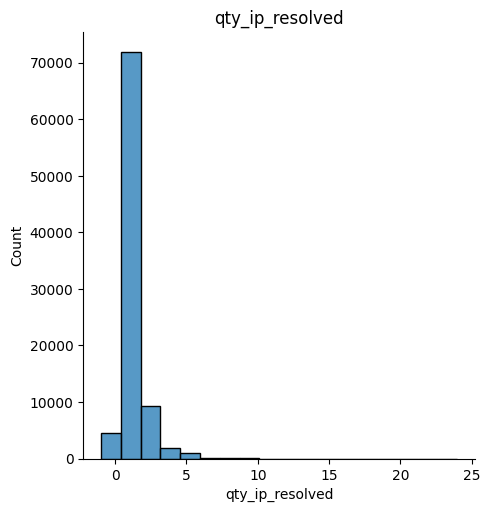

<Figure size 700x700 with 0 Axes>

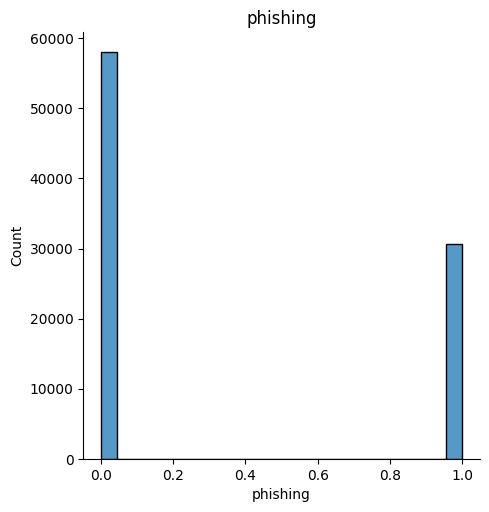

<Figure size 700x700 with 0 Axes>

In [17]:
for feature in discrete_features:
    data = df.copy()
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.figure(figsize=(7,7))
    plt.show()

# Insights

Skewed distribution is seen so transformation is needed

# Finding Target label occurence

In [18]:
df.phishing.value_counts()

phishing
0    58000
1    30647
Name: count, dtype: int64

# Insights

There is a large no. of difference in output label

# After doing the above steps in EDA, we came to the conclusion that

1. There are no missing values in the data so no need to replace those.
2. There is no categorical features so conversion of categorical features to numerical feature won't be needed.
3. There are outliers present in the numerical features so those are needed to be handled.
4. Data transformation needs to be done in order to bring all features in same scale.
5. As there is large difference in output label no. it is an imbalanced dataset so we need to handle this.

# Train-Test Split to avoid Data Leakage

In [19]:
X = df.drop(columns='phishing', axis=1)
y = df.phishing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# Feature Engineering for handling all observation done during EDA

#### Handling imbalanced Dataset by using SMOTE

This code snippet is implementing Synthetic Minority Over-sampling Technique (SMOTE), a technique commonly used to address class imbalance in machine learning datasets. Class imbalance occurs when one class (minority class) is underrepresented compared to another class (majority class). SMOTE is particularly helpful when dealing with imbalanced datasets to avoid biased model training.


In [20]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate data
oversampled_X_train, oversampled_y_train = sm.fit_resample(X_train, y_train)
train_data = pd.concat([pd.DataFrame(oversampled_y_train), pd.DataFrame(oversampled_X_train)], axis=1)

oversampled_X_test, oversampled_y_test = sm.fit_resample(X_test, y_test)
test_data = pd.concat([pd.DataFrame(oversampled_y_test), pd.DataFrame(oversampled_X_test)], axis=1)


In [21]:
train_data.phishing.value_counts()

phishing
0    38822
1    38822
Name: count, dtype: int64

In [22]:
test_data.phishing.value_counts()

phishing
0    19178
1    19178
Name: count, dtype: int64

# Insight
Imbalanced dataset is handled by using smote

# Handling outliers : 
# Continuous features using IQR (As the distribution is skewed) in train data


In [23]:
for feature in continuous_features:
    IQR = train_data[feature].quantile(0.75) - train_data[feature].quantile(0.25)
    lower_bridge = train_data[feature].quantile(0.25) - (1.5 * IQR)
    upper_bridge = train_data[feature].quantile(0.75) + (1.5 * IQR)
    
    train_data.loc[train_data[feature] < lower_bridge, feature] = lower_bridge
    train_data.loc[train_data[feature] >= upper_bridge, feature] = upper_bridge

# Visualization of removed outlier in continuous features in train data

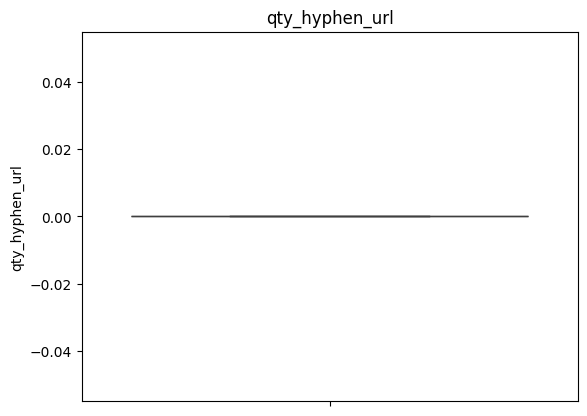

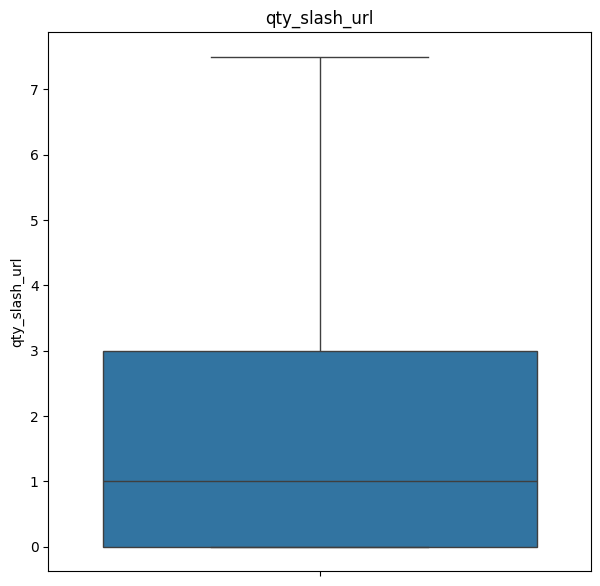

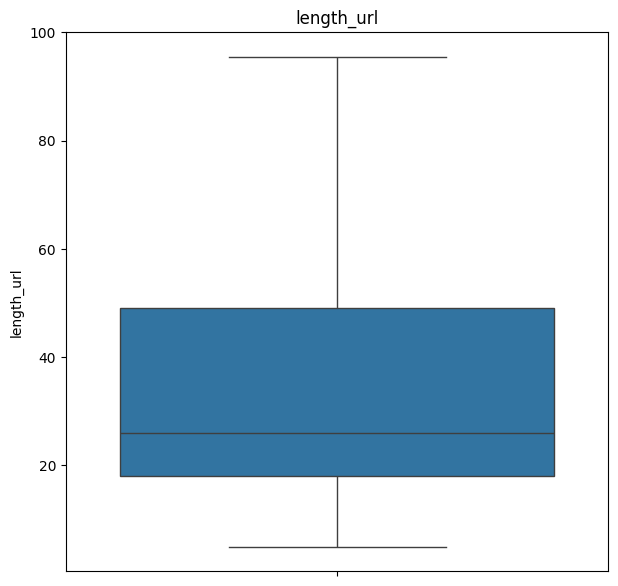

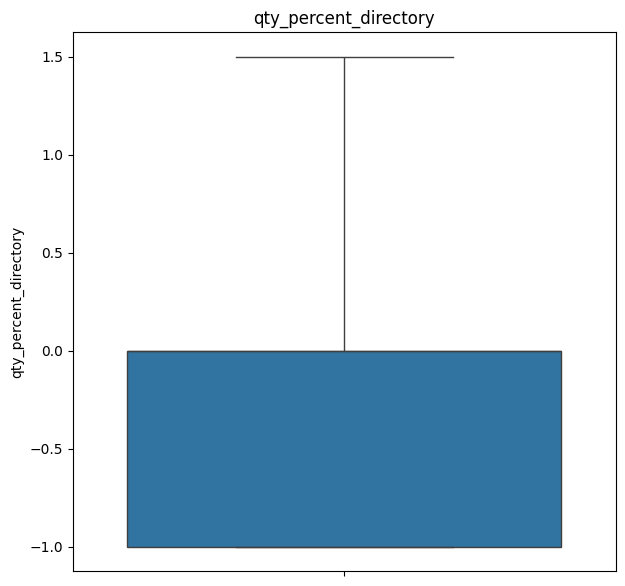

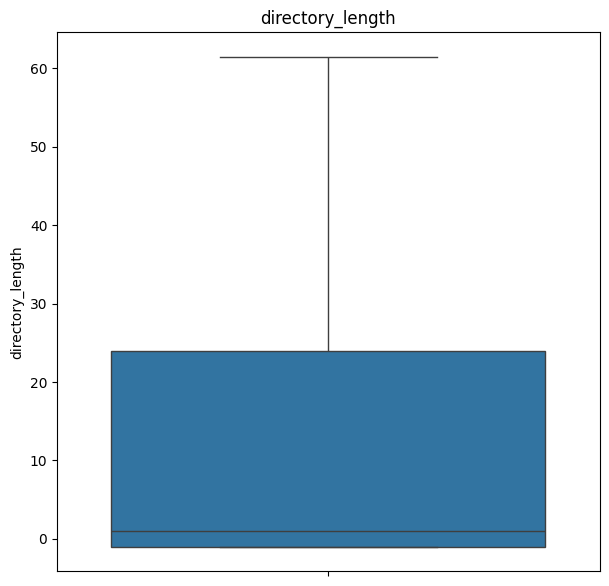

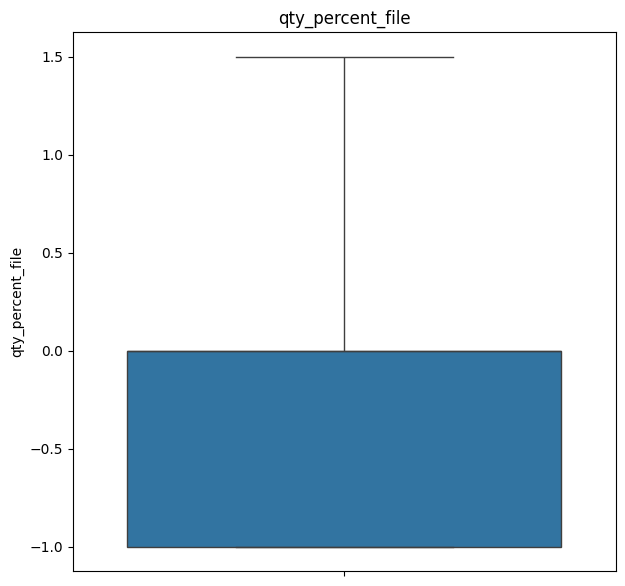

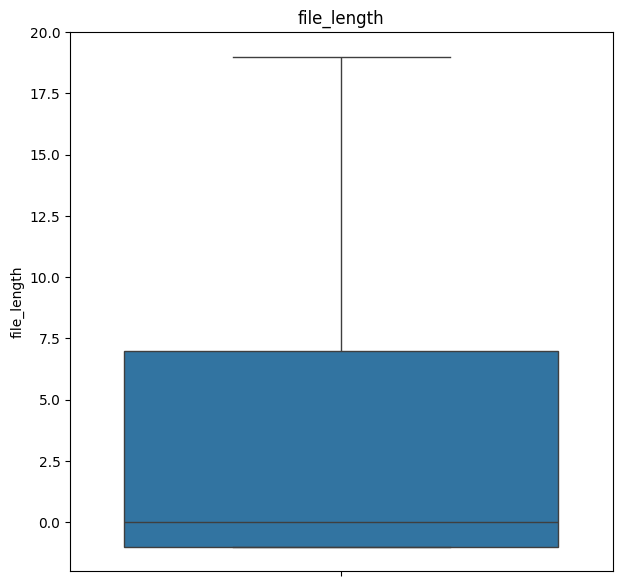

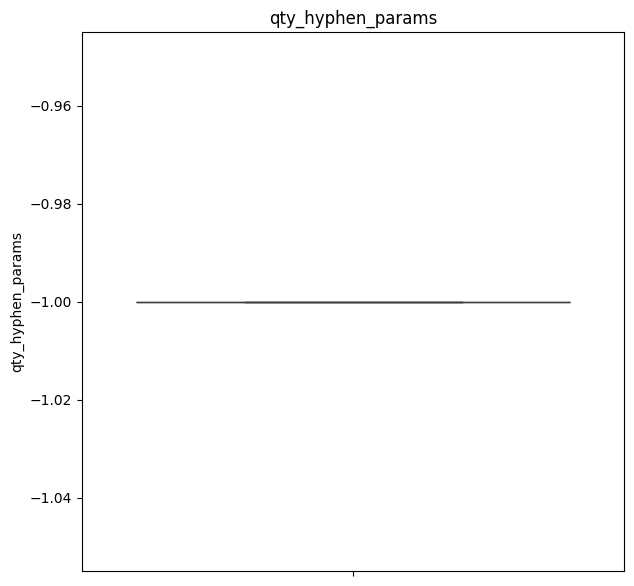

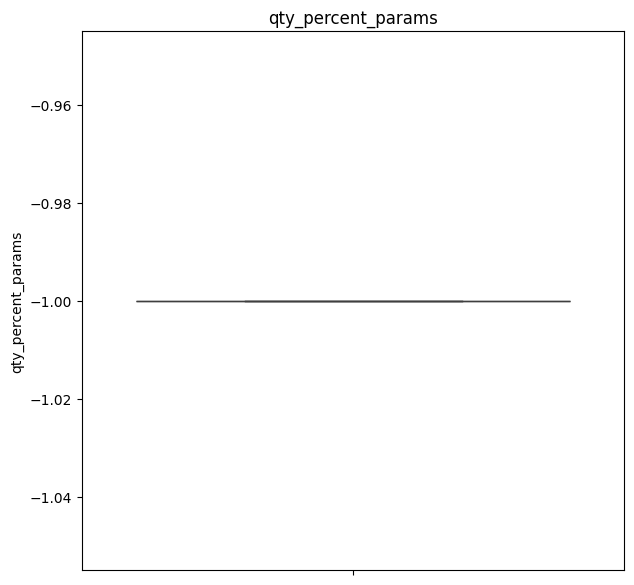

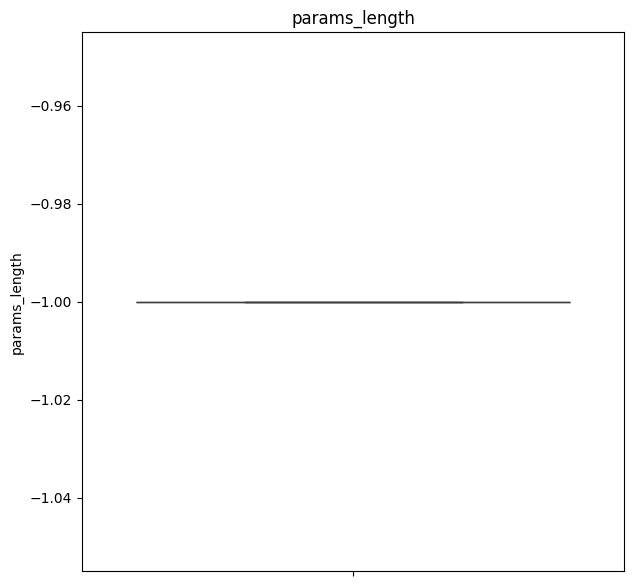

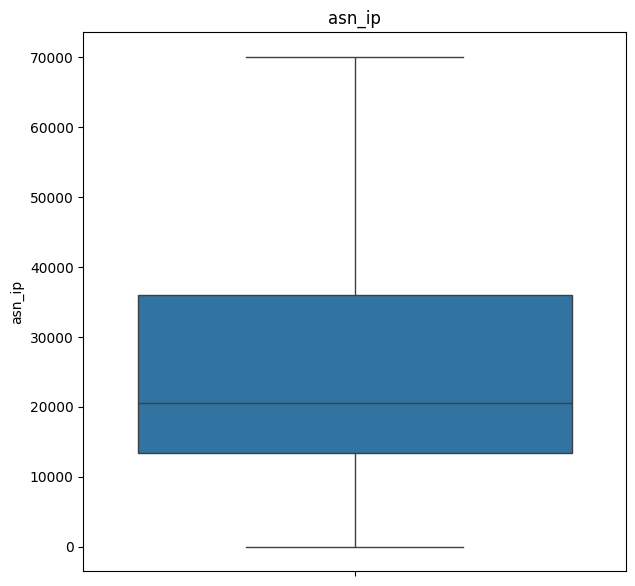

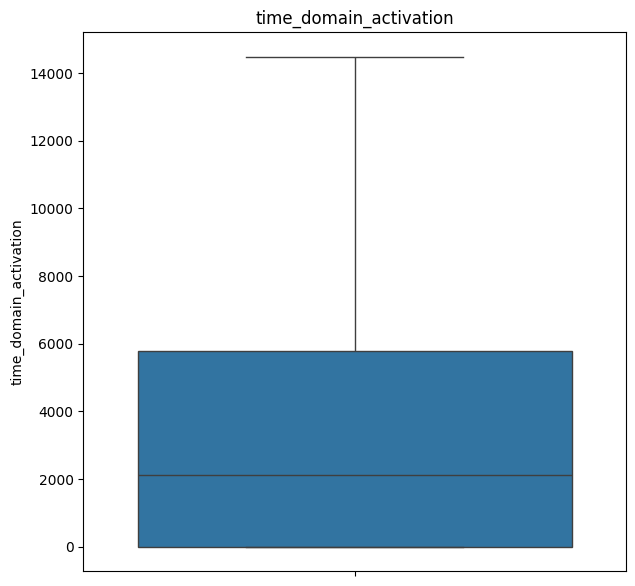

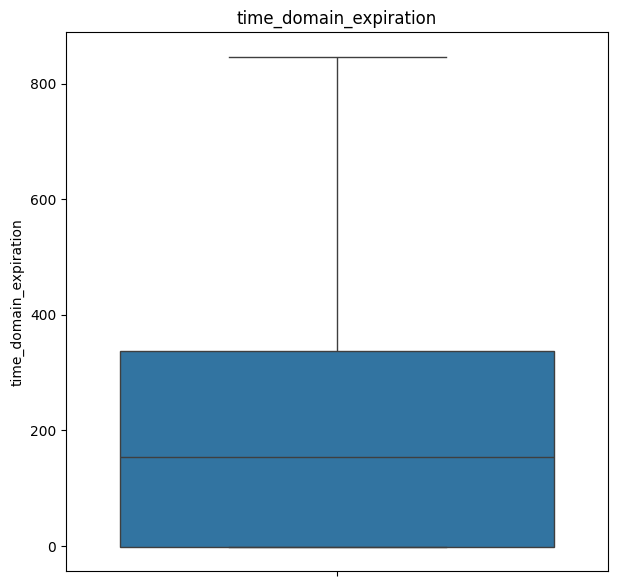

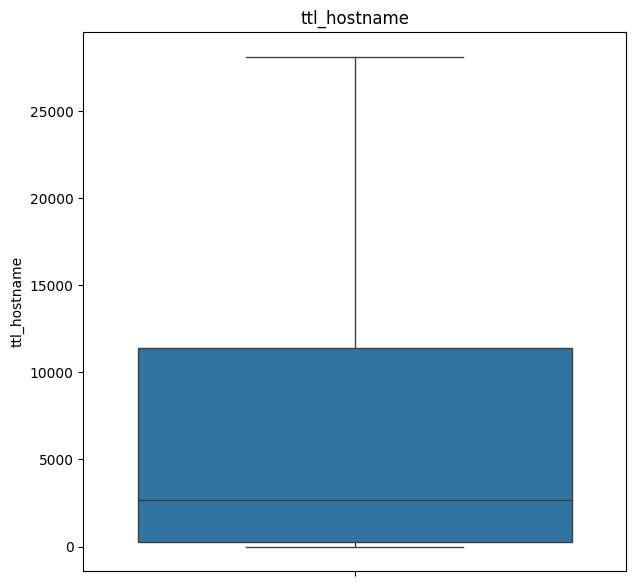

<Figure size 700x700 with 0 Axes>

In [24]:
for feature in continuous_features:
    sns.boxplot(data=train_data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

# Handling outliers: 
# Discrete features using IQR (As the distribution is skewed) in train data set


In [25]:
for feature in discrete_features:
    IQR = train_data[feature].quantile(0.75) - train_data[feature].quantile(0.25)
    lower_bridge = train_data[feature].quantile(0.25) - (1.5 * IQR)
    upper_bridge = train_data[feature].quantile(0.75) + (1.5 * IQR)
    
    train_data.loc[train_data[feature] < lower_bridge, feature] = lower_bridge
    train_data.loc[train_data[feature] >= upper_bridge, feature] = upper_bridge

# Visualization of removed outlier in discrete features in train dataset

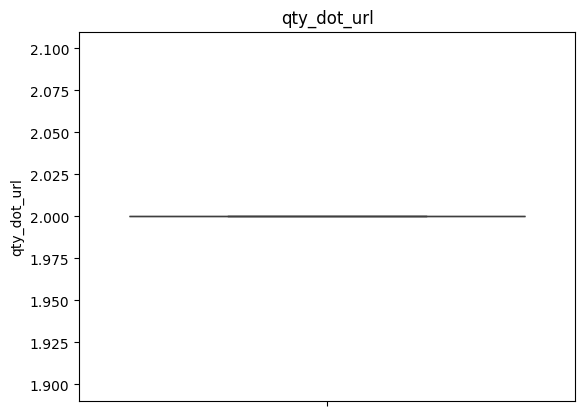

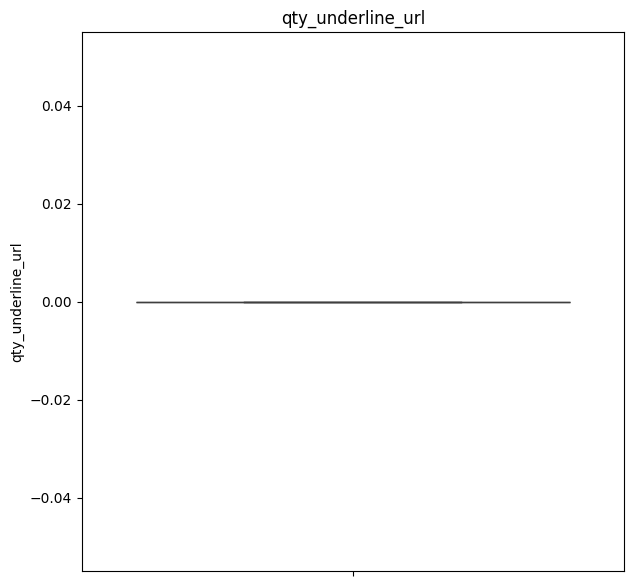

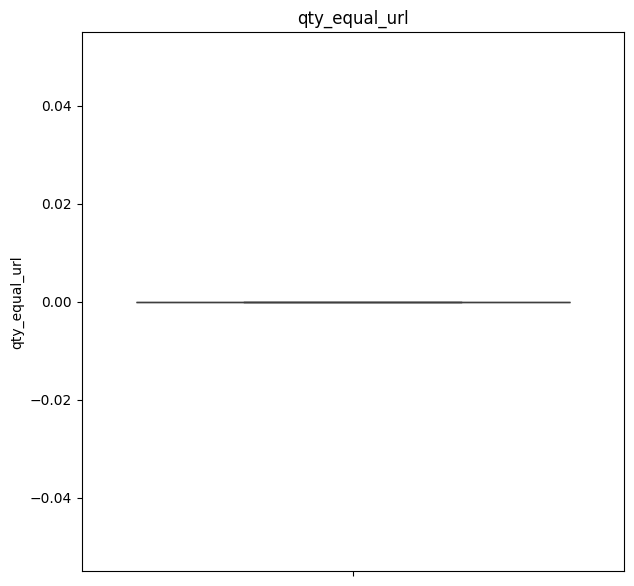

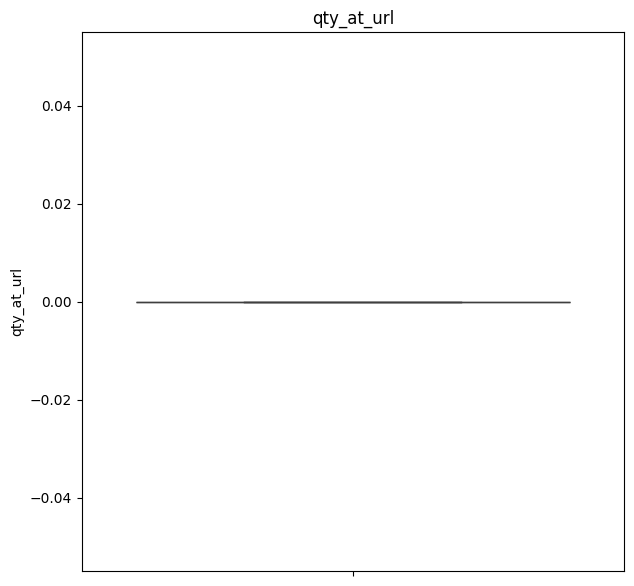

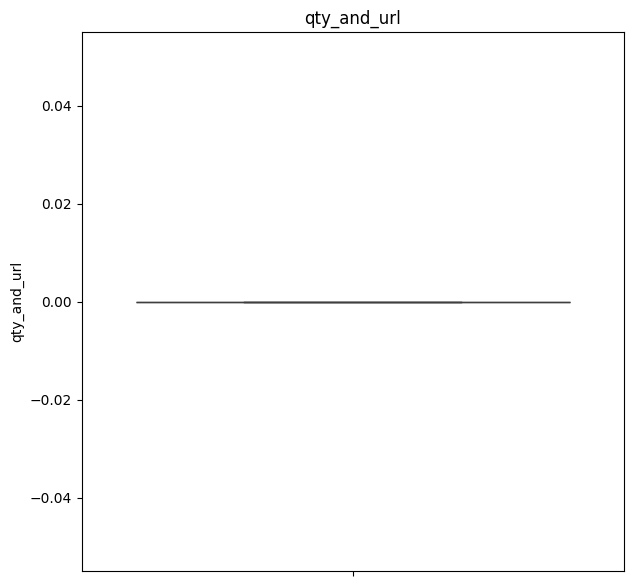

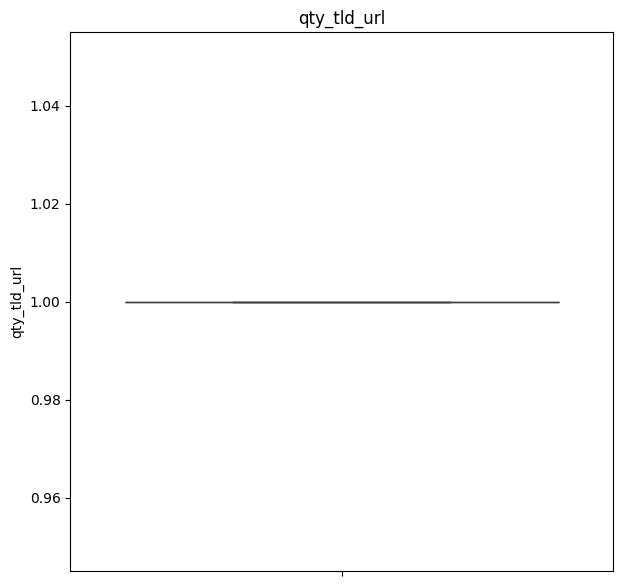

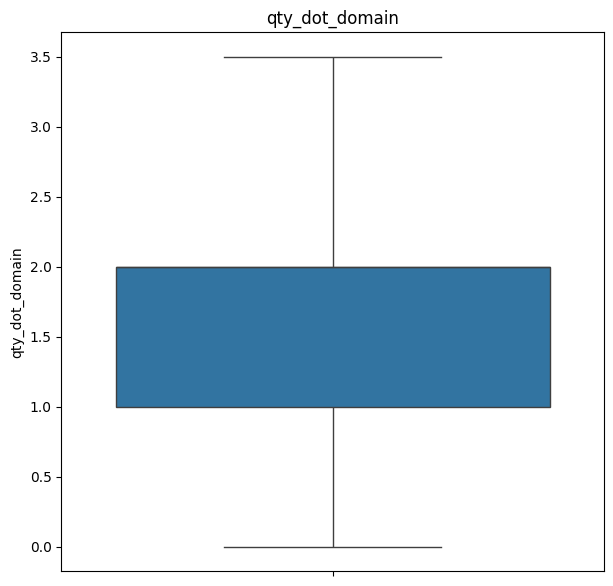

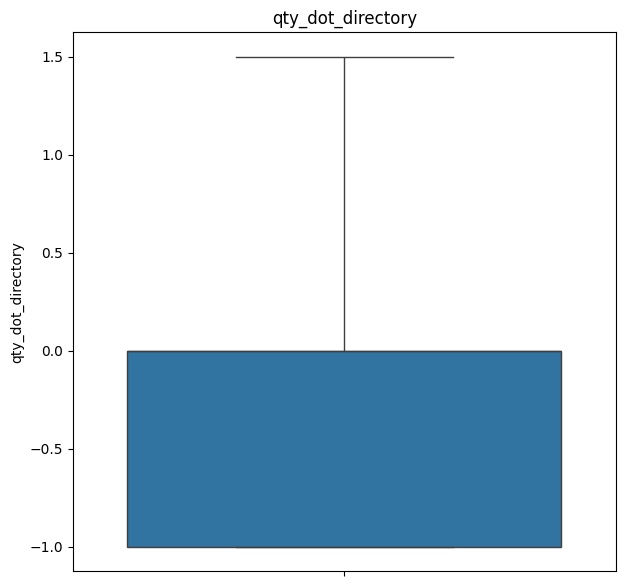

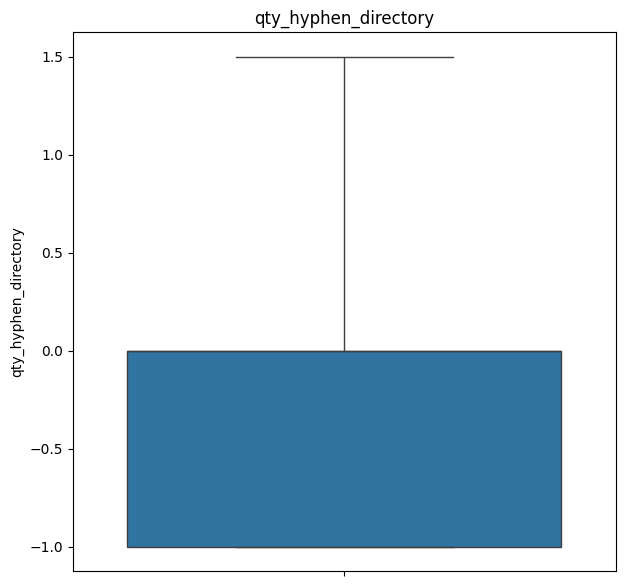

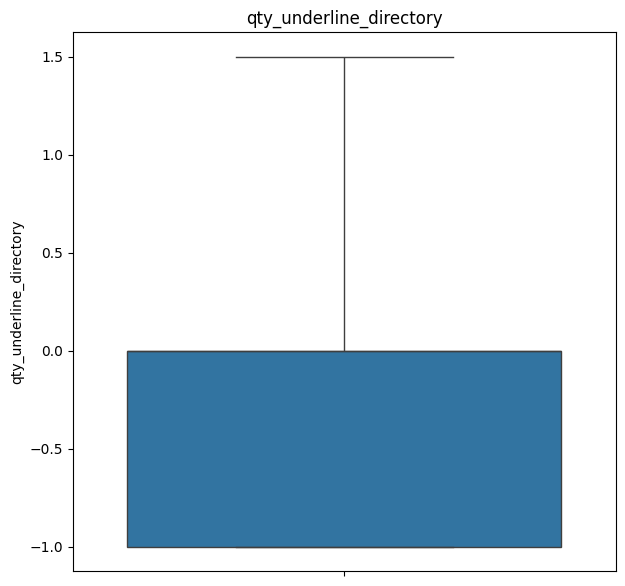

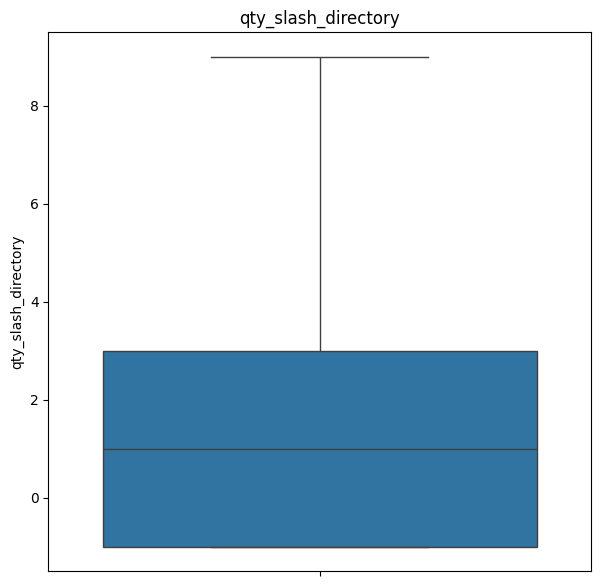

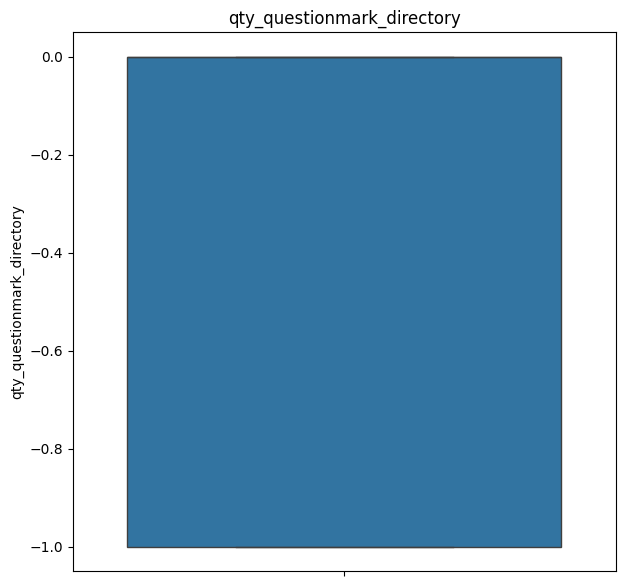

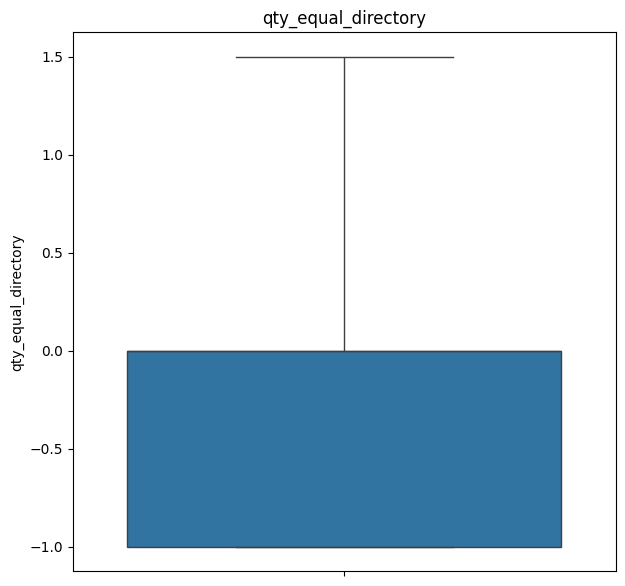

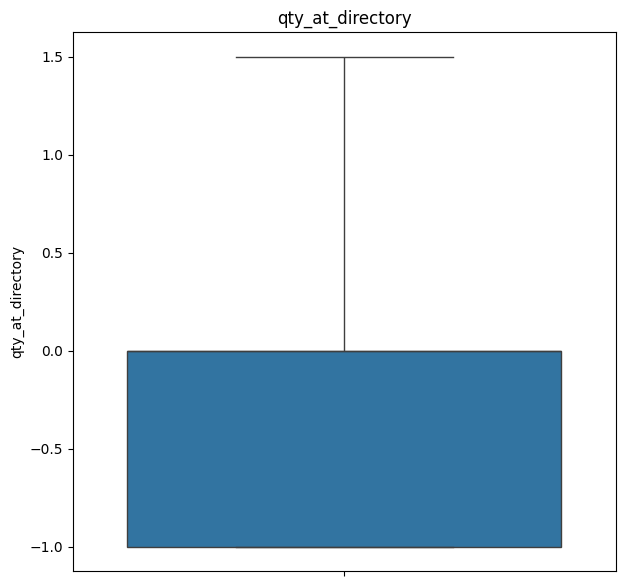

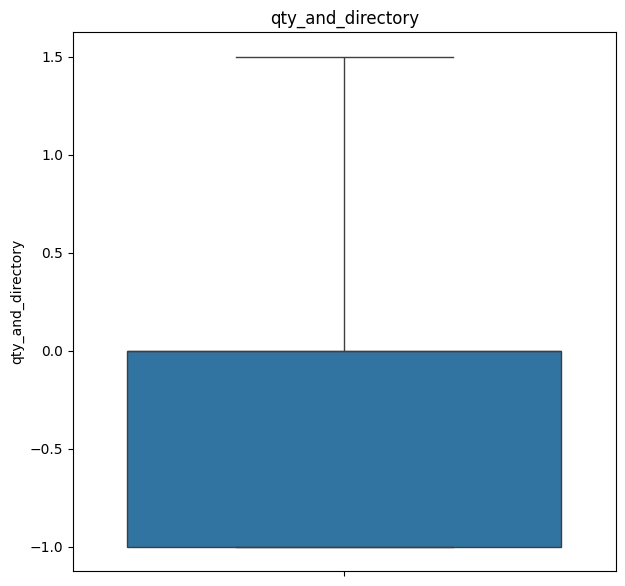

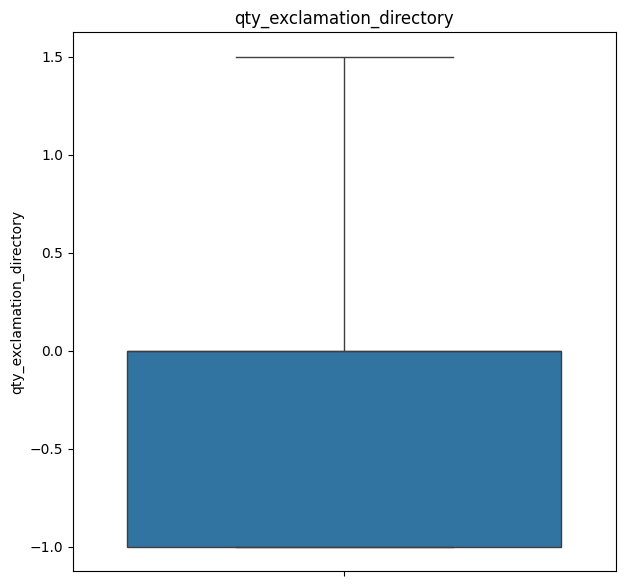

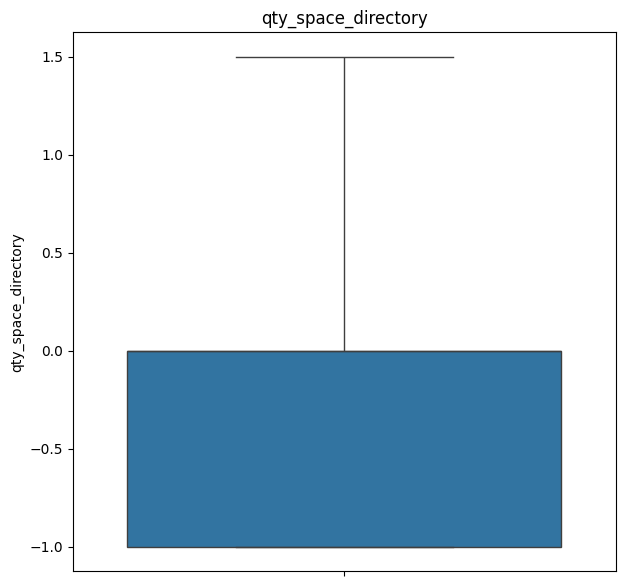

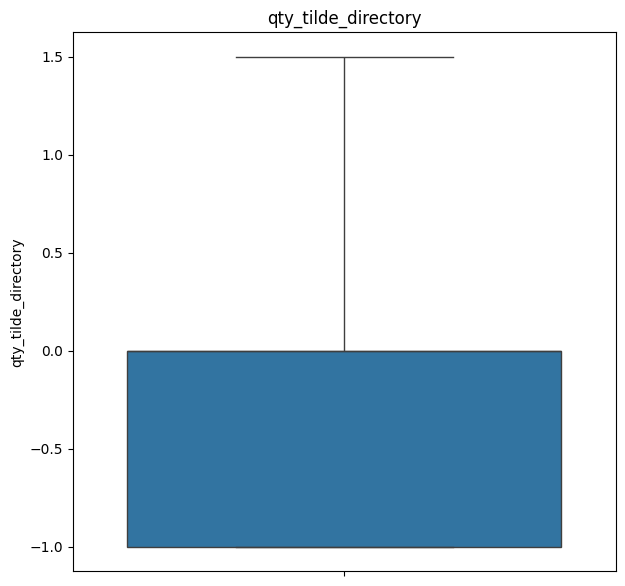

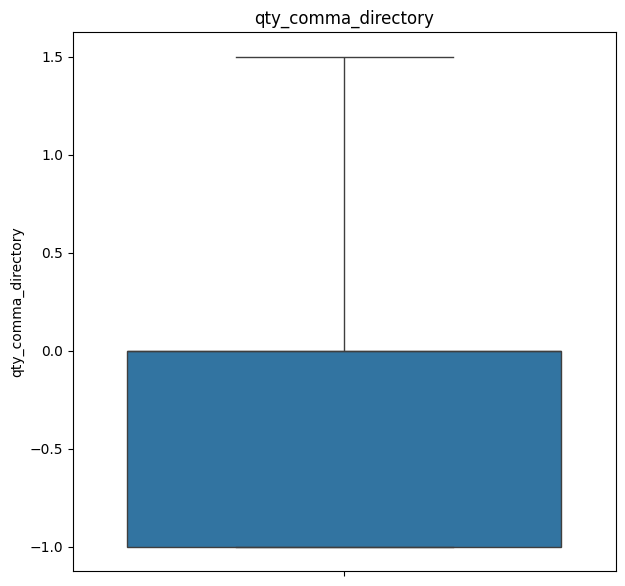

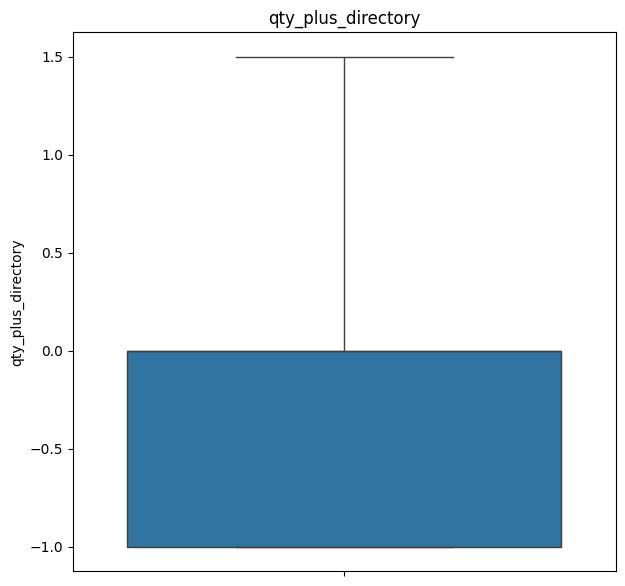

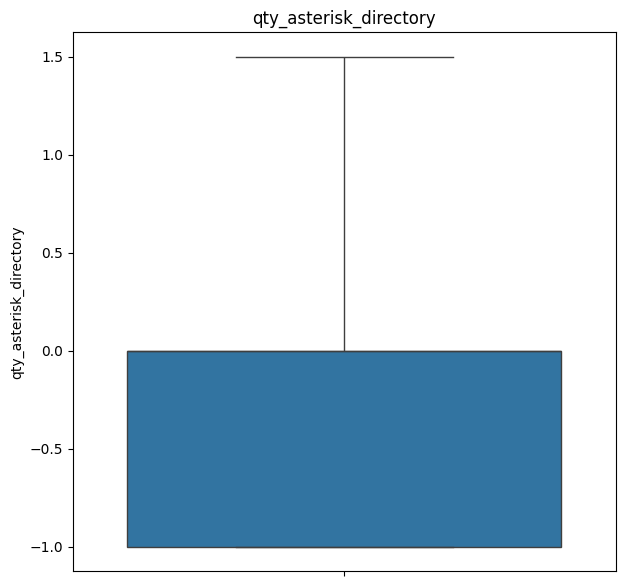

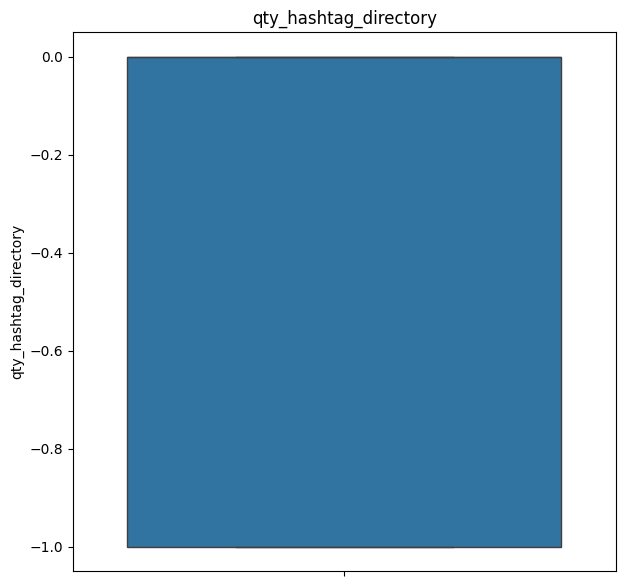

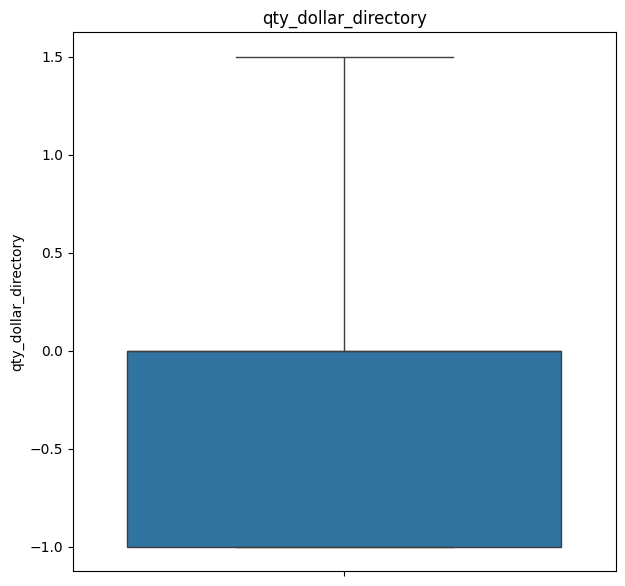

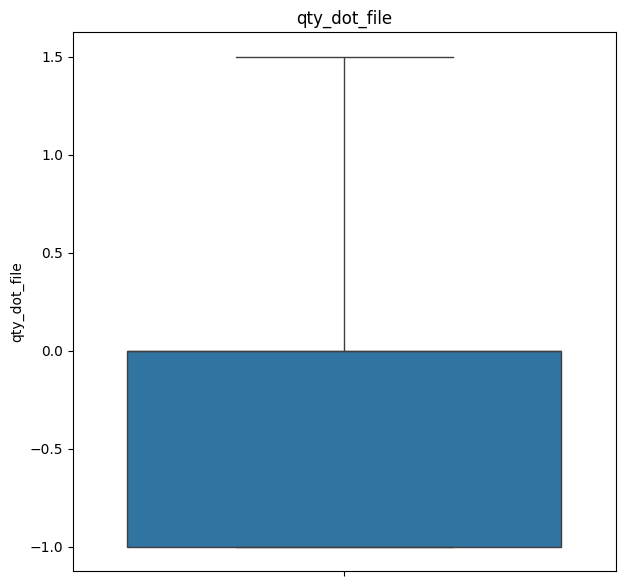

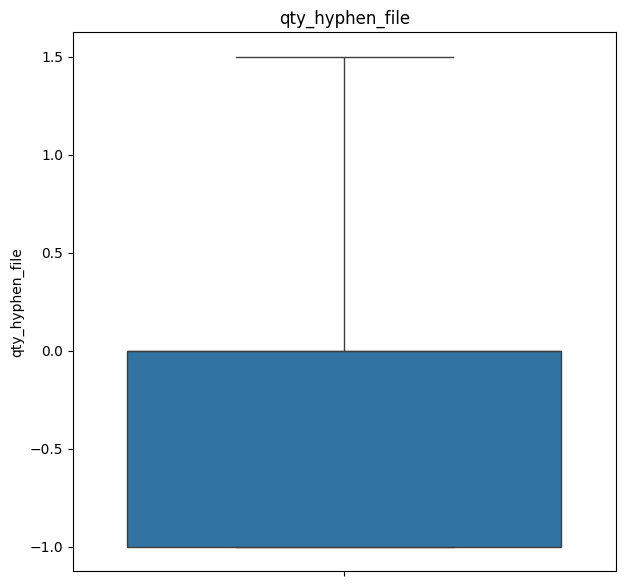

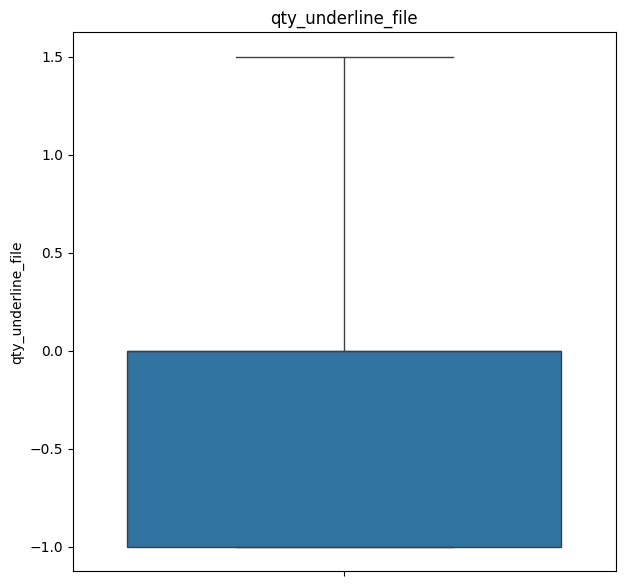

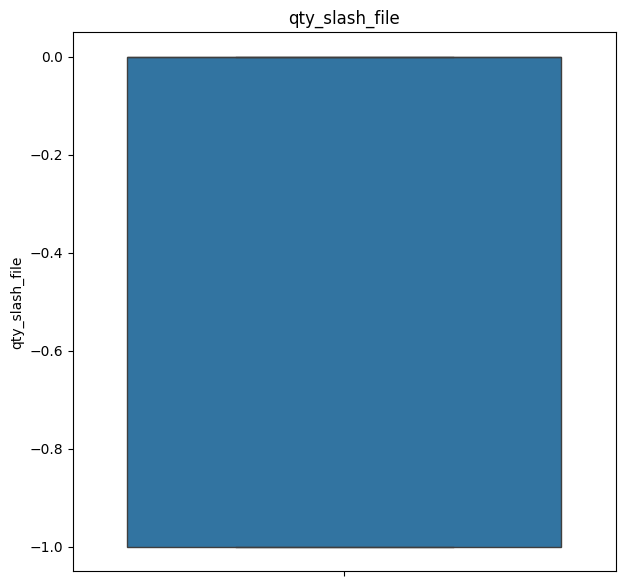

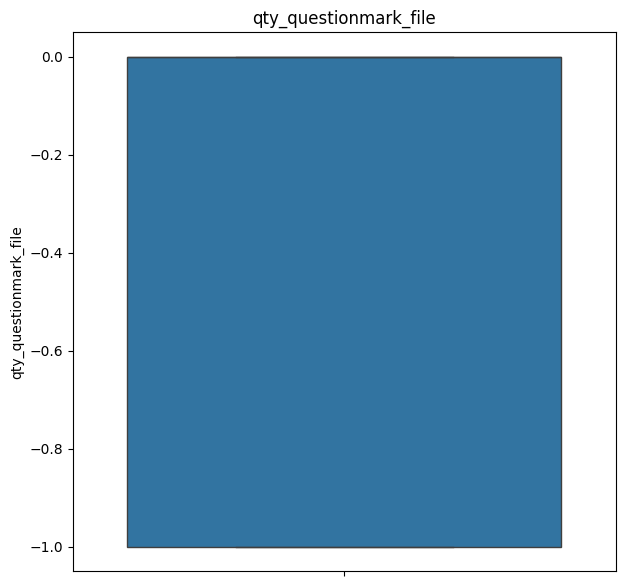

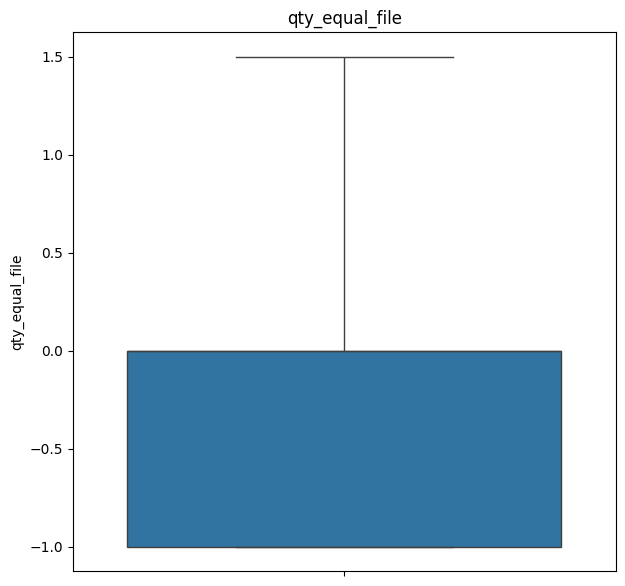

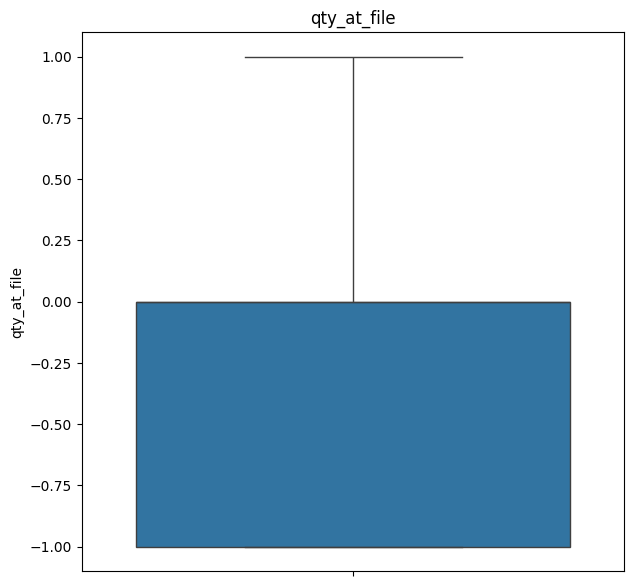

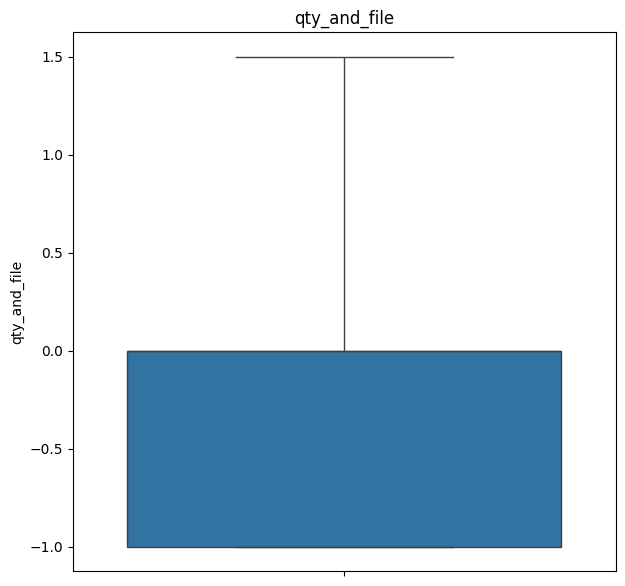

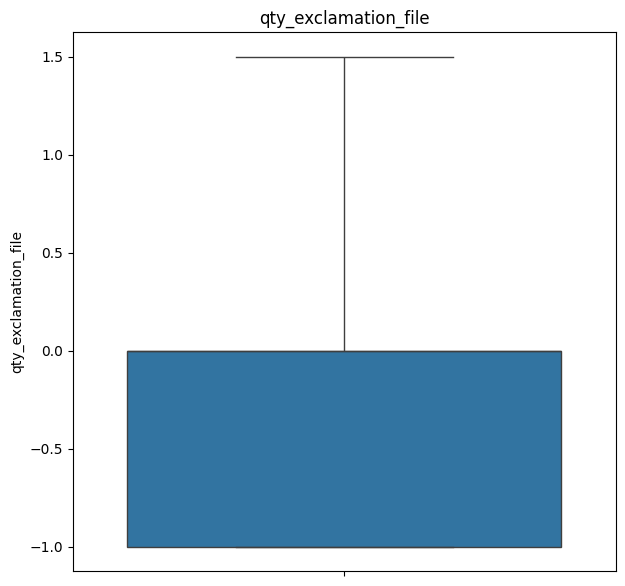

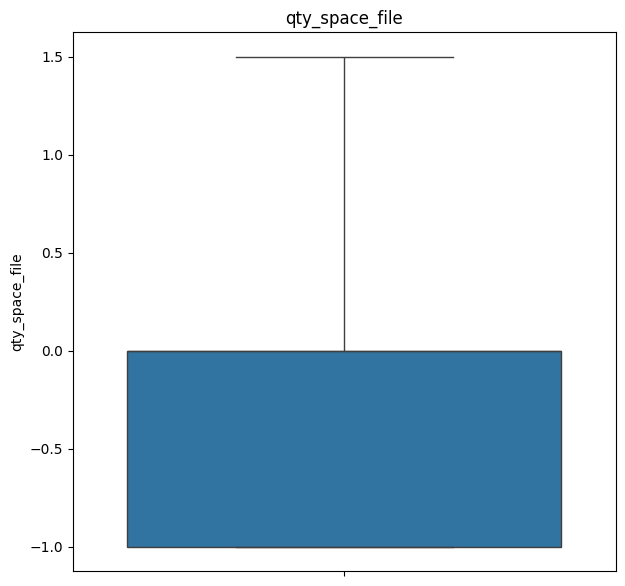

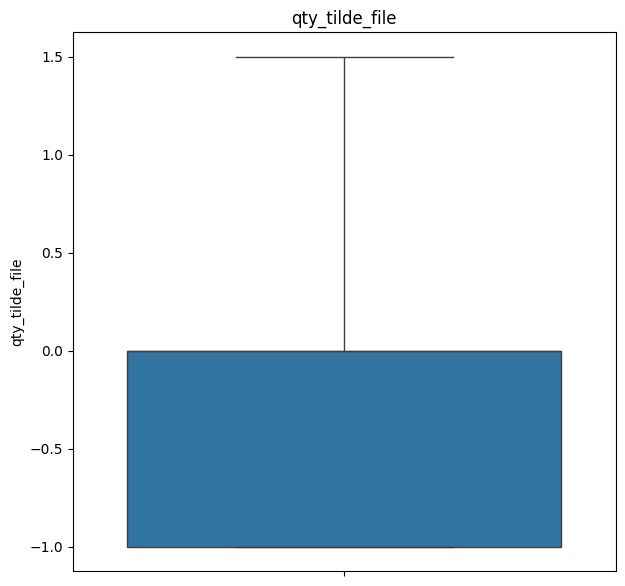

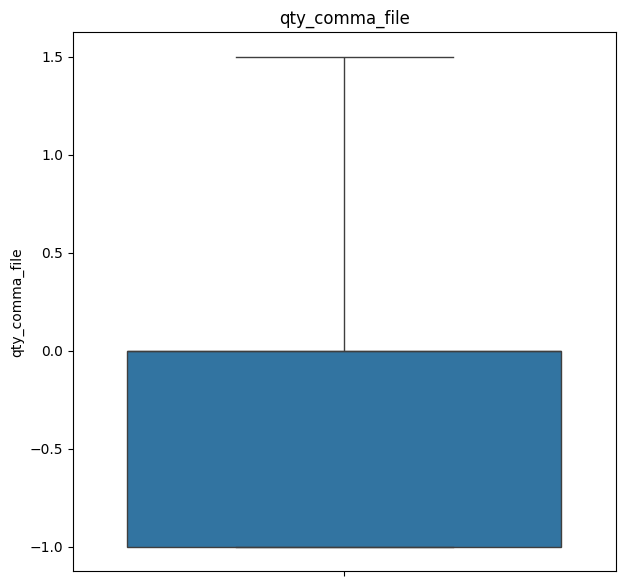

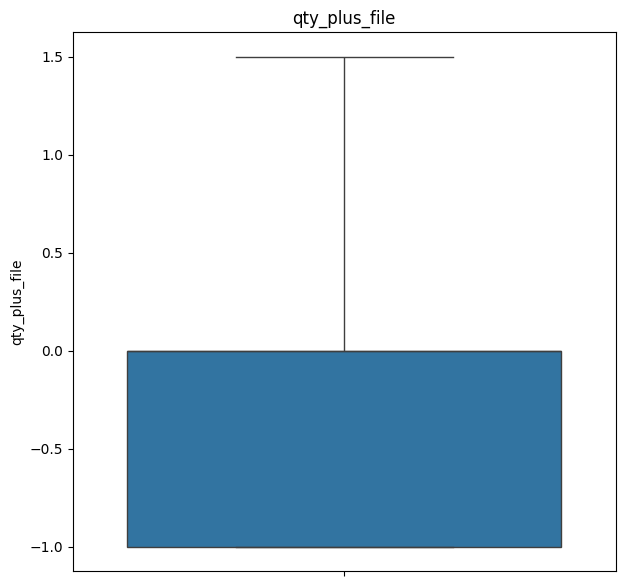

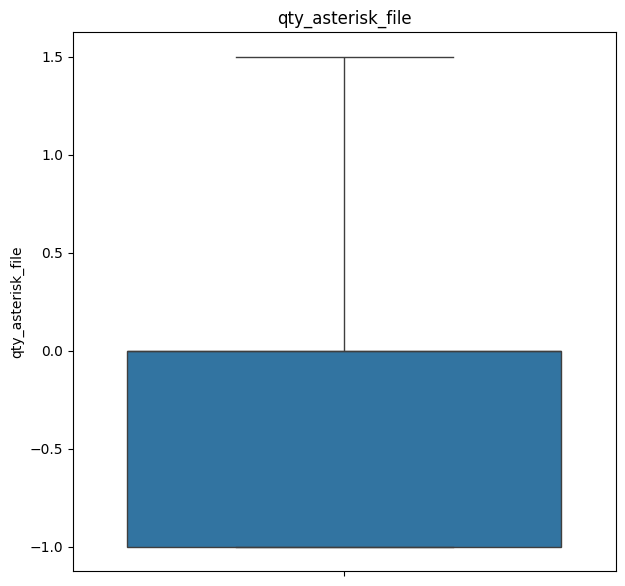

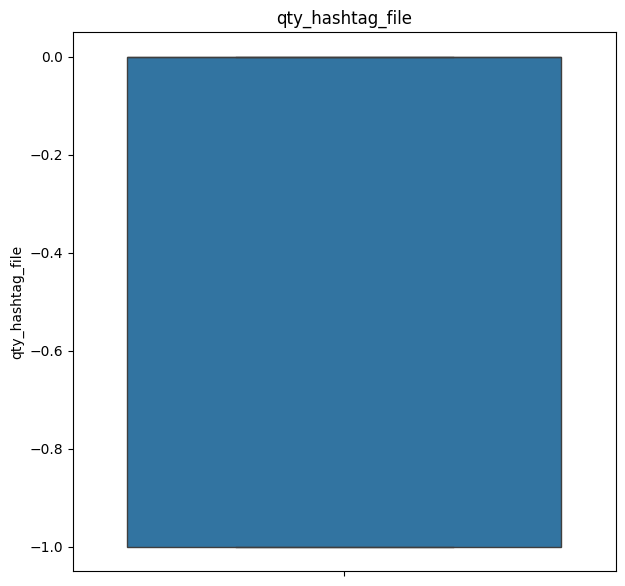

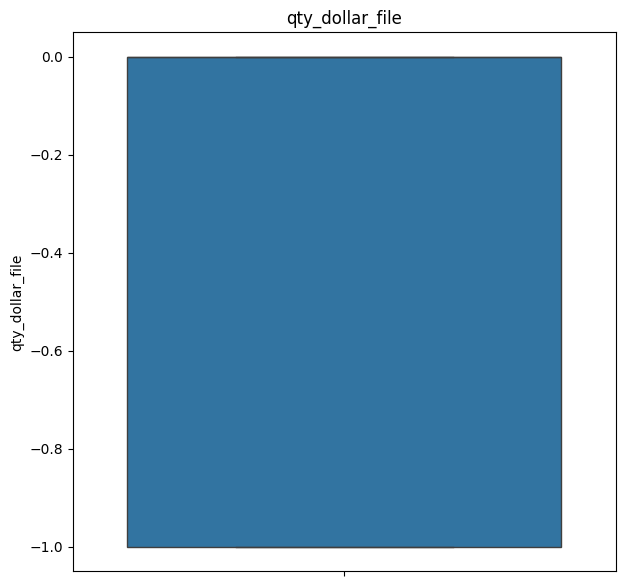

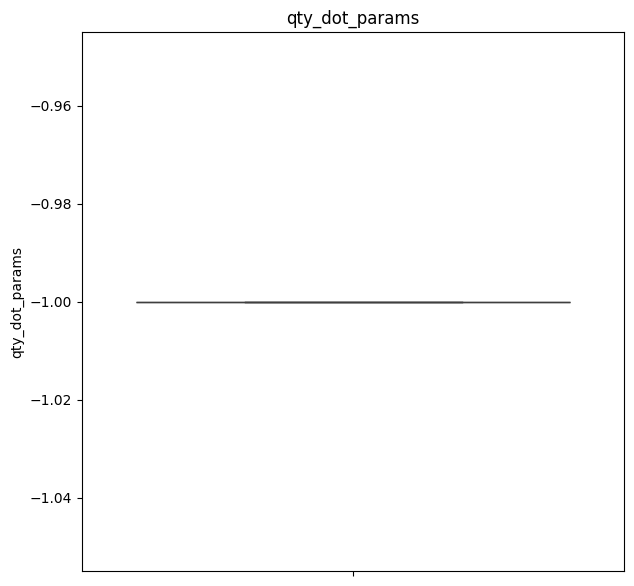

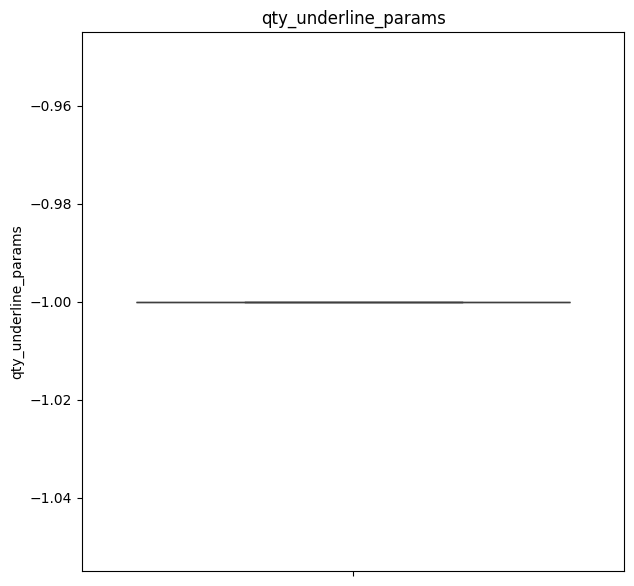

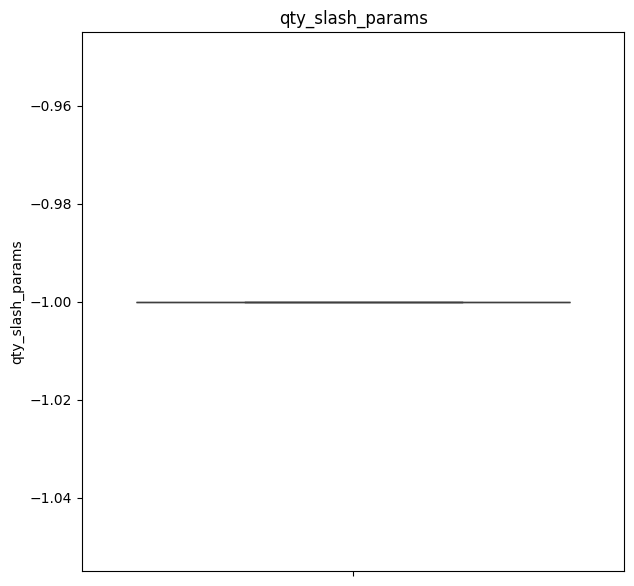

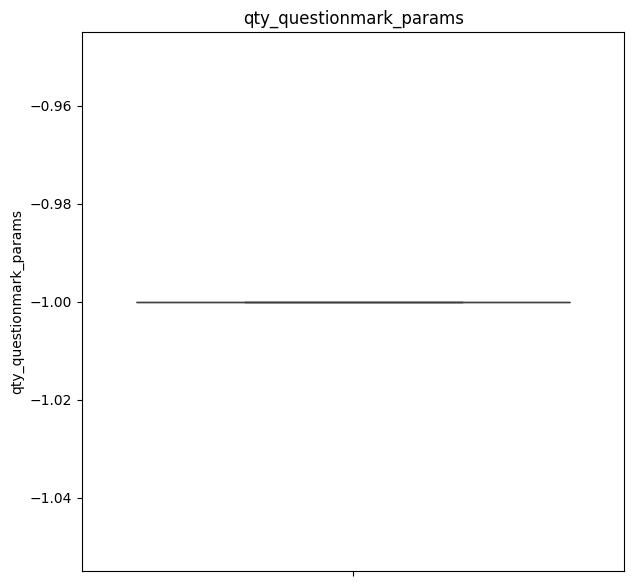

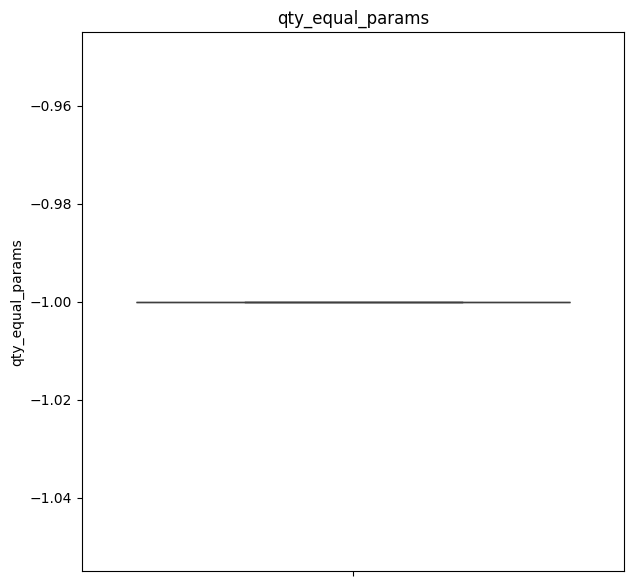

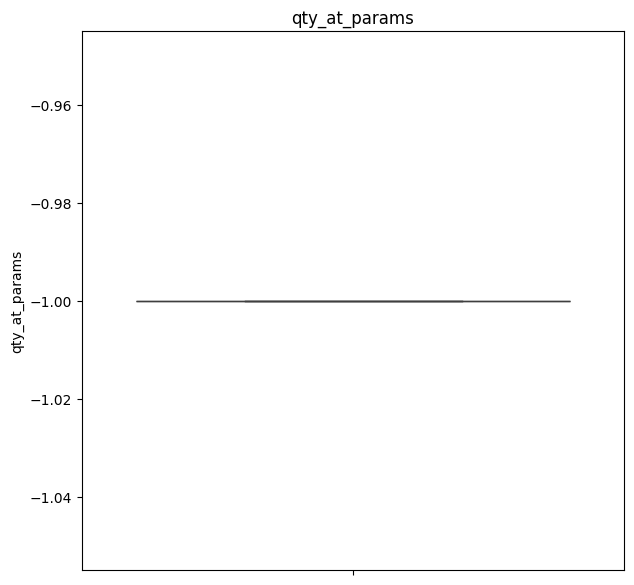

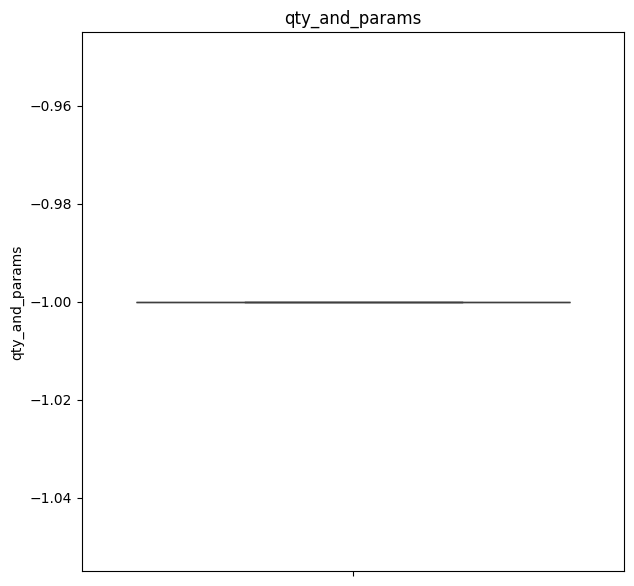

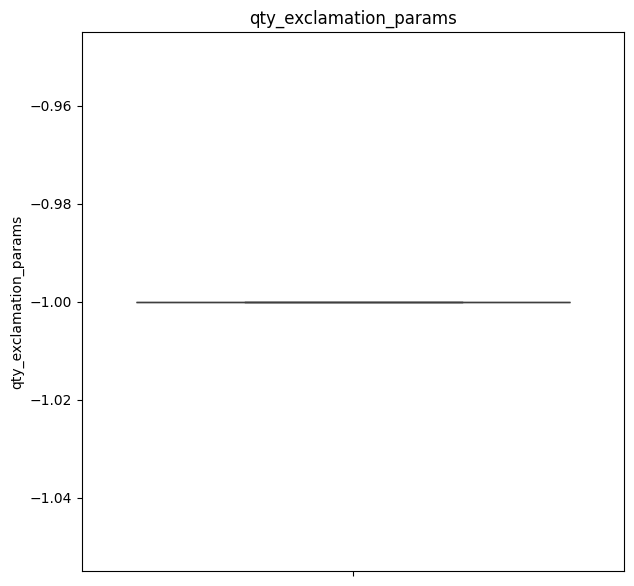

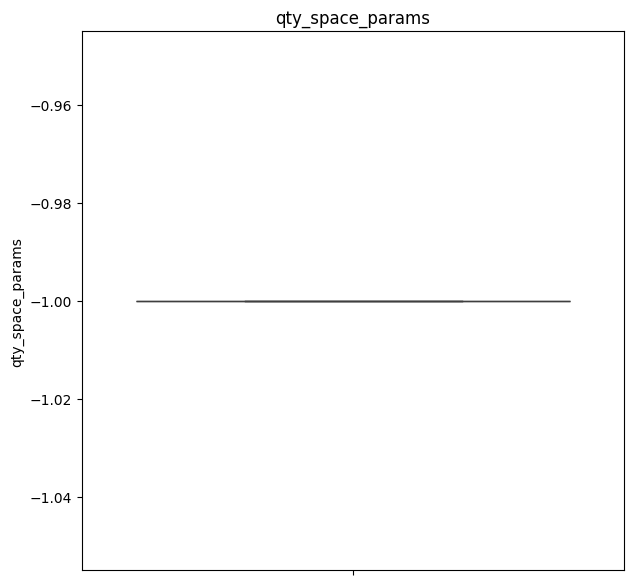

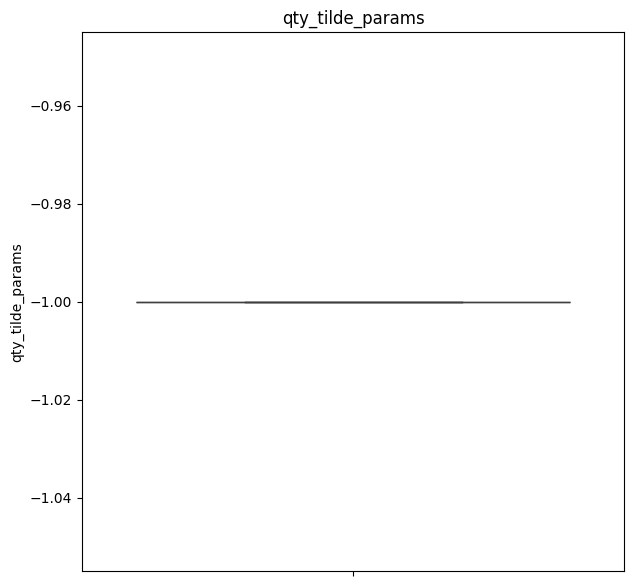

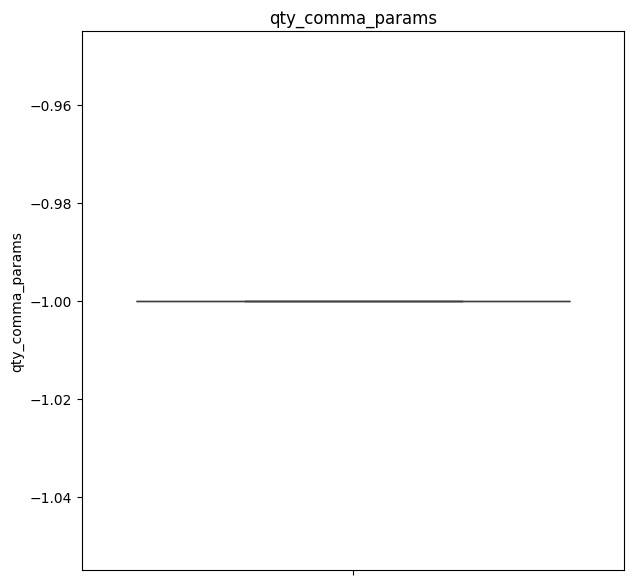

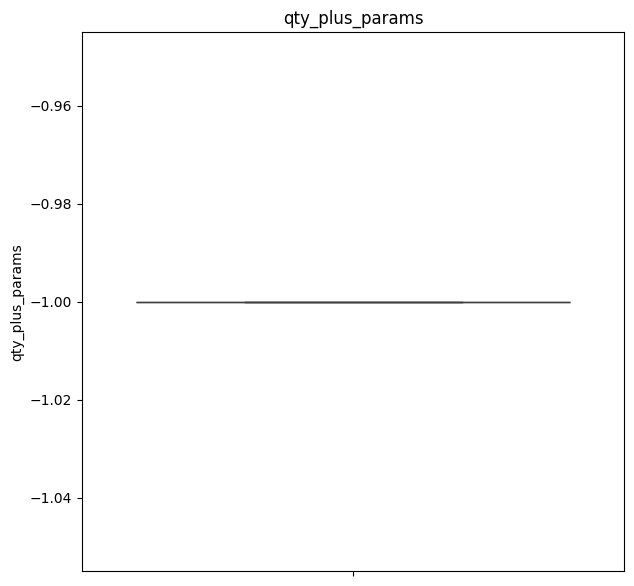

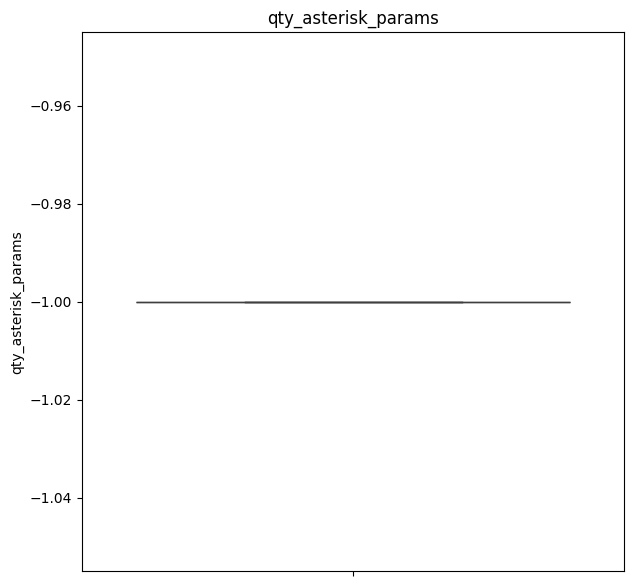

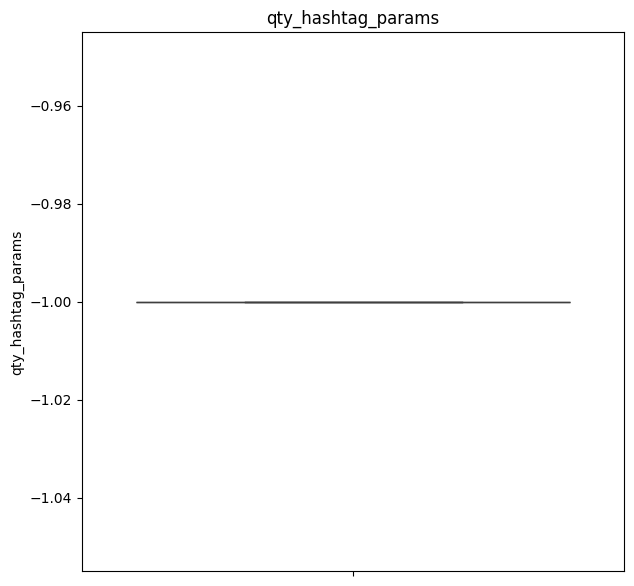

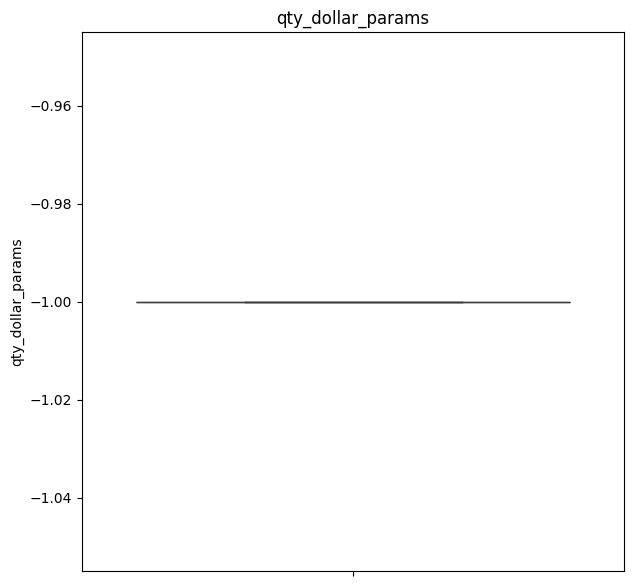

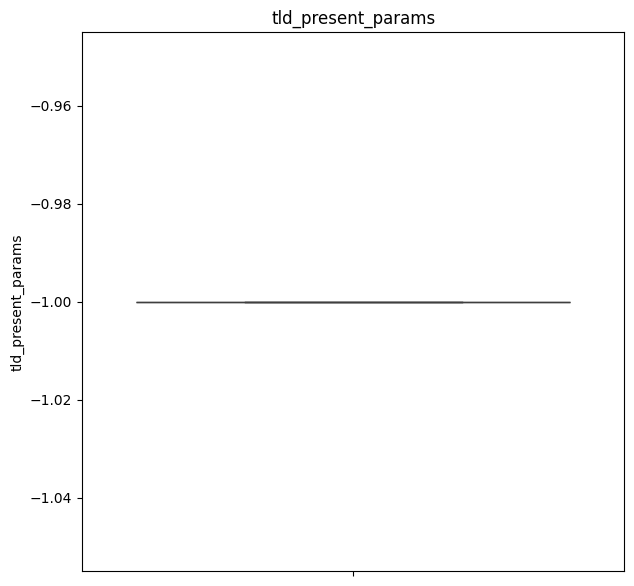

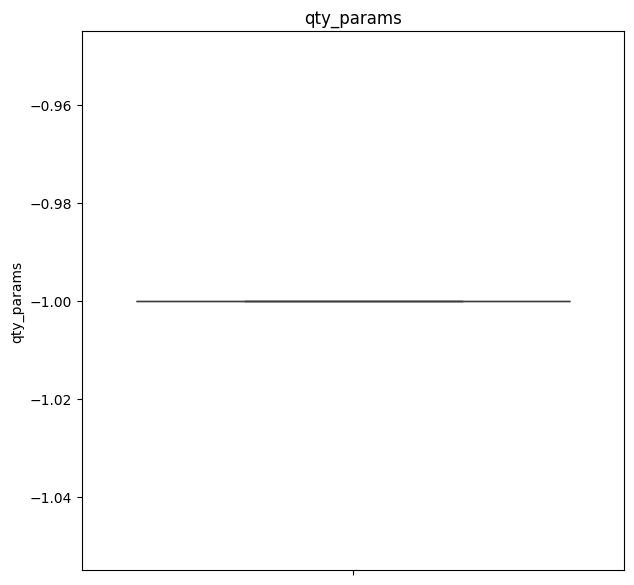

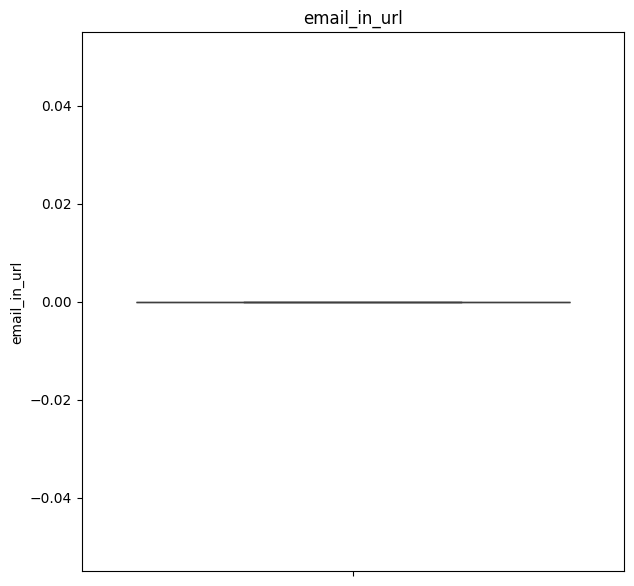

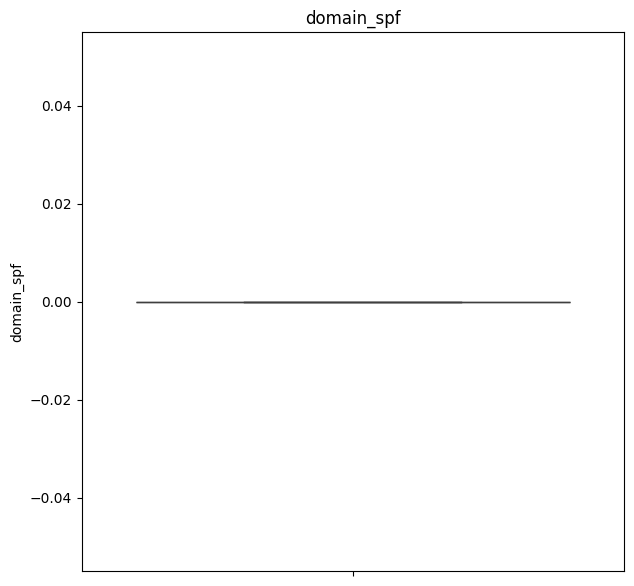

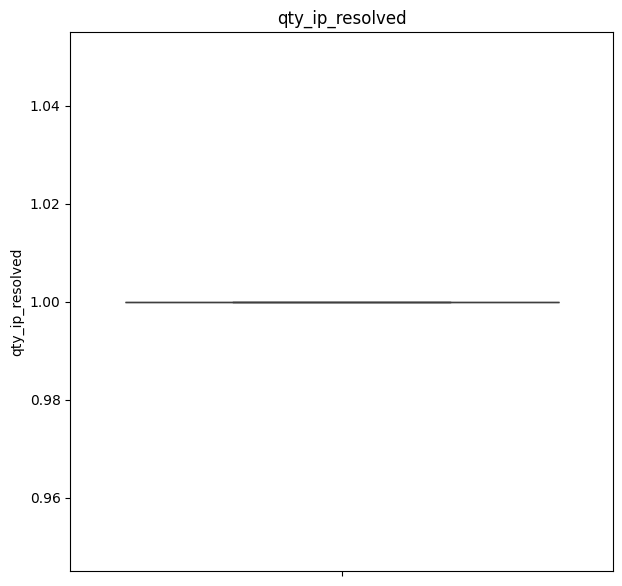

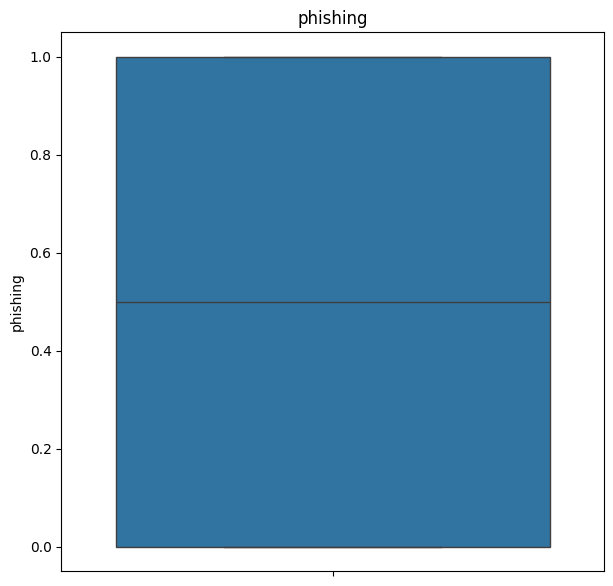

<Figure size 700x700 with 0 Axes>

In [26]:
for feature in discrete_features:
    sns.boxplot(data=train_data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

# Handling outliers: 
# Continuous features using IQR (As the distribution is skewed) in TEST DATA

In [27]:
for feature in continuous_features:
    IQR = test_data[feature].quantile(0.75) - test_data[feature].quantile(0.25)
    lower_bridge = test_data[feature].quantile(0.25) - (1.5 * IQR)
    upper_bridge = test_data[feature].quantile(0.75) + (1.5 *IQR)
    
    test_data.loc[test_data[feature] < lower_bridge, feature] = lower_bridge
    test_data.loc[test_data[feature] >= upper_bridge, feature] = upper_bridge

# Visualization of removed outlier in continuous features in TEST DATA



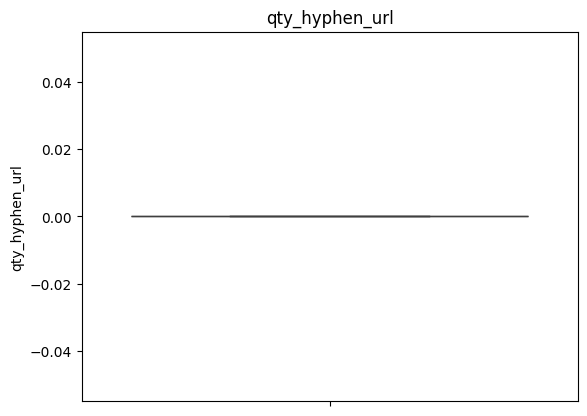

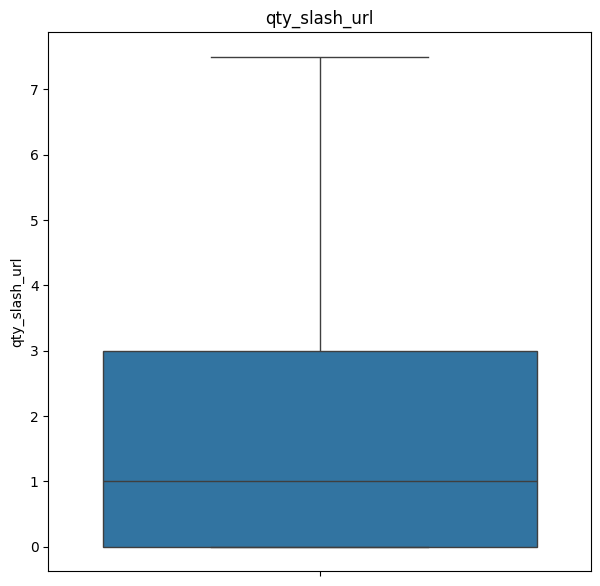

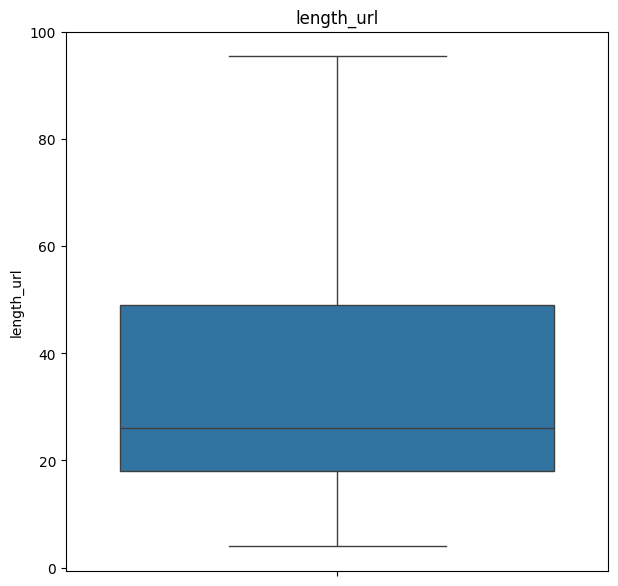

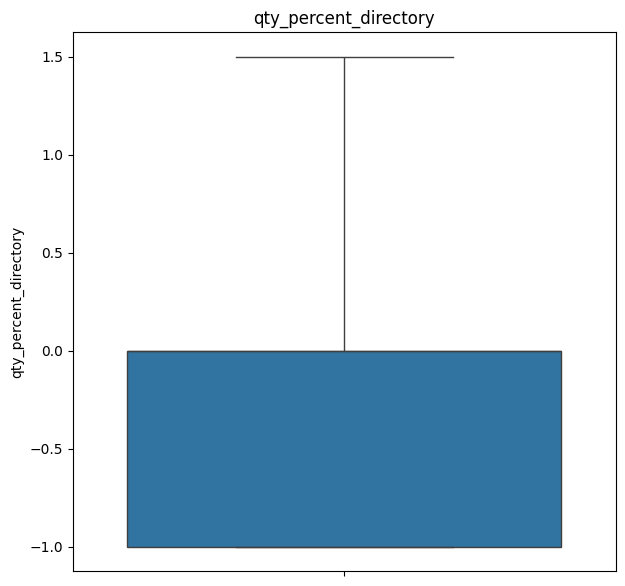

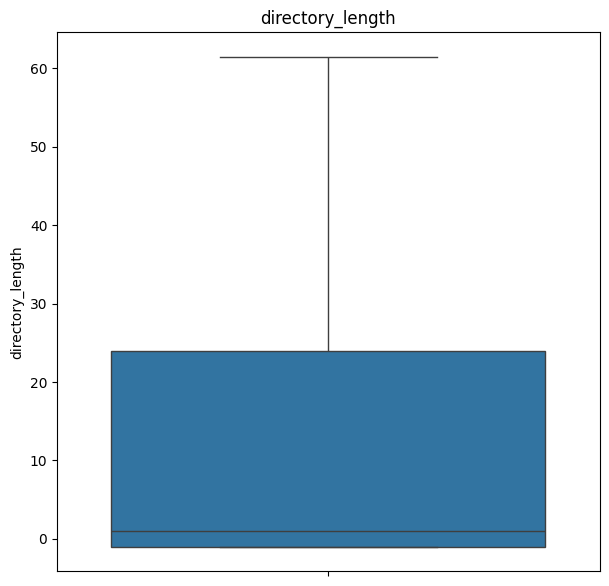

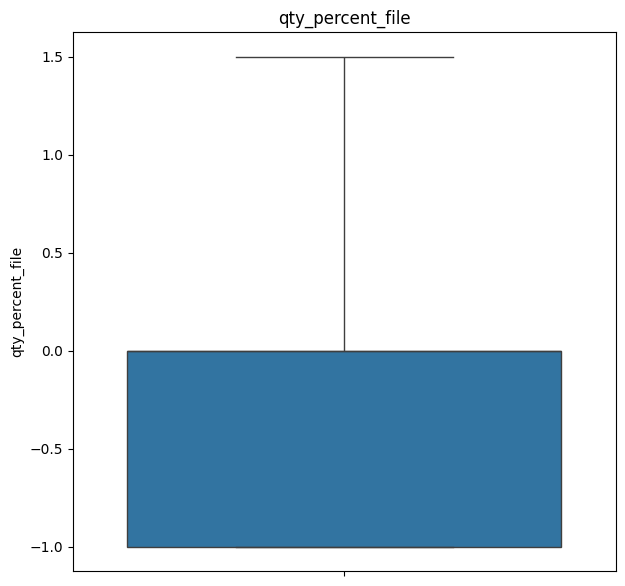

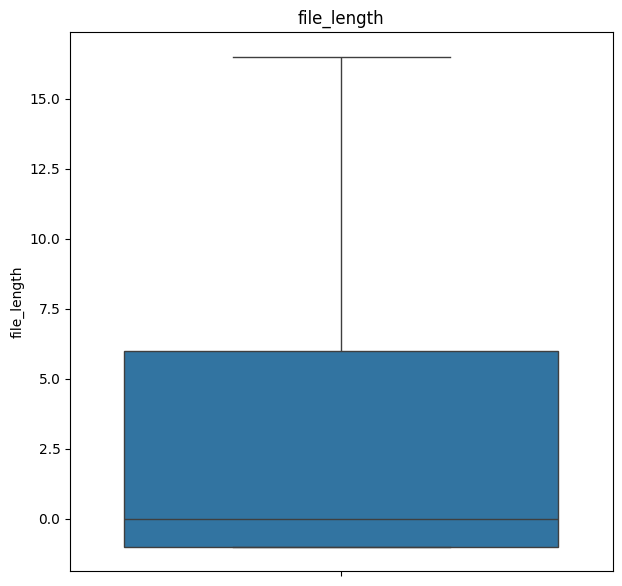

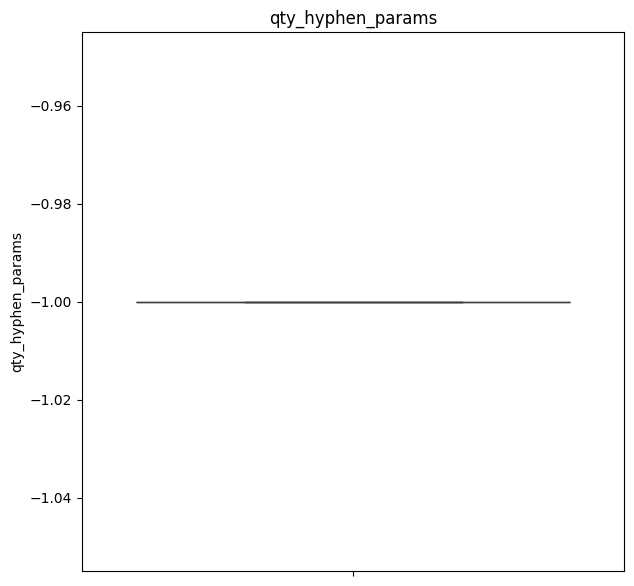

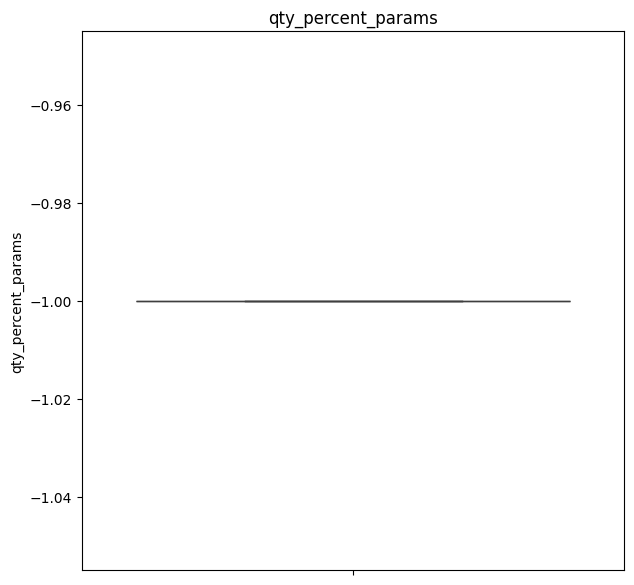

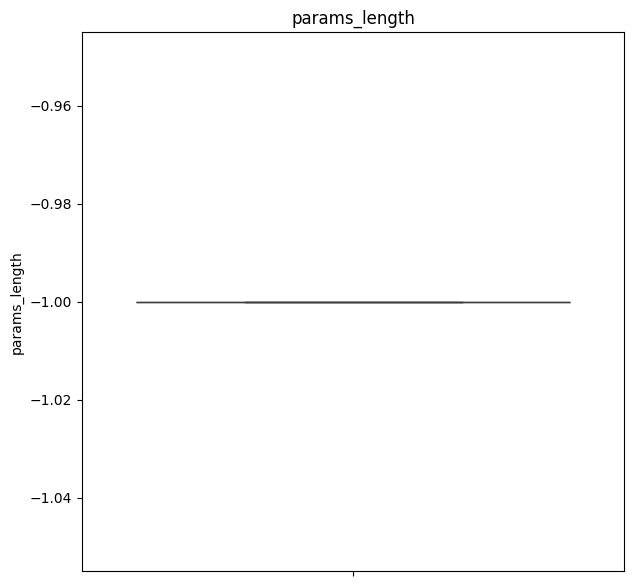

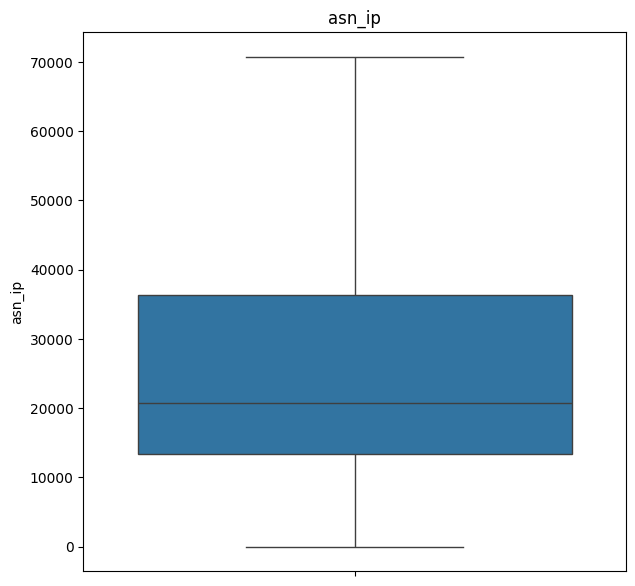

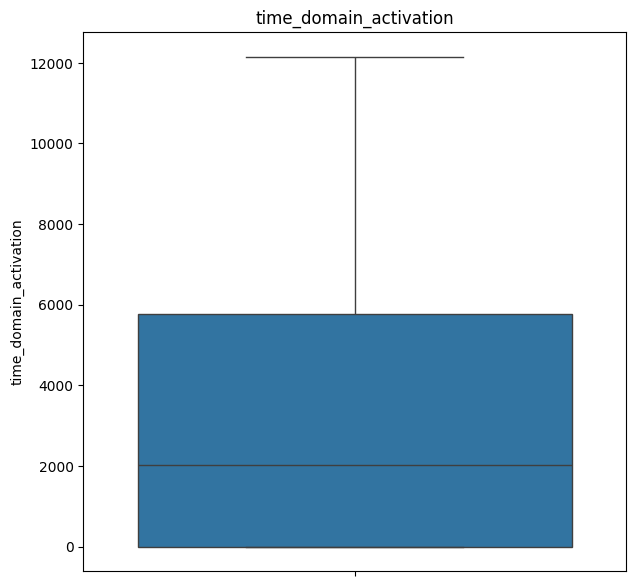

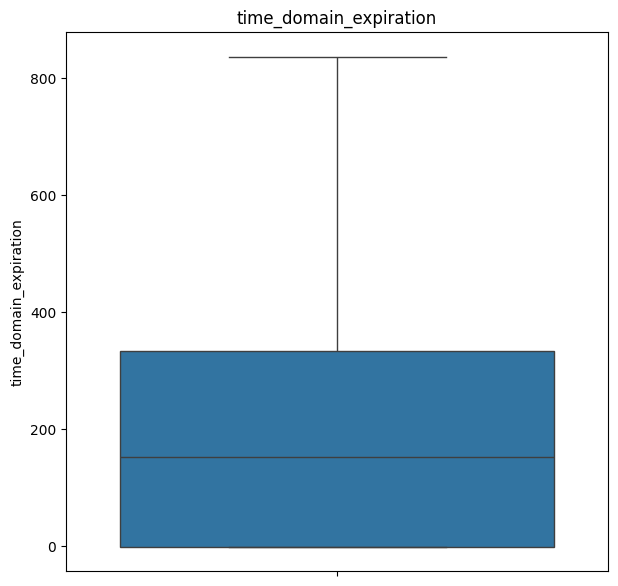

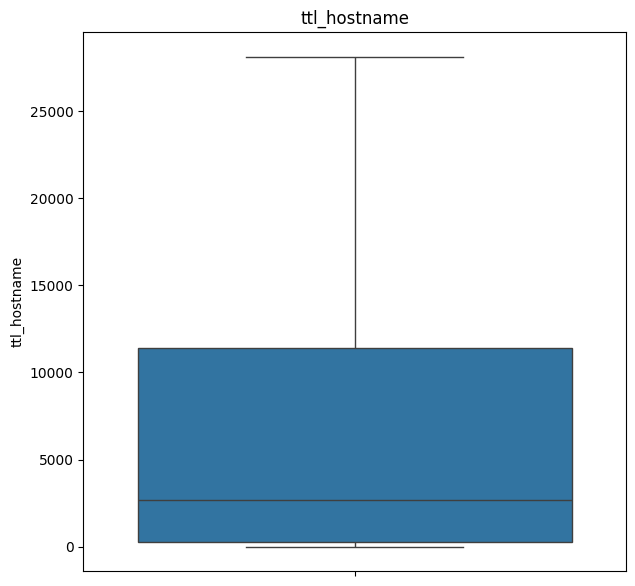

<Figure size 700x700 with 0 Axes>

In [28]:
for feature in continuous_features:
    sns.boxplot(data=test_data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

# Handling outliers: 
# Discrete features using IQR (As the distribution is skewed) in TEST DATA

In [29]:
for feature in discrete_features:
    IQR = test_data[feature].quantile(0.75) - test_data[feature].quantile(0.25)
    lower_bridge = test_data[feature].quantile(0.25) - (1.5 * IQR)
    upper_bridge = test_data[feature].quantile(0.75) + (1.5 * IQR)
    
    test_data.loc[test_data[feature] < lower_bridge, feature] = lower_bridge
    test_data.loc[test_data[feature] >= upper_bridge, feature] = upper_bridge

# Visualization of removed outlier in discrete features in TEST DATA


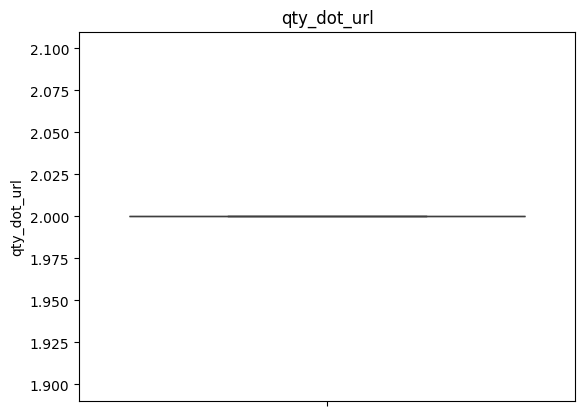

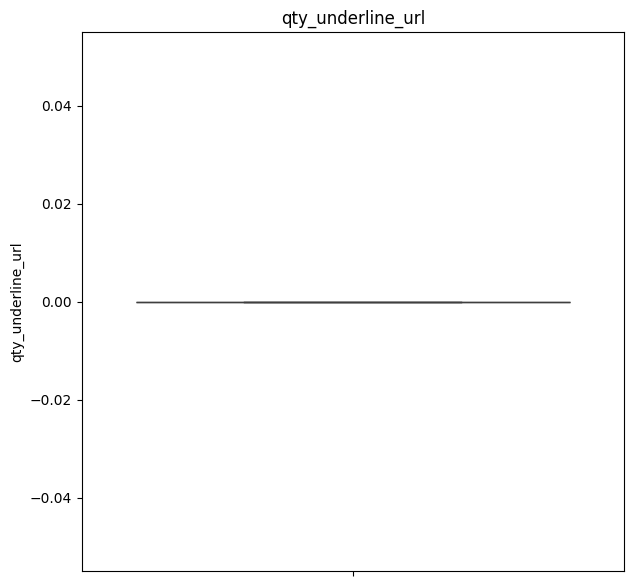

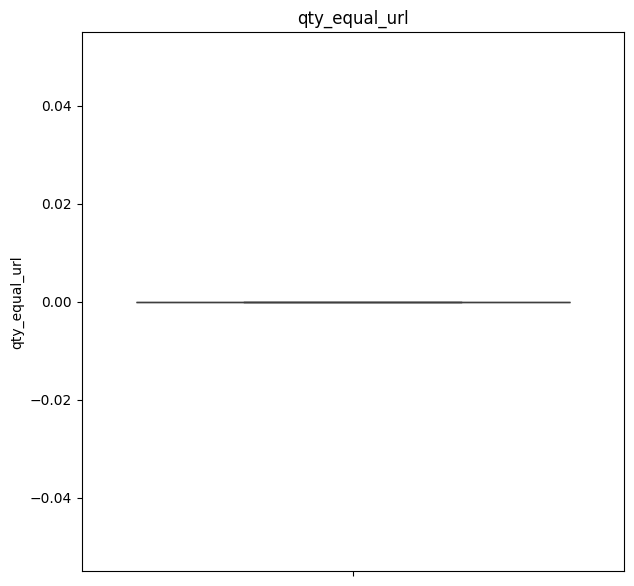

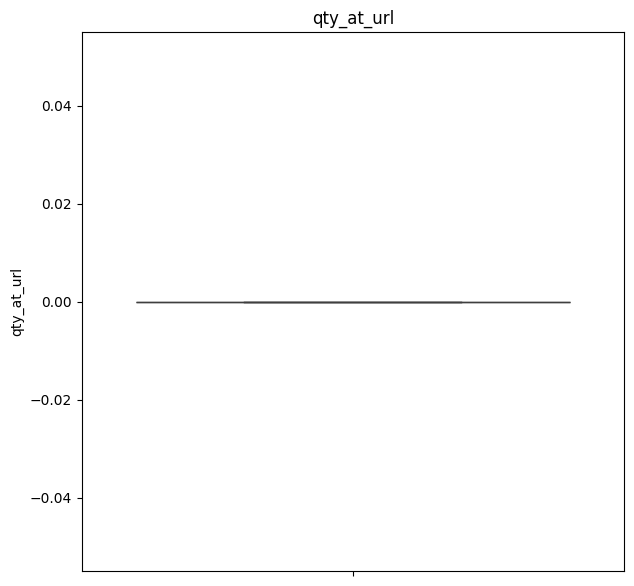

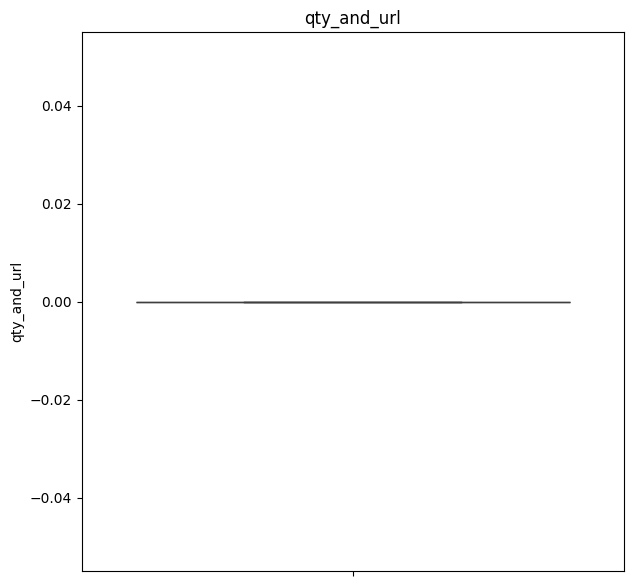

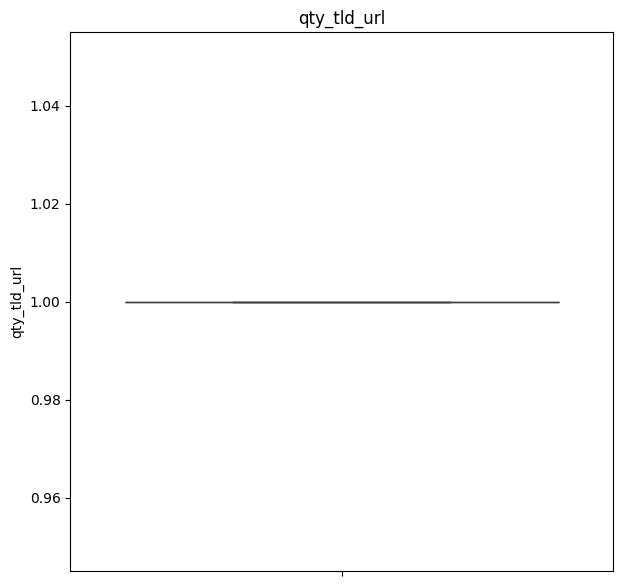

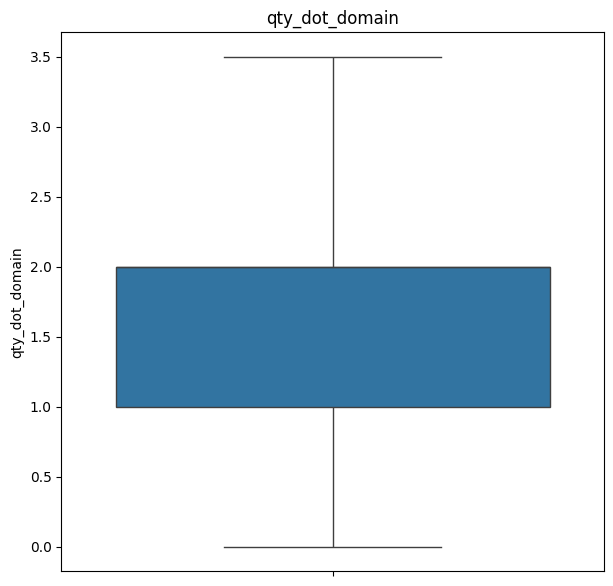

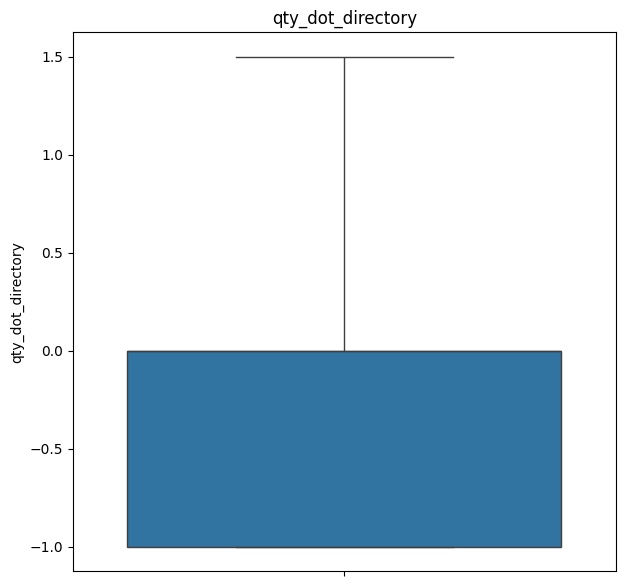

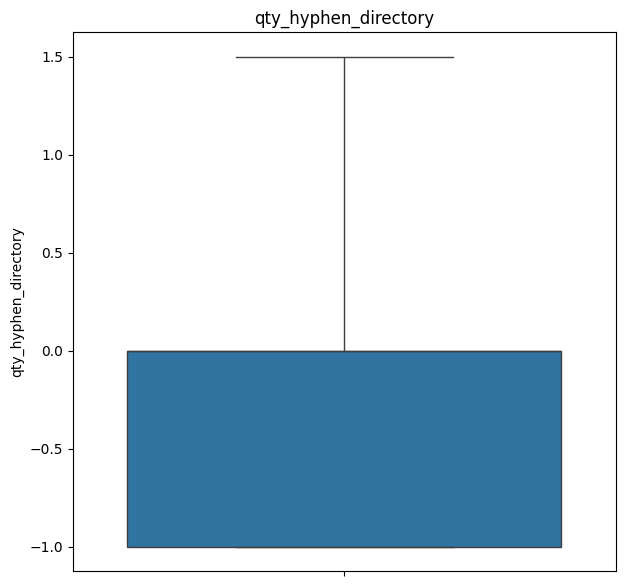

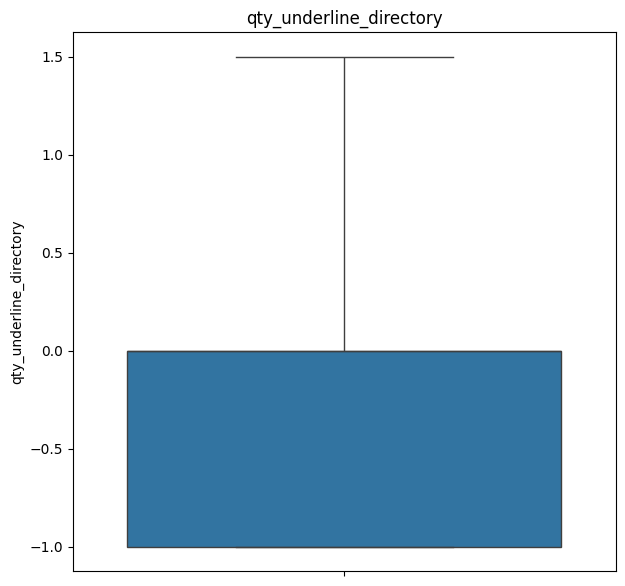

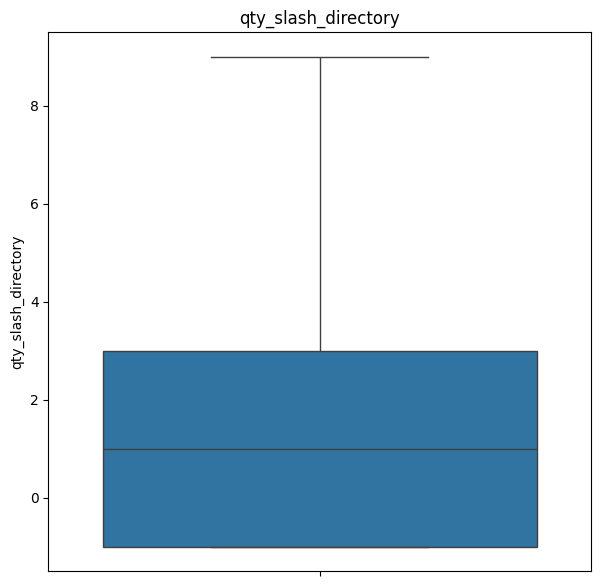

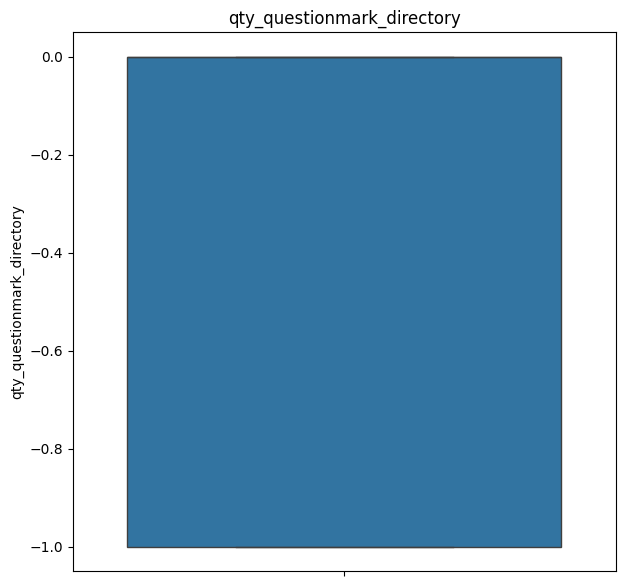

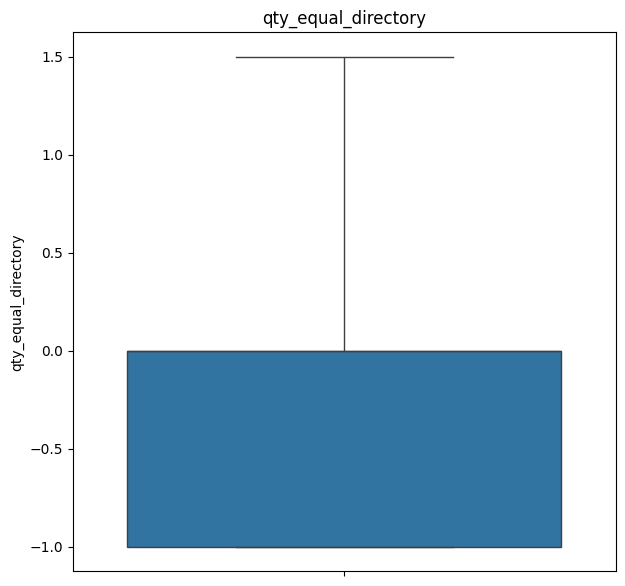

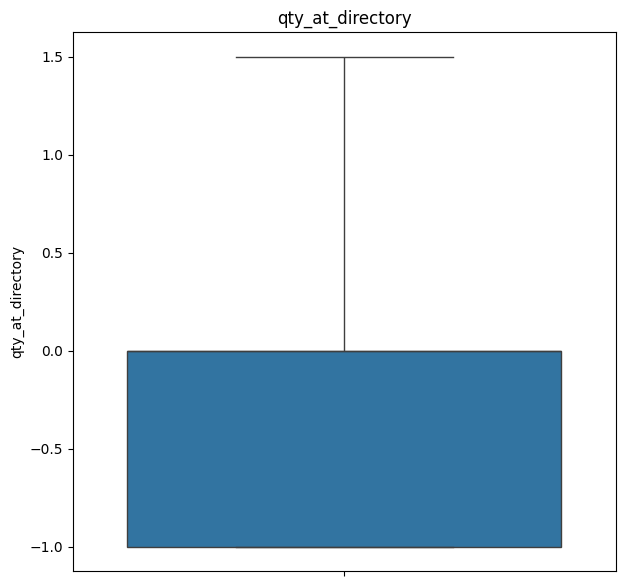

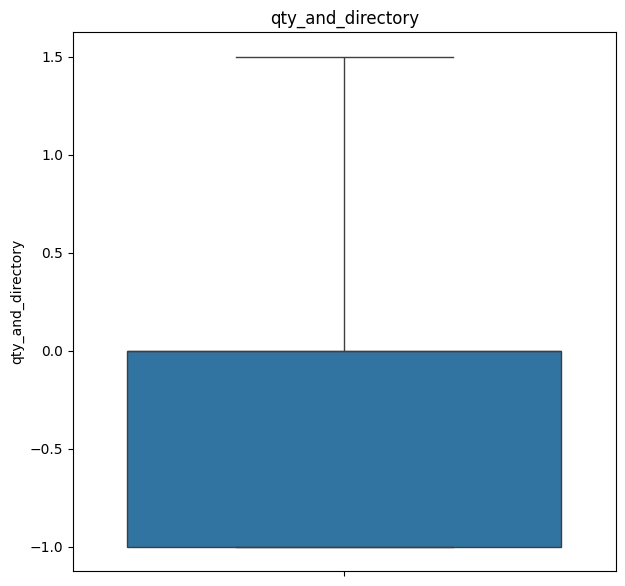

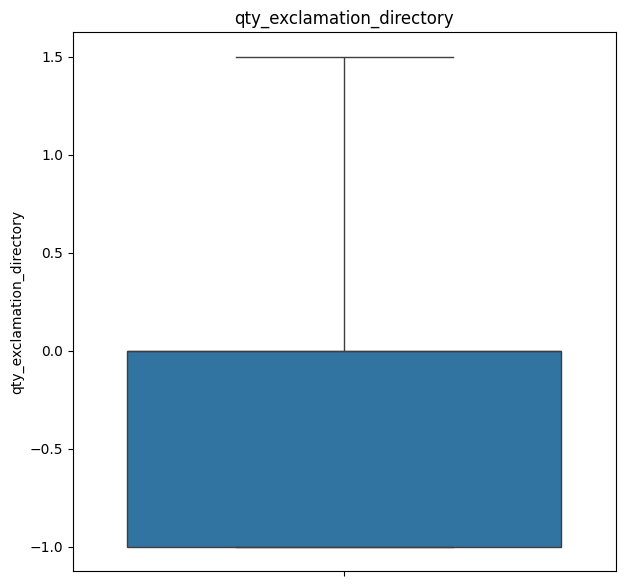

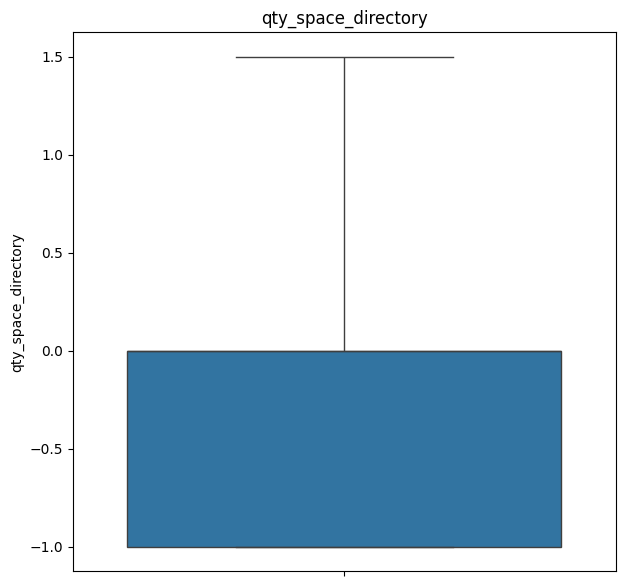

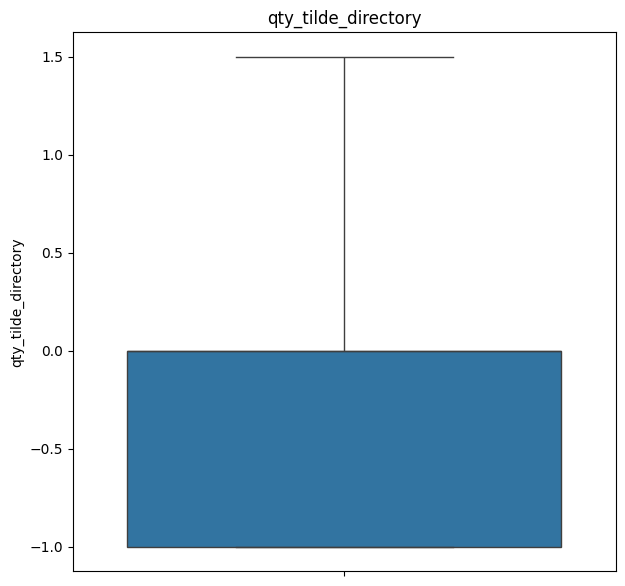

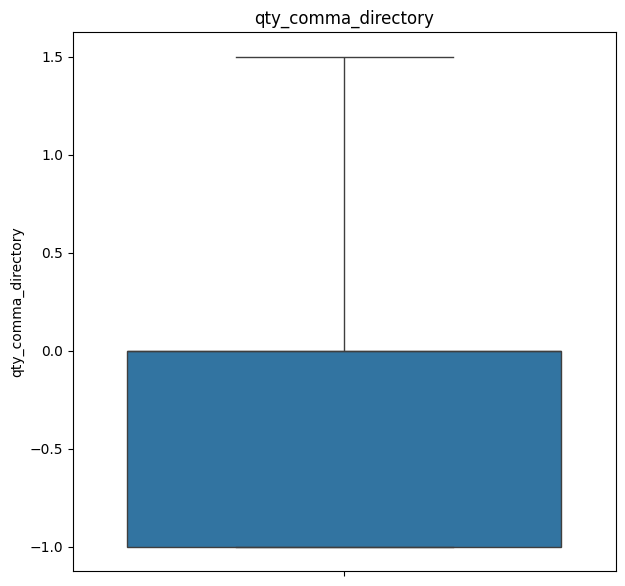

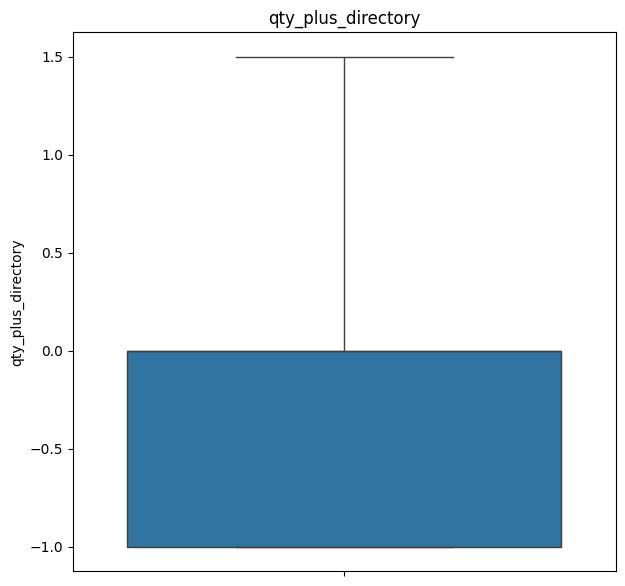

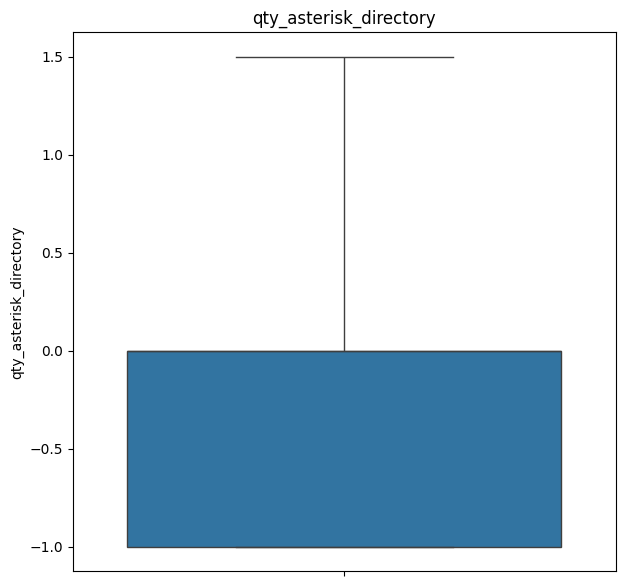

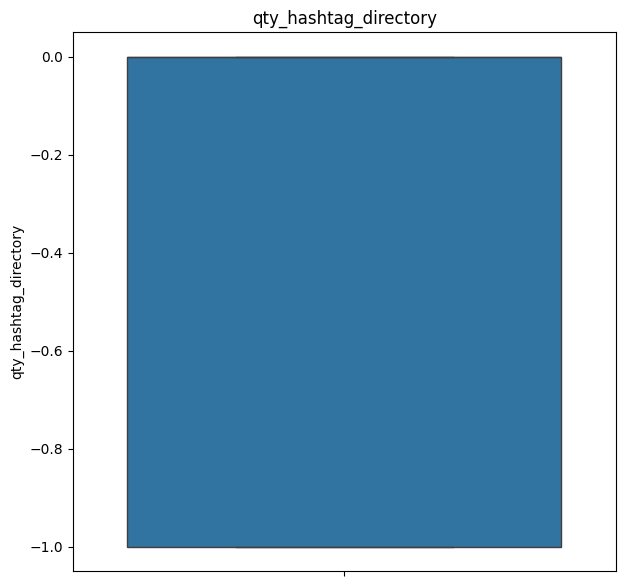

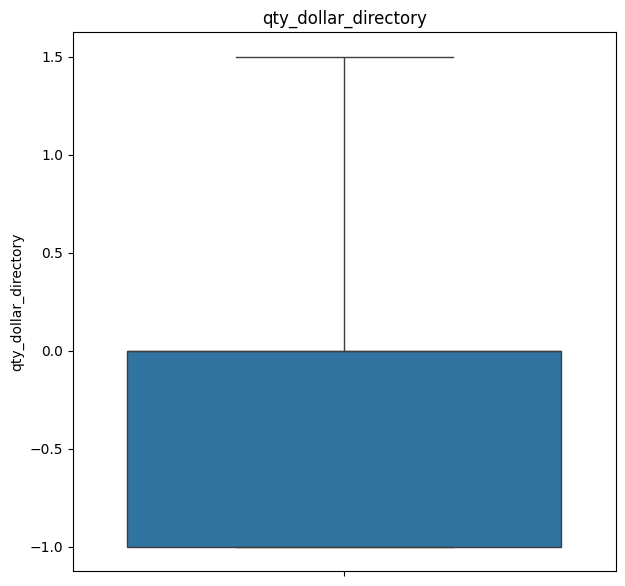

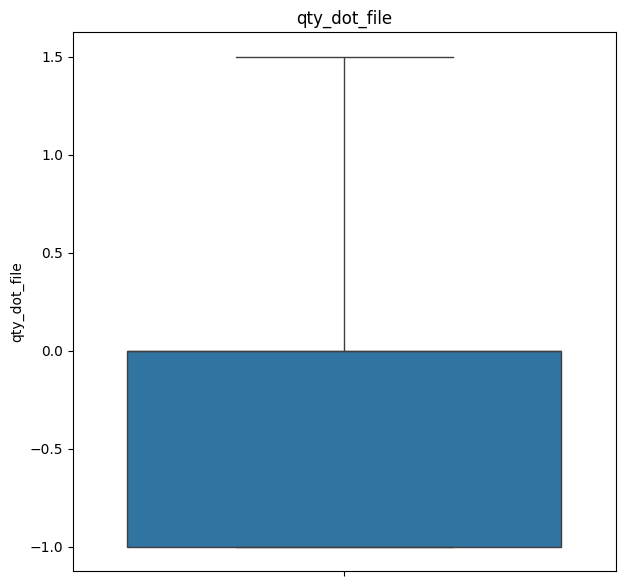

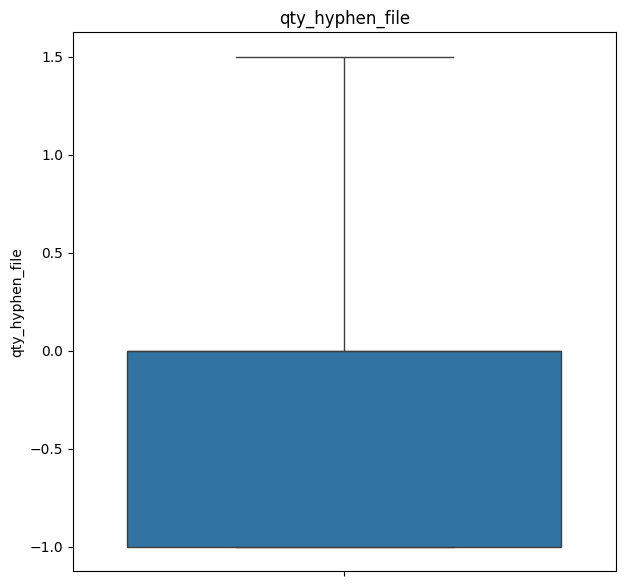

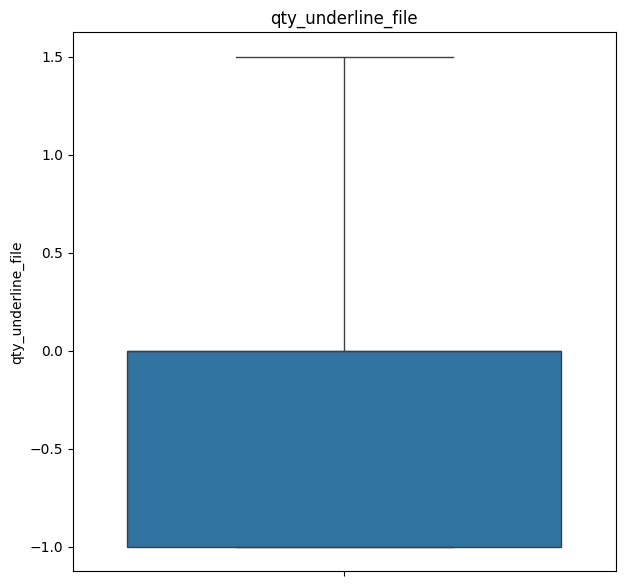

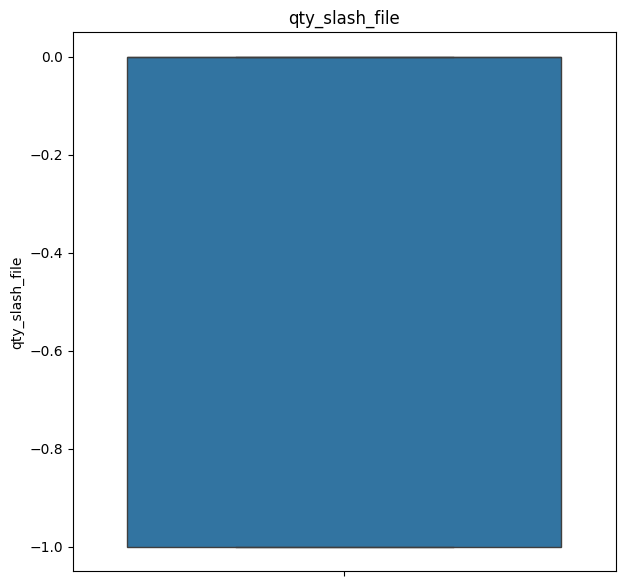

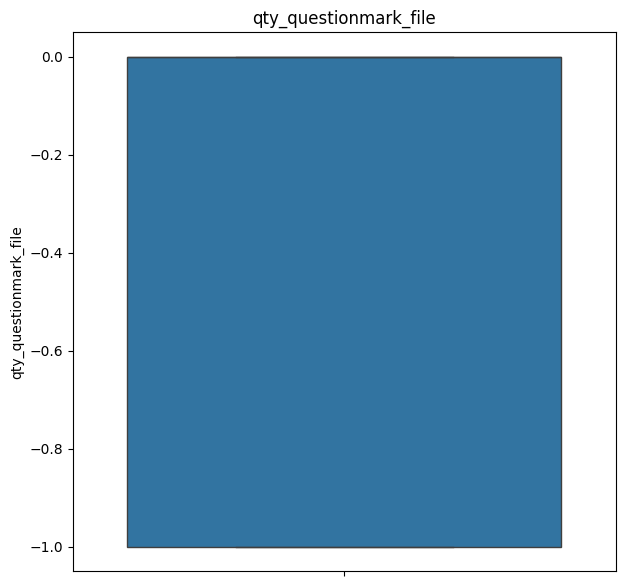

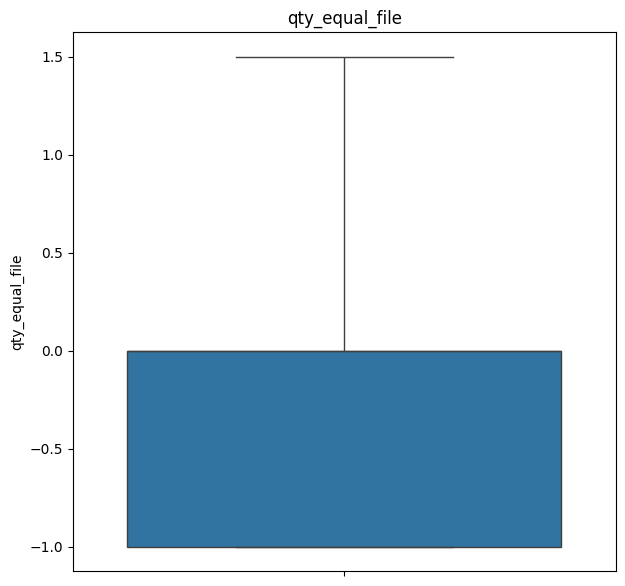

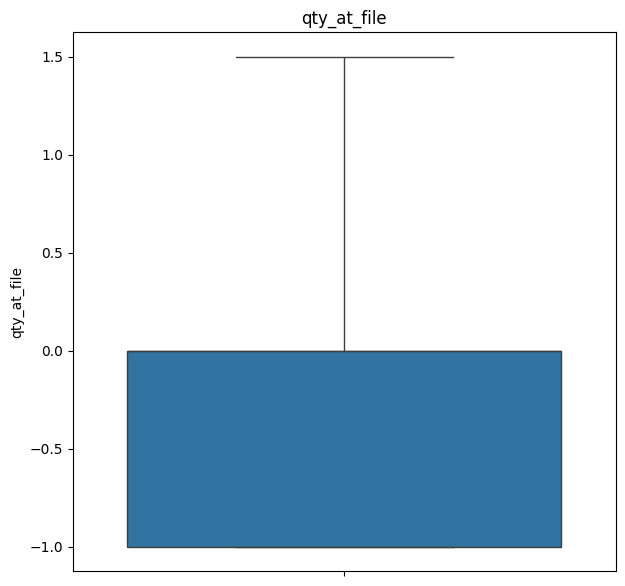

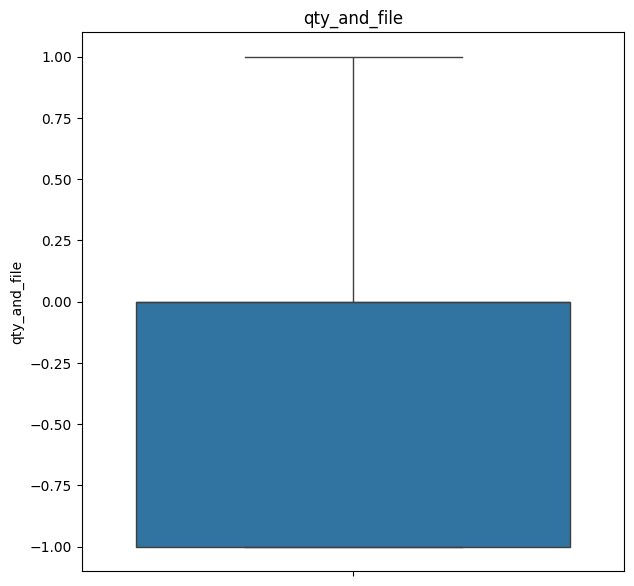

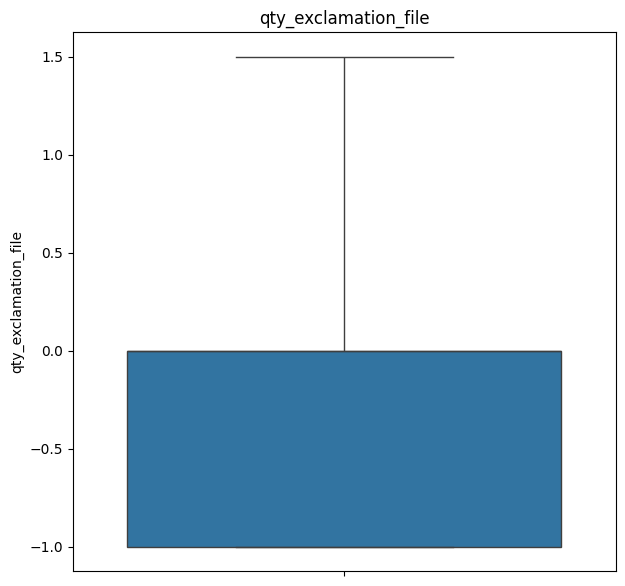

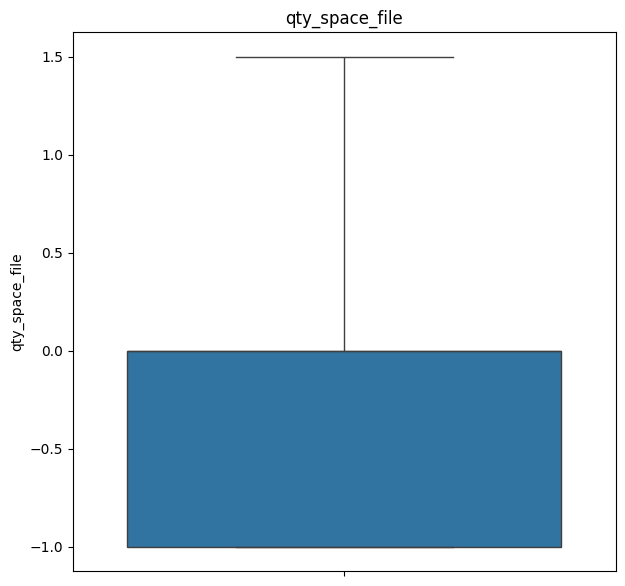

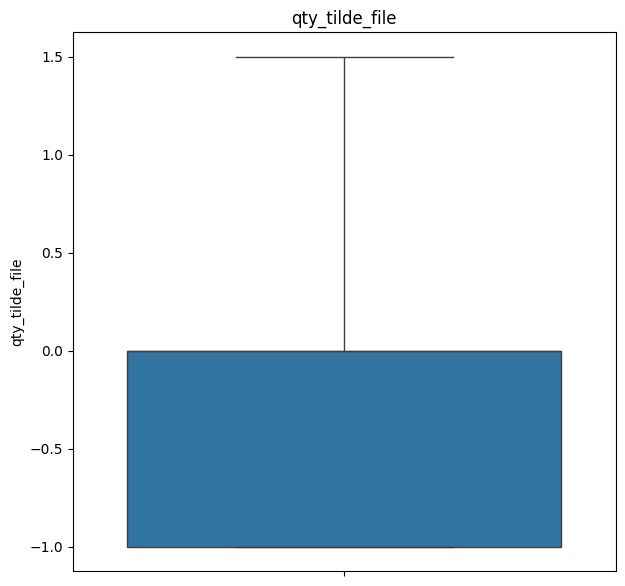

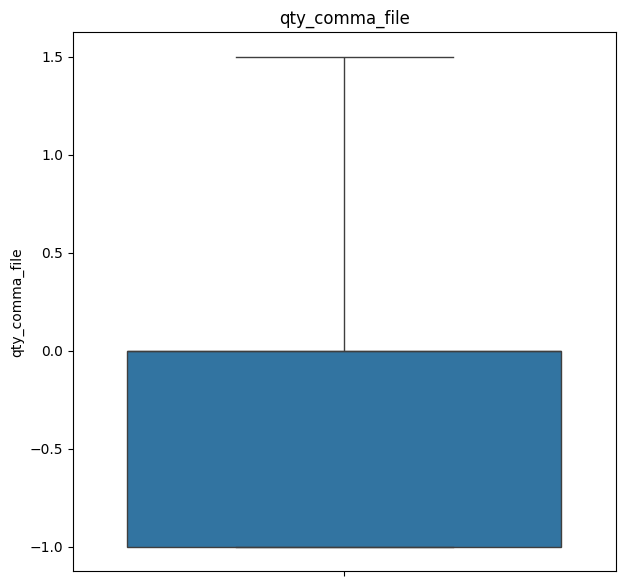

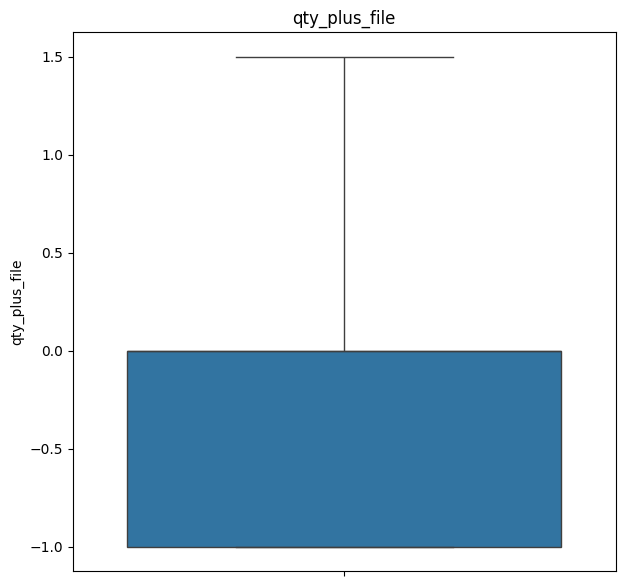

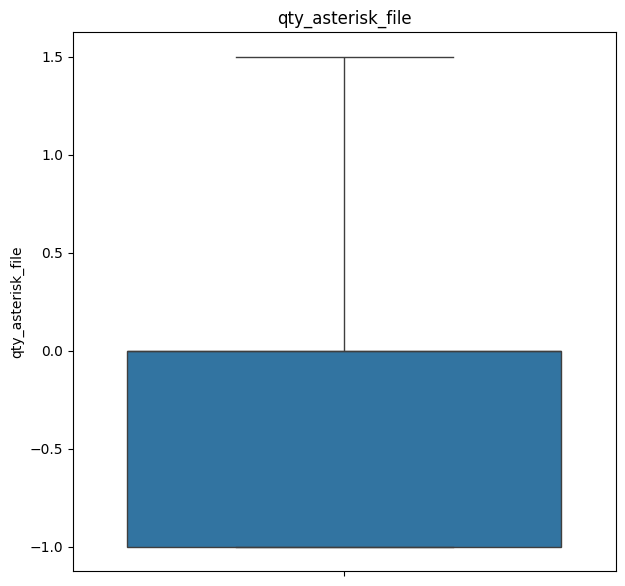

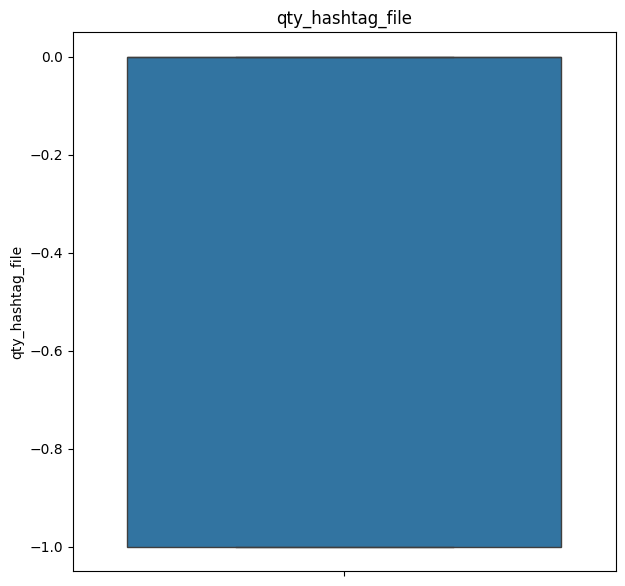

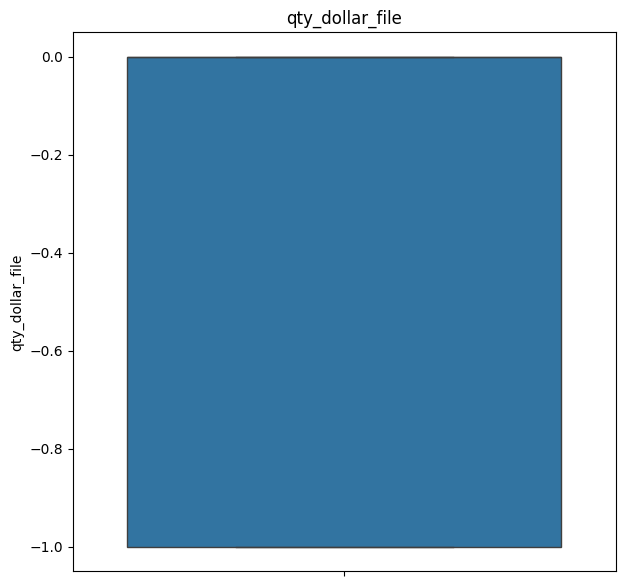

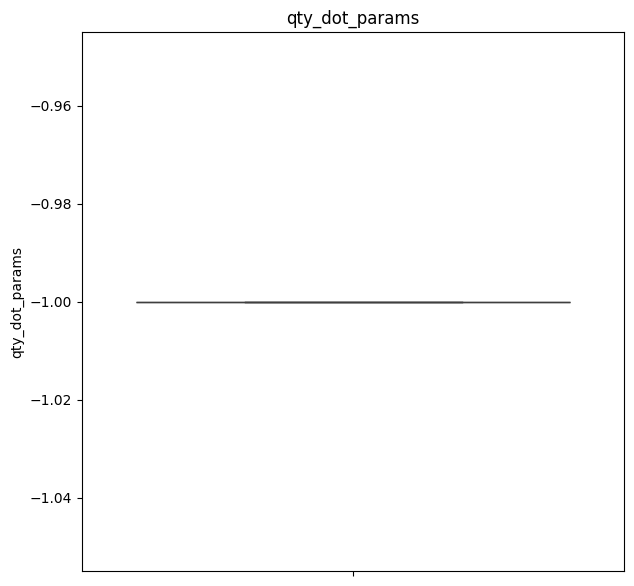

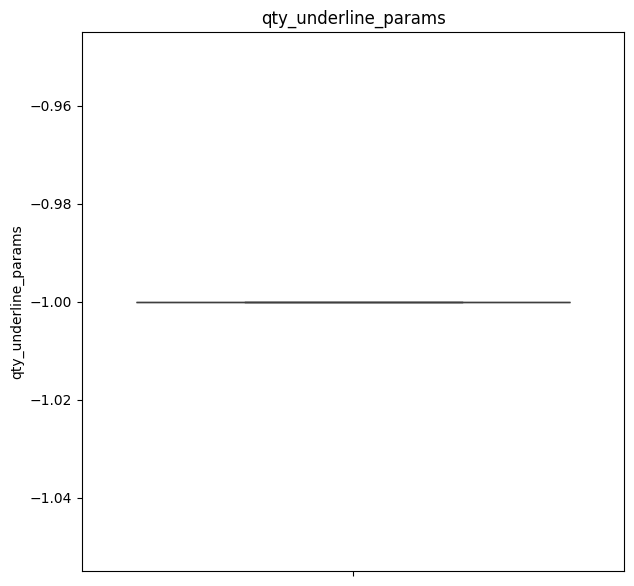

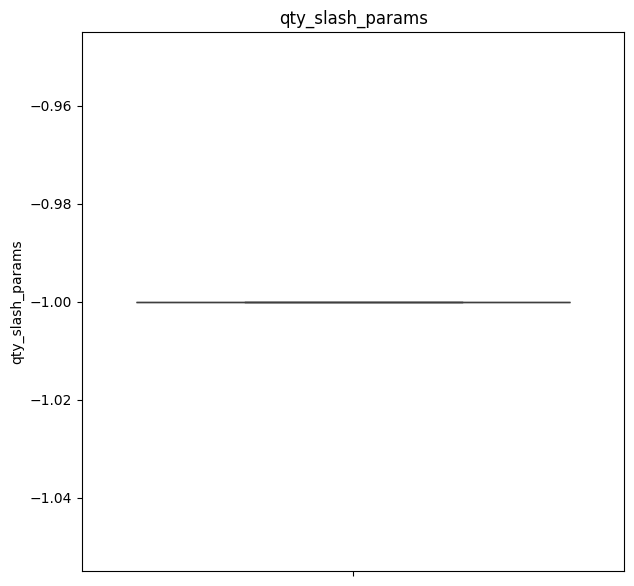

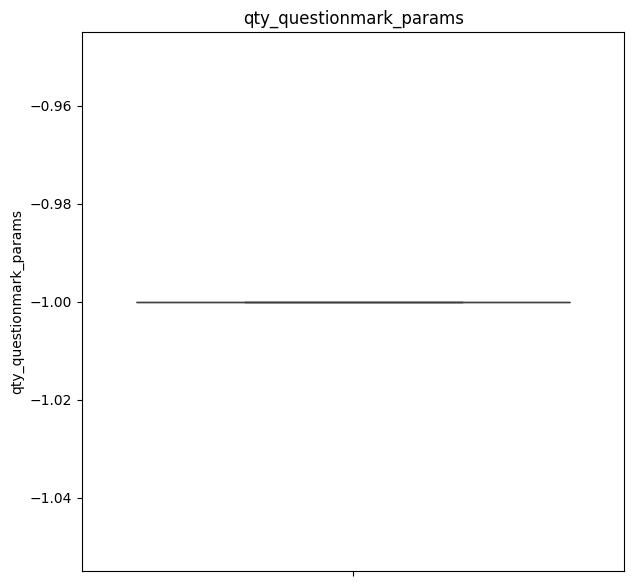

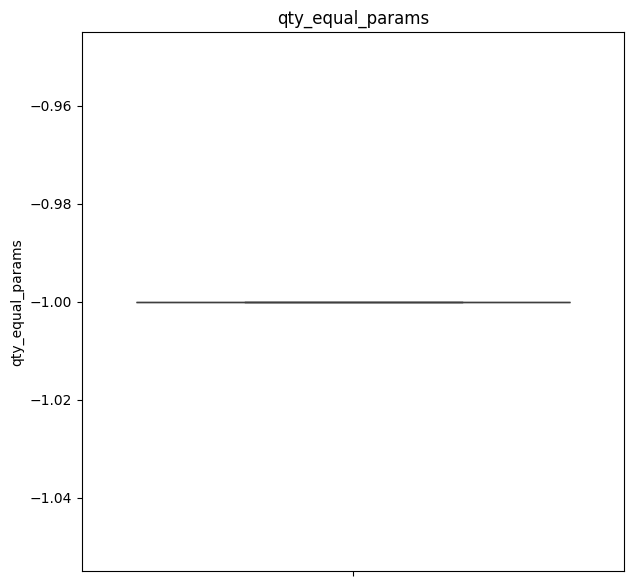

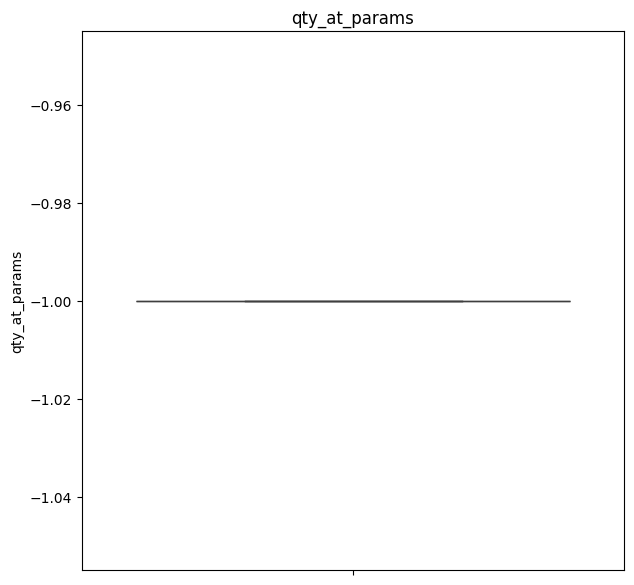

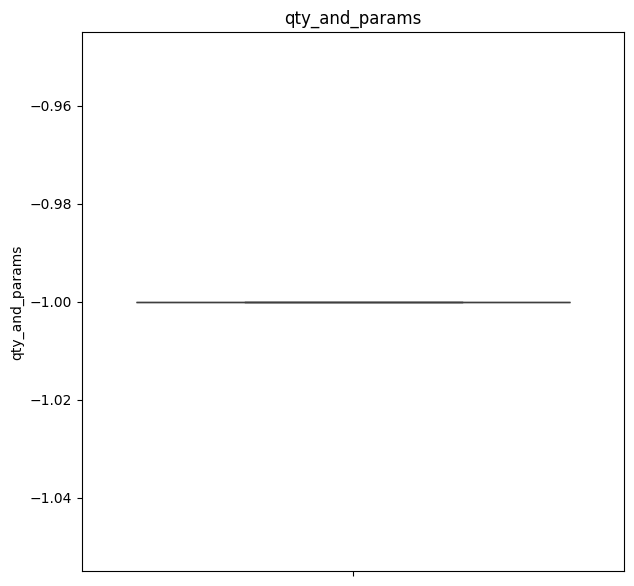

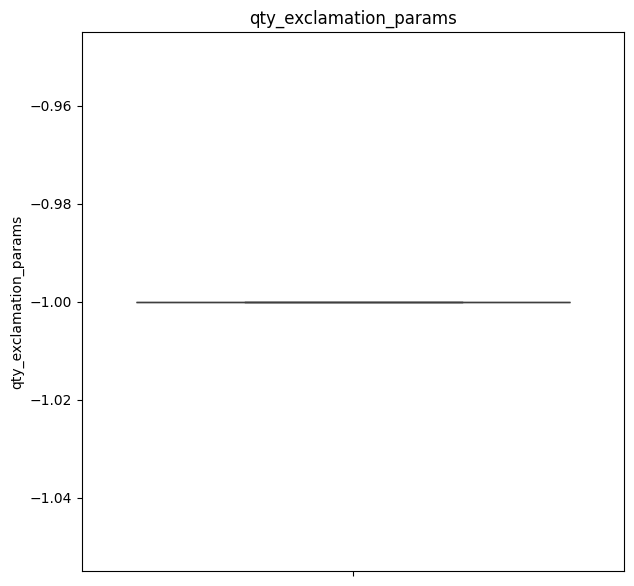

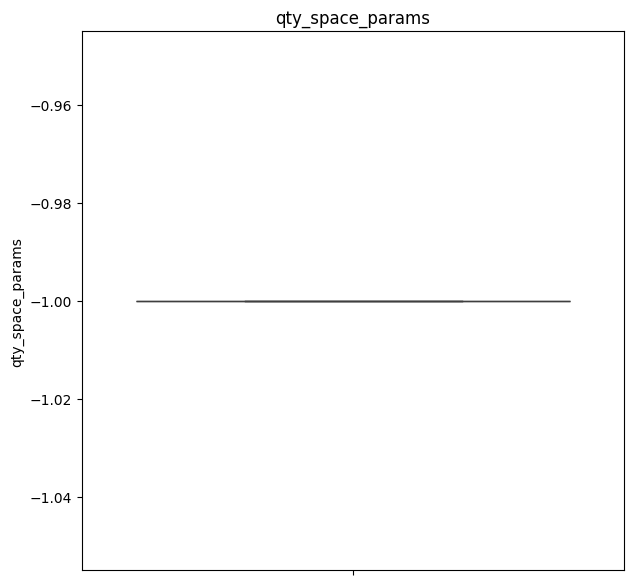

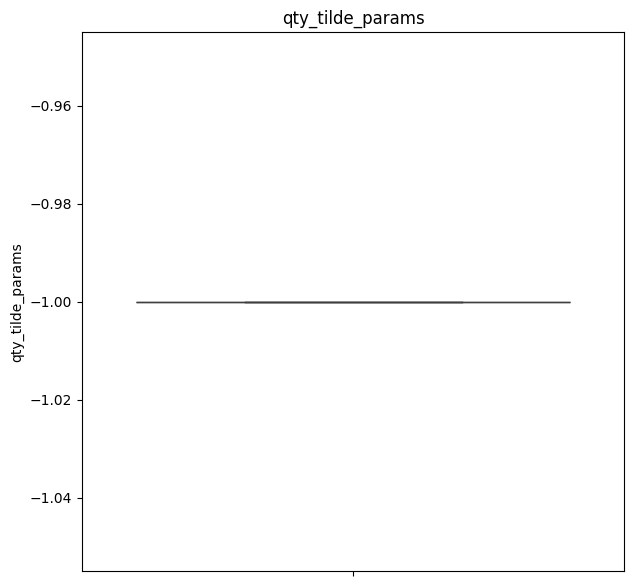

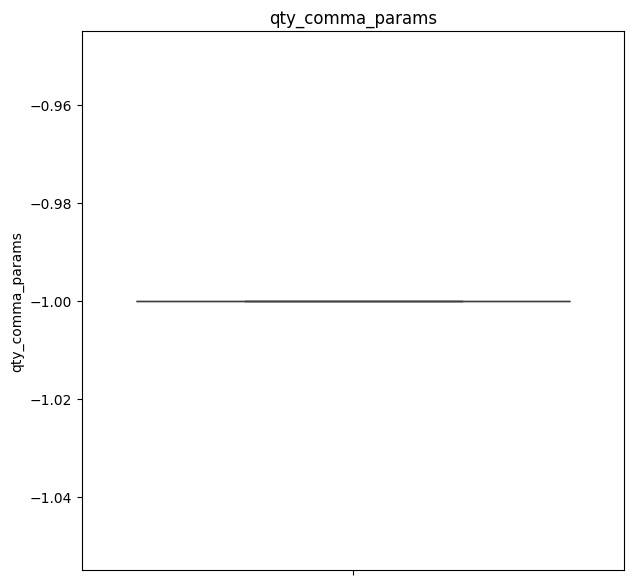

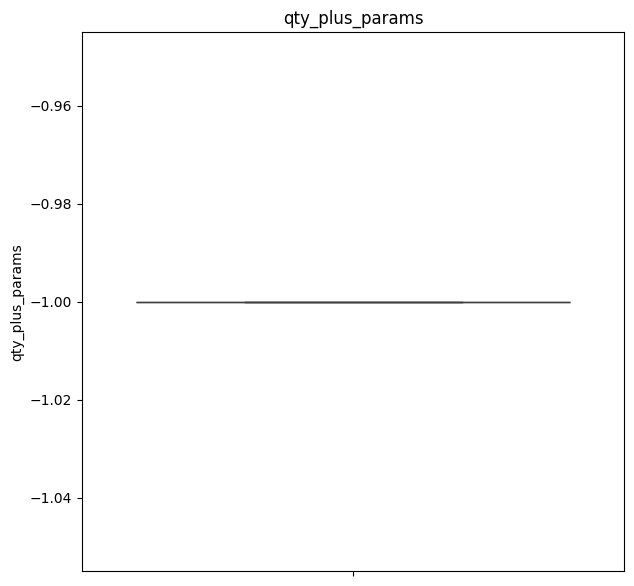

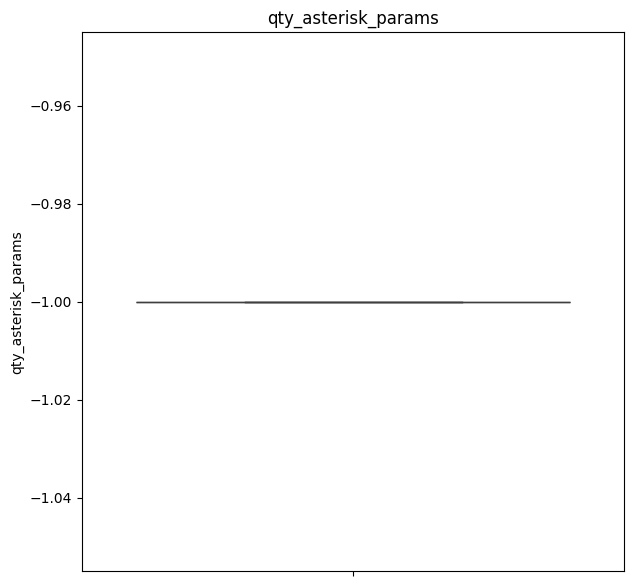

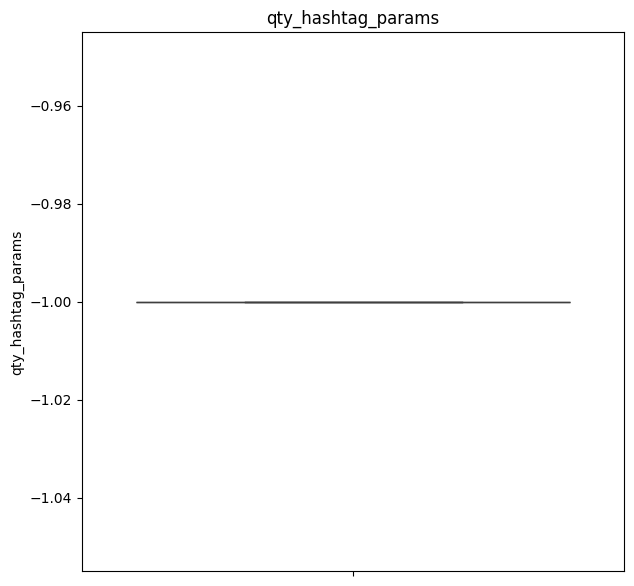

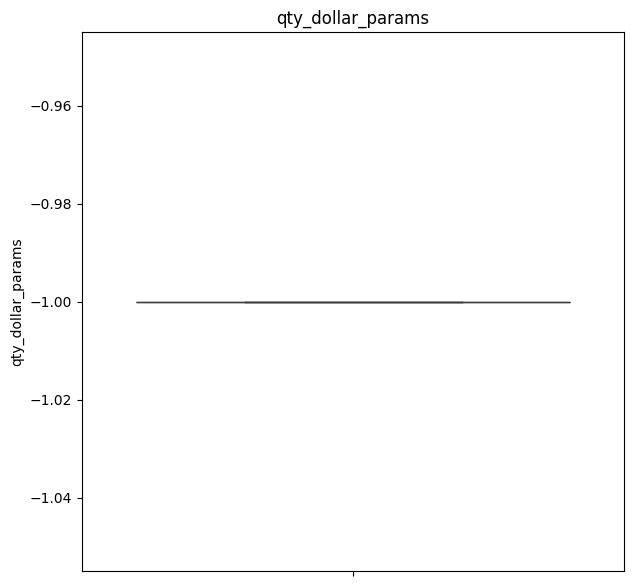

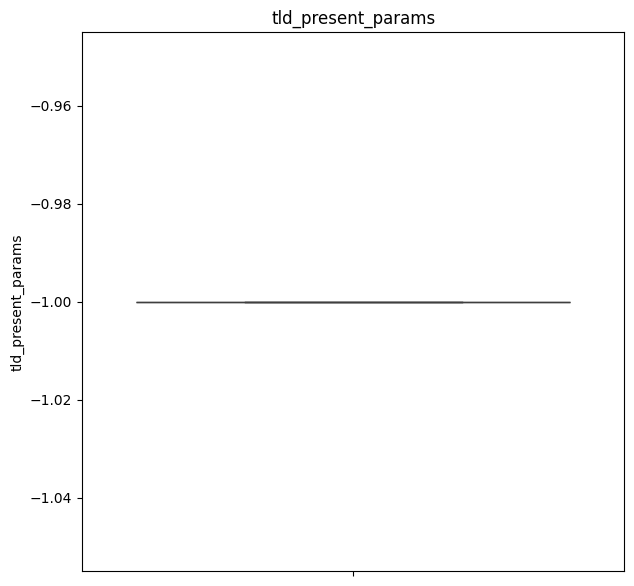

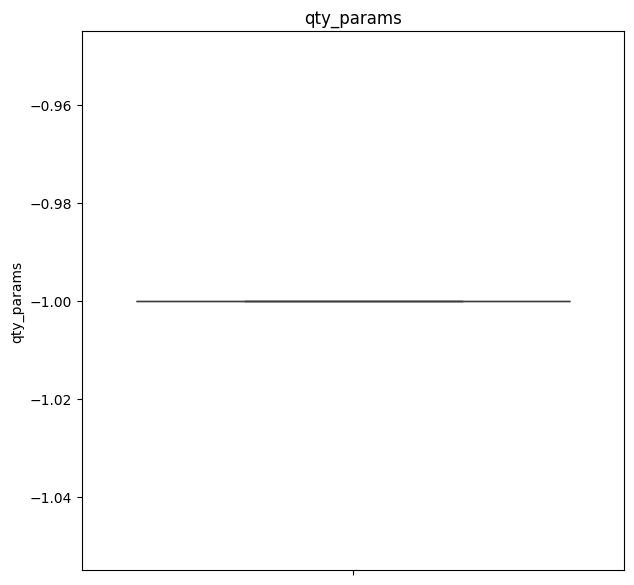

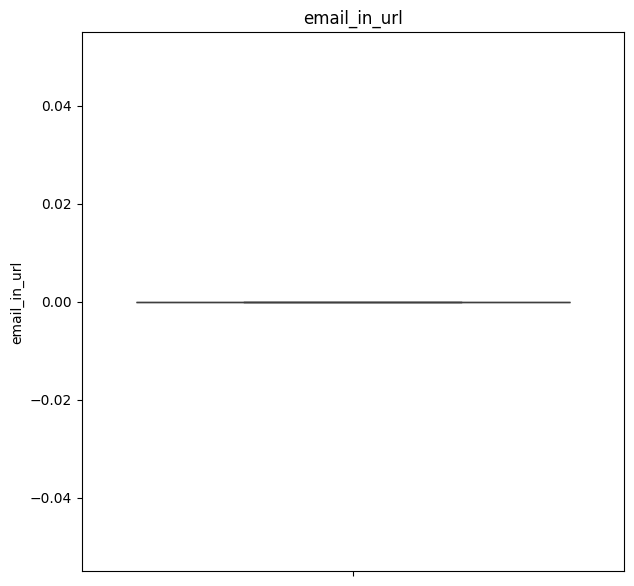

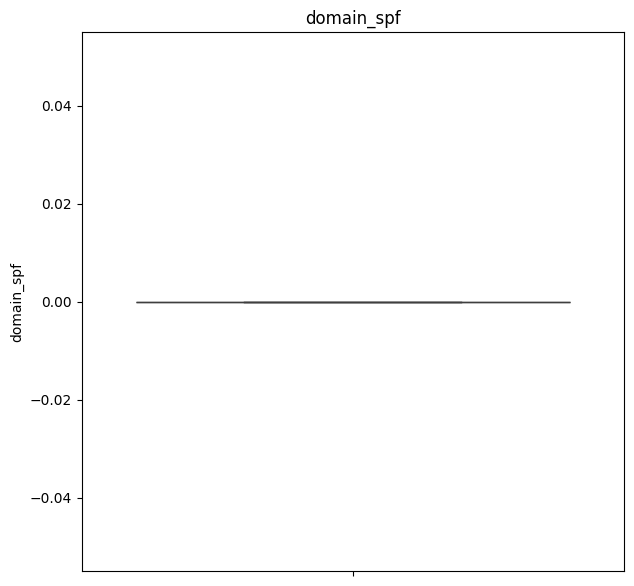

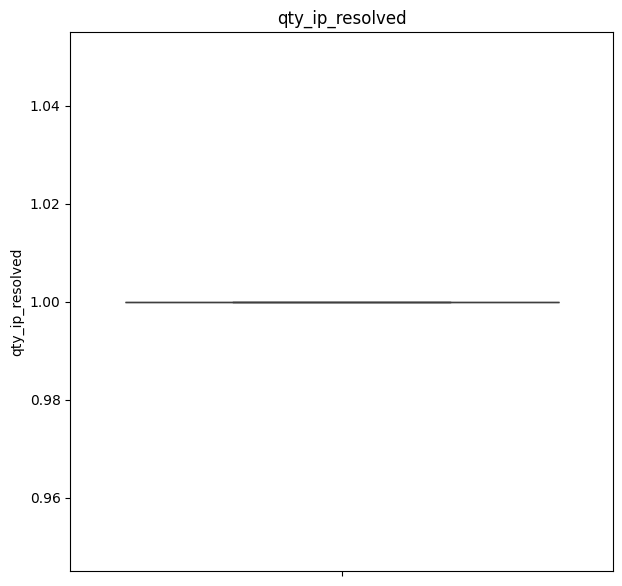

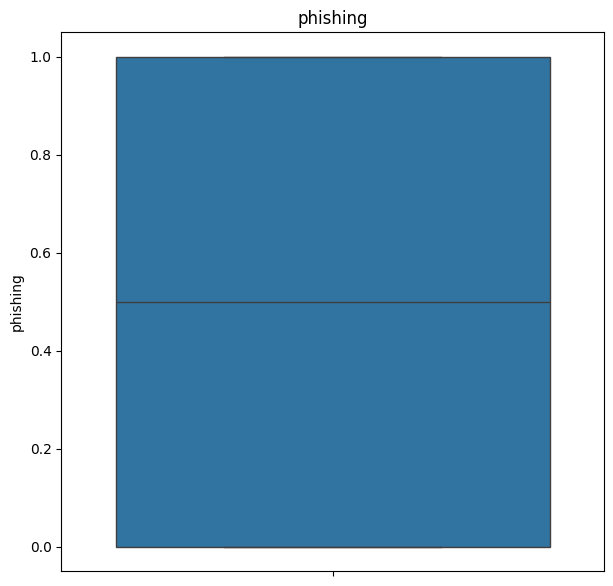

<Figure size 700x700 with 0 Axes>

In [30]:
for feature in discrete_features:
    sns.boxplot(data=test_data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,7))

# Feature Selection
In Feature selection we are going to drop all correlated independent features


In [31]:
X_train = train_data.drop(columns='phishing', axis=1)
y_train = train_data[['phishing']]

X_test = test_data.drop(columns='phishing', axis=1)
y_test = test_data[['phishing']]

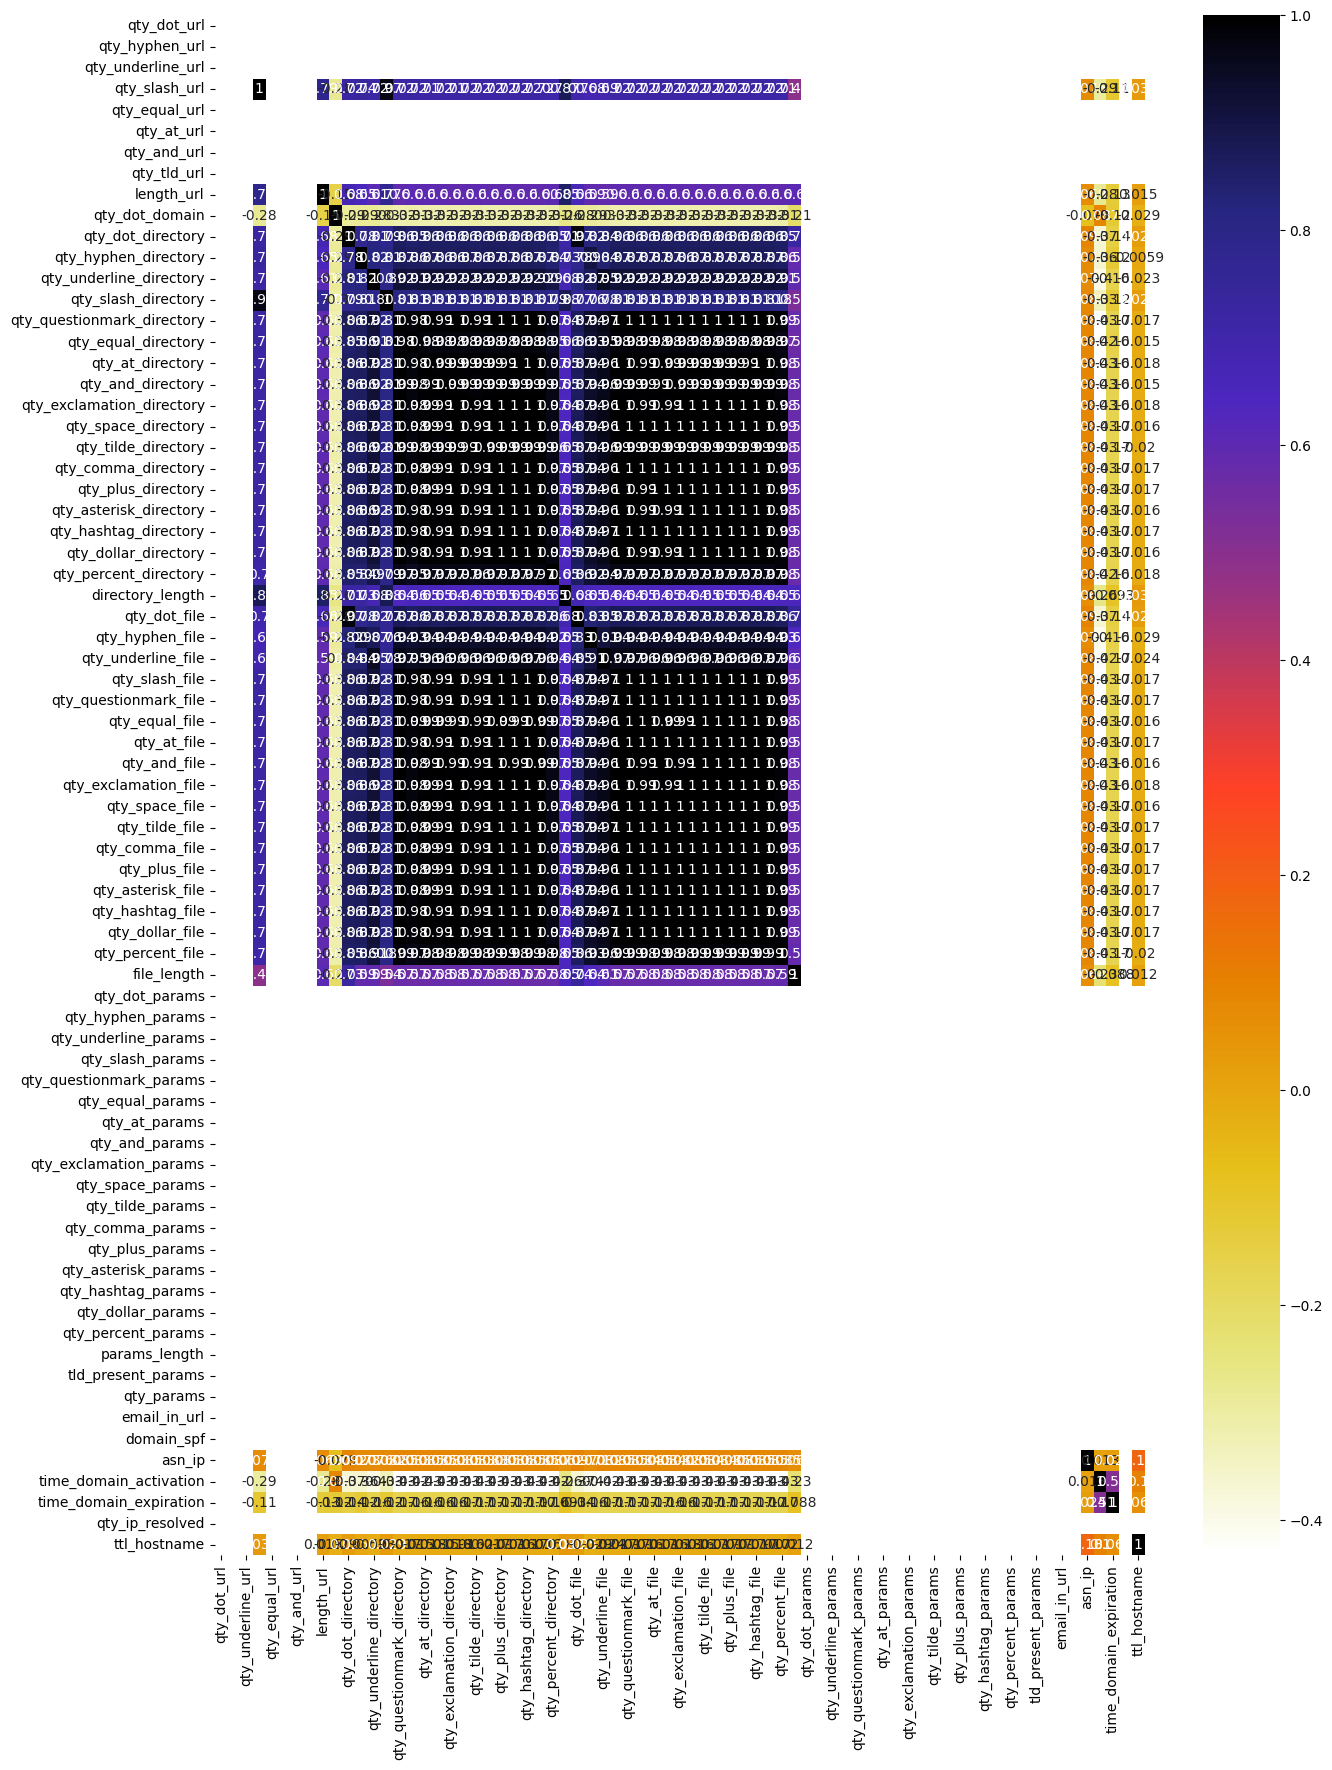

In [32]:
plt.figure(figsize=(15,20))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # interested in absolute coefficient value only
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Droping correlated features from train data


In [34]:
# threshold - 85% i.e. if they are related by 85%
corr_features = correlation(X_train, 0.85)
print(f"Total number of highly correlated features is : {len(corr_features)}\n")
print(f"All the Highly correlated features are as follows :")
corr_features

Total number of highly correlated features is : 32

All the Highly correlated features are as follows :


{'directory_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_at_directory',
 'qty_at_file',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hyphen_file',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_underline_file'}

In [35]:
X_train.drop(columns=corr_features, axis=1, inplace=True)

In [36]:
X_train.shape

(77644, 41)

# Droping correlated features from test data


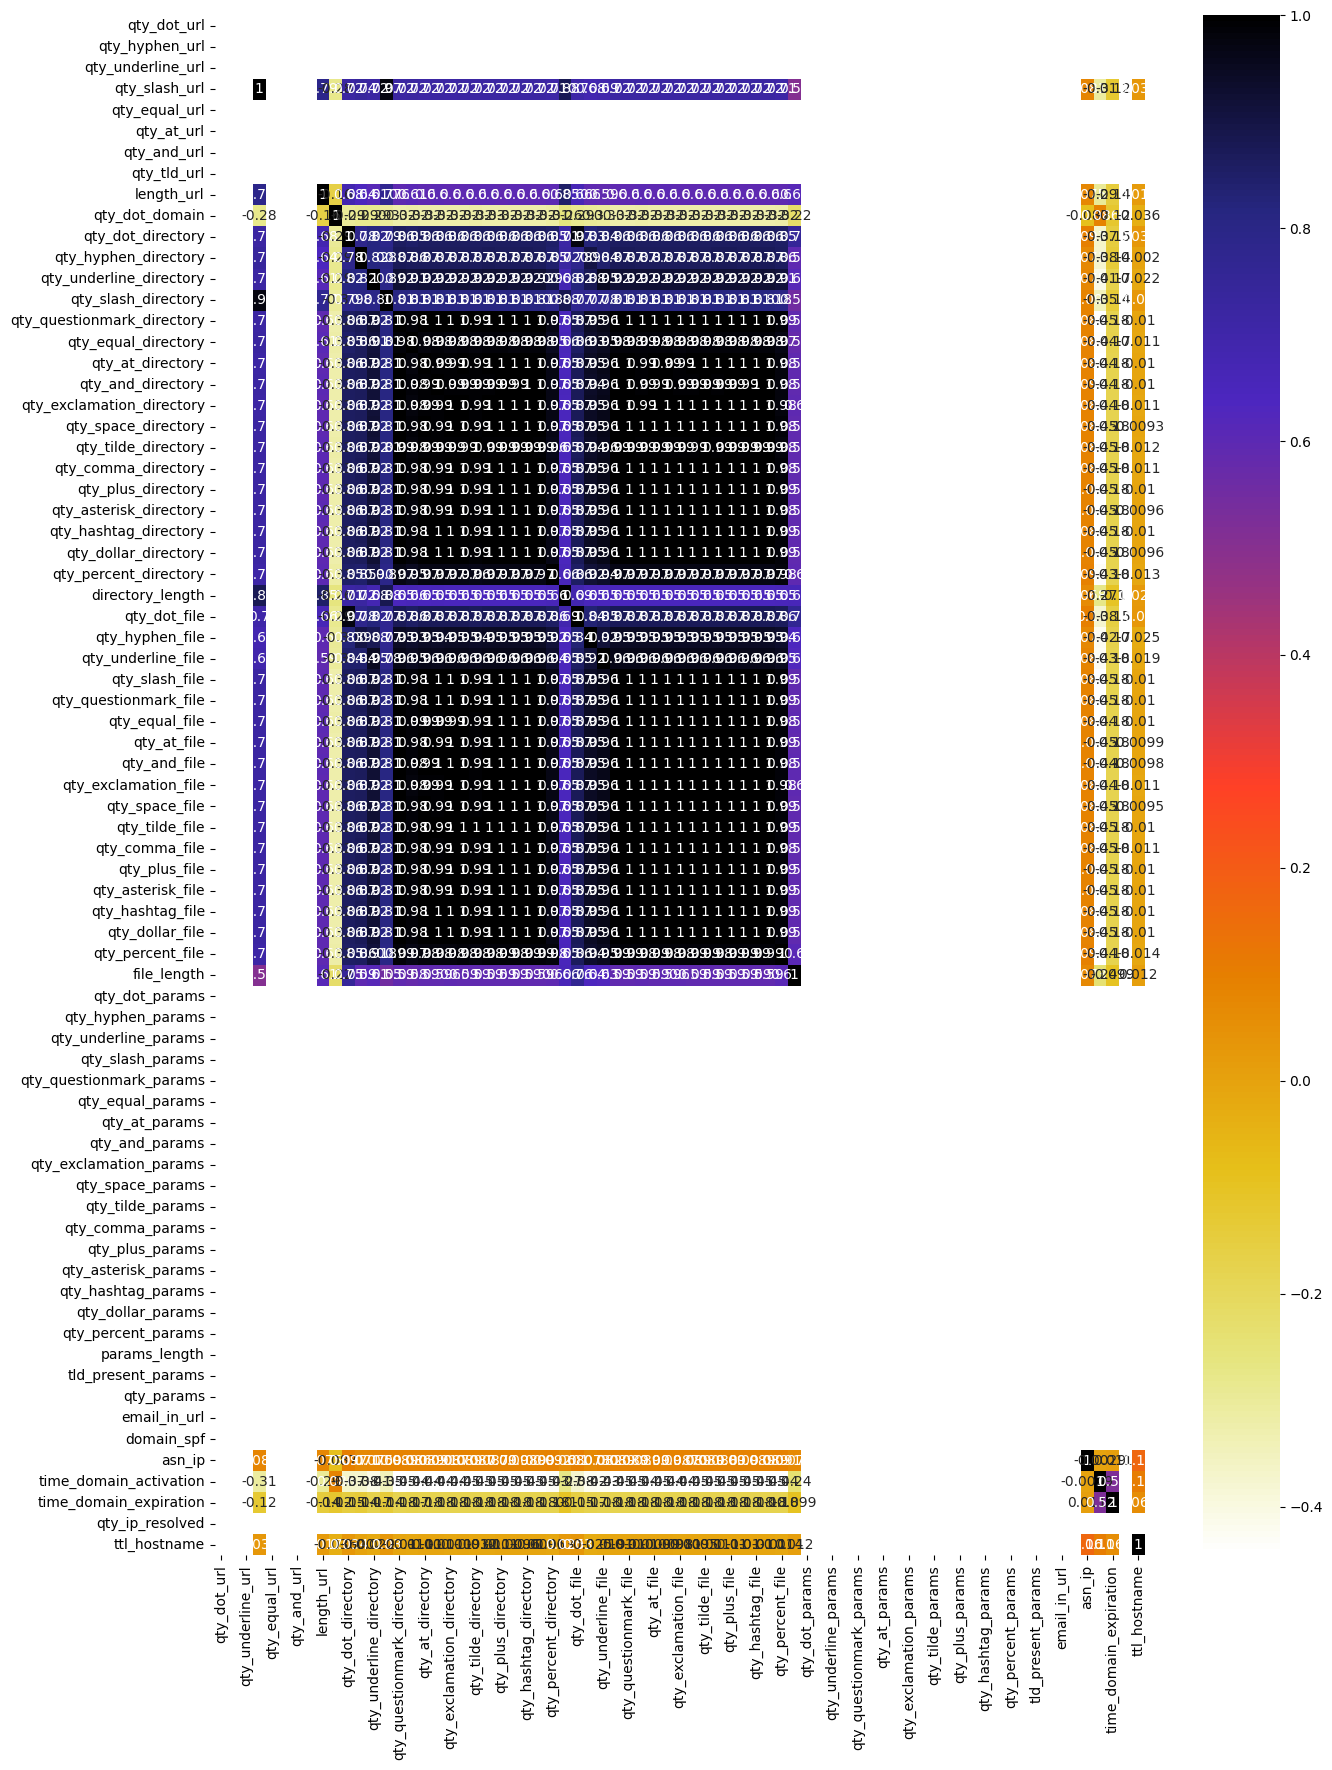

In [37]:
plt.figure(figsize=(15,20))
corr_test = X_test.corr()
sns.heatmap(data=corr_test, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
# threshold - 85%, i.e. if they are correlated by 85%
corr_features = correlation(X_test, 0.85)
print(f"Total number of highly correlated features is : {len(corr_features)}\n")
print(f"All the Highly correlated features are as follows :")
corr_features

Total number of highly correlated features is : 32

All the Highly correlated features are as follows :


{'directory_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_at_directory',
 'qty_at_file',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hyphen_file',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_underline_file'}

In [39]:
X_test.drop(columns=corr_features, axis=1, inplace=True)

In [40]:
X_test.shape

(38356, 41)

# Removing features having 0 varience using Varience Threshold from train data
This piece of code is performing feature selection based on variance using the VarianceThreshold class from scikit-learn. The goal is to identify and remove features with low variance, as these features are likely to provide little information and may not contribute significantly to the model.

In [41]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [43]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

30


In [45]:
for column in constant_columns:
    print(column)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_equal_url
qty_at_url
qty_and_url
qty_tld_url
qty_dot_params
qty_hyphen_params
qty_underline_params
qty_slash_params
qty_questionmark_params
qty_equal_params
qty_at_params
qty_and_params
qty_exclamation_params
qty_space_params
qty_tilde_params
qty_comma_params
qty_plus_params
qty_asterisk_params
qty_hashtag_params
qty_dollar_params
qty_percent_params
params_length
tld_present_params
qty_params
email_in_url
domain_spf
qty_ip_resolved


In [46]:
X_train.drop(columns=constant_columns, axis=1, inplace=True)

In [47]:
X_train.shape

(77644, 11)

# Removing features having 0 varience using Varience Threshold from test data


In [49]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_test)

VarianceThreshold(threshold=0)

In [52]:
constant_columns = [column for column in X_test.columns if column not in X_test.columns[var_thres.get_support()]]
print(len(constant_columns))

30


In [53]:
for column in constant_columns:
    print(column)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_equal_url
qty_at_url
qty_and_url
qty_tld_url
qty_dot_params
qty_hyphen_params
qty_underline_params
qty_slash_params
qty_questionmark_params
qty_equal_params
qty_at_params
qty_and_params
qty_exclamation_params
qty_space_params
qty_tilde_params
qty_comma_params
qty_plus_params
qty_asterisk_params
qty_hashtag_params
qty_dollar_params
qty_percent_params
params_length
tld_present_params
qty_params
email_in_url
domain_spf
qty_ip_resolved


In [54]:
X_test.drop(constant_columns, axis=1, inplace=True)

In [55]:
X_test.shape

(38356, 11)

In [56]:
df_final_train = pd.DataFrame(X_train)
df_final_test = pd.DataFrame(X_test)

In [57]:
df_final_train 

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0                0.0        22.0             2.0               -1.0   
1                0.0        11.0             2.0               -1.0   
2                0.0        21.0             3.0               -1.0   
3                6.0        79.0             1.0                0.0   
4                1.0        71.0             2.0                0.0   
...              ...         ...             ...                ...   
77639            2.0        50.0             2.0                1.0   
77640            3.0        39.0             2.0                0.0   
77641            4.0        95.5             1.0                1.0   
77642            1.0        14.0             1.0                0.0   
77643            2.0        95.5             2.0                0.0   

       qty_hyphen_directory  qty_underline_directory  file_length   asn_ip  \
0                      -1.0                     -1.0           -1  20013.0   
1                      -1.0                     -1.0           -1  54113.0   
2                      -1.0                     -1.0           -1     -1.0   
3                       0.0                      0.0            0   6697.0   
4                       0.0                      0.0            6  15169.0   
...                     ...                      ...          ...      ...   
77639                   0.0                      0.0            8  47583.0   
77640                   0.0                      0.0            0  15169.0   
77641                   1.0                      0.0           12  38888.0   
77642                   0.0                      0.0            5  26496.0   
77643                   0.0                      0.0            8  24492.0   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                        7507                   161.0       14391.0  
1                        7411                   257.0        3599.0  
2                          -1                    -1.0          -1.0  
3                        1387                    73.0         462.0  
4                        7690                   709.0         227.0  
...                       ...                     ...           ...  
77639                      -1                    -1.0          43.0  
77640                      -1                    -1.0         298.0  
77641                     188                    24.0        5872.0  
77642                    1178                   280.0       10792.0  
77643                      -1                    -1.0         148.0  

[77644 rows x 11 columns]

In [58]:
df_final_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0                0.0        26.0             3.5               -1.0   
1                0.0        20.0             2.0               -1.0   
2                0.0        16.0             2.0               -1.0   
3                0.0        25.0             3.5               -1.0   
4                0.0        18.0             2.0               -1.0   
...              ...         ...             ...                ...   
38351            2.0        39.0             1.0                0.0   
38352            5.0        94.0             1.0                1.0   
38353            1.0        51.0             2.0                0.0   
38354            4.0        77.0             2.0                0.0   
38355            3.0        34.0             2.0                0.0   

       qty_hyphen_directory  qty_underline_directory  file_length   asn_ip  \
0                      -1.0                     -1.0         -1.0  28660.0   
1                      -1.0                     -1.0         -1.0  29873.0   
2                      -1.0                     -1.0         -1.0  13335.0   
3                      -1.0                     -1.0         -1.0  27715.0   
4                      -1.0                     -1.0         -1.0     -1.0   
...                     ...                      ...          ...      ...   
38351                   0.0                      0.0         10.0  46606.0   
38352                   0.0                      0.0          9.0  36444.0   
38353                   1.5                      0.0          0.0  22612.0   
38354                   0.0                      0.0          5.0  12859.0   
38355                   0.0                      0.0          0.0  15886.0   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                      8217.0                    -1.0        3598.0  
1                      5952.0                   256.0        3598.0  
2                       199.0                   165.0         299.0  
3                      7883.0                    -1.0        3585.0  
4                        -1.0                    -1.0          -1.0  
...                       ...                     ...           ...  
38351                  4204.0                   177.0       14369.0  
38352                  1159.0                    78.0         531.0  
38353                   528.0                   142.0        1191.0  
38354                    -1.0                    -1.0         590.0  
38355                  4408.0                   338.0         574.0  

[38356 rows x 11 columns]

# Applying Standard Scalar

In [63]:
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(df_final_train.values)

In [64]:
scaled_features_test = scaler.fit_transform(df_final_test.values)

In [65]:
scaled_features_df_train = pd.DataFrame(scaled_features_train, index=df_final_train.index, columns=df_final_train.columns)
scaled_features_df_test = pd.DataFrame(scaled_features_test, index=df_final_test.index, columns=df_final_test.columns)

In [66]:
scaled_features_df_train

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.860922   -0.587949        0.392668          -1.032758   
1          -0.860922   -1.024684        0.392668          -1.032758   
2          -0.860922   -0.627653        1.972167          -1.032758   
3           2.323646    1.675131       -1.186832           0.247333   
4          -0.330160    1.357506        0.392668           0.247333   
...              ...         ...             ...                ...   
77639       0.200601    0.523739        0.392668           1.527424   
77640       0.731362    0.087004        0.392668           0.247333   
77641       1.262124    2.330233       -1.186832           1.527424   
77642      -0.330160   -0.905575       -1.186832           0.247333   
77643       0.200601    2.330233        0.392668           0.247333   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039196                -1.104161    -0.688787 -0.325310   
1                 -1.039196                -1.104161    -0.688787  1.586329   
2                 -1.039196                -1.104161    -0.688787 -1.447290   
3                  0.445405                 0.635820    -0.512569 -1.071802   
4                  0.445405                 0.635820     0.544734 -0.596863   
...                     ...                      ...          ...       ...   
77639              0.445405                 0.635820     0.897168  1.220258   
77640              0.445405                 0.635820    -0.512569 -0.596863   
77641              1.930007                 0.635820     1.602037  0.732819   
77642              0.445405                 0.635820     0.368516  0.038126   
77643              0.445405                 0.635820     0.897168 -0.074218   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                    1.555394               -0.274632      1.286387  
1                    1.522588                0.082205     -0.300153  
2                   -1.010293               -0.876794     -0.829392  
3                   -0.535976               -0.601733     -0.761326  
4                    1.617930                1.762312     -0.795873  
...                       ...                     ...           ...  
77639               -1.010293               -0.876794     -0.822923  
77640               -1.010293               -0.876794     -0.785436  
77641               -0.945707               -0.783868      0.034002  
77642               -0.607397                0.167697      0.757295  
77643               -1.010293               -0.876794     -0.807487  

[77644 rows x 11 columns]

In [67]:
scaled_features_df_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.859817   -0.427256        2.757910          -1.030919   
1          -0.859817   -0.665828        0.386090          -1.030919   
2          -0.859817   -0.824876        0.386090          -1.030919   
3          -0.859817   -0.467018        2.757910          -1.030919   
4          -0.859817   -0.745352        0.386090          -1.030919   
...              ...         ...             ...                ...   
38351       0.206787    0.089650       -1.195124           0.256127   
38352       1.806695    2.276561       -1.195124           1.543174   
38353      -0.326515    0.566794        0.386090           0.256127   
38354       1.273392    1.600607        0.386090           0.256127   
38355       0.740090   -0.109160        0.386090           0.256127   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039011                -1.101073    -0.707094  0.141845   
1                 -1.039011                -1.101073    -0.707094  0.209510   
2                 -1.039011                -1.101073    -0.707094 -0.713032   
3                 -1.039011                -1.101073    -0.707094  0.089130   
4                 -1.039011                -1.101073    -0.707094 -1.456956   
...                     ...                      ...          ...       ...   
38351              0.462413                 0.641850     1.350342  1.142929   
38352              0.462413                 0.641850     1.163302  0.576061   
38353              2.714549                 0.641850    -0.520055 -0.195531   
38354              0.462413                 0.641850     0.415144 -0.739584   
38355              0.462413                 0.641850    -0.520055 -0.570729   

       time_domain_activation  time_domain_expiration  ttl_hostname  
0                    1.802048               -0.873922     -0.299607  
1                    1.030622                0.100443     -0.299607  
2                   -0.928769               -0.244566     -0.783247  
3                    1.688293               -0.873922     -0.301513  
4                   -0.996886               -0.873922     -0.827227  
...                       ...                     ...           ...  
38351                0.435278               -0.199070      1.279442  
38352               -0.601806               -0.574409     -0.749235  
38353               -0.816716               -0.331766     -0.652478  
38354               -0.996886               -0.873922     -0.740586  
38355                0.504757                0.411330     -0.742931  

[38356 rows x 11 columns]

In [68]:
scaled_features_df_train['phishing'] = pd.DataFrame(y)['phishing'] = pd.DataFrame(y_train)
scaled_features_df_test['phishing'] = pd.DataFrame(y_test)

# Converting the preproccessed Dataframe to a csv file


In [71]:
scaled_features_df_train.to_csv('data/train.csv', index=False)
scaled_features_df_test.to_csv('data/test.csv', index=False)

In [72]:
df_reader_train = pd.read_csv('data/train.csv')
df_reader_test = pd.read_csv('data/test.csv')

In [73]:
df_reader_train

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.860922   -0.587949        0.392668          -1.032758   
1          -0.860922   -1.024684        0.392668          -1.032758   
2          -0.860922   -0.627653        1.972167          -1.032758   
3           2.323646    1.675131       -1.186832           0.247333   
4          -0.330160    1.357506        0.392668           0.247333   
...              ...         ...             ...                ...   
77639       0.200601    0.523739        0.392668           1.527424   
77640       0.731362    0.087004        0.392668           0.247333   
77641       1.262124    2.330233       -1.186832           1.527424   
77642      -0.330160   -0.905575       -1.186832           0.247333   
77643       0.200601    2.330233        0.392668           0.247333   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039196                -1.104161    -0.688787 -0.325310   
1                 -1.039196                -1.104161    -0.688787  1.586329   
2                 -1.039196                -1.104161    -0.688787 -1.447290   
3                  0.445405                 0.635820    -0.512569 -1.071802   
4                  0.445405                 0.635820     0.544734 -0.596863   
...                     ...                      ...          ...       ...   
77639              0.445405                 0.635820     0.897168  1.220258   
77640              0.445405                 0.635820    -0.512569 -0.596863   
77641              1.930007                 0.635820     1.602037  0.732819   
77642              0.445405                 0.635820     0.368516  0.038126   
77643              0.445405                 0.635820     0.897168 -0.074218   

       time_domain_activation  time_domain_expiration  ttl_hostname  phishing  
0                    1.555394               -0.274632      1.286387       0.0  
1                    1.522588                0.082205     -0.300153       0.0  
2                   -1.010293               -0.876794     -0.829392       0.0  
3                   -0.535976               -0.601733     -0.761326       1.0  
4                    1.617930                1.762312     -0.795873       0.0  
...                       ...                     ...           ...       ...  
77639               -1.010293               -0.876794     -0.822923       1.0  
77640               -1.010293               -0.876794     -0.785436       1.0  
77641               -0.945707               -0.783868      0.034002       1.0  
77642               -0.607397                0.167697      0.757295       1.0  
77643               -1.010293               -0.876794     -0.807487       1.0  

[77644 rows x 12 columns]

In [74]:
df_reader_test

qty_slash_url  length_url  qty_dot_domain  qty_dot_directory  \
0          -0.859817   -0.427256        2.757910          -1.030919   
1          -0.859817   -0.665828        0.386090          -1.030919   
2          -0.859817   -0.824876        0.386090          -1.030919   
3          -0.859817   -0.467018        2.757910          -1.030919   
4          -0.859817   -0.745352        0.386090          -1.030919   
...              ...         ...             ...                ...   
38351       0.206787    0.089650       -1.195124           0.256127   
38352       1.806695    2.276561       -1.195124           1.543174   
38353      -0.326515    0.566794        0.386090           0.256127   
38354       1.273392    1.600607        0.386090           0.256127   
38355       0.740090   -0.109160        0.386090           0.256127   

       qty_hyphen_directory  qty_underline_directory  file_length    asn_ip  \
0                 -1.039011                -1.101073    -0.707094  0.141845   
1                 -1.039011                -1.101073    -0.707094  0.209510   
2                 -1.039011                -1.101073    -0.707094 -0.713032   
3                 -1.039011                -1.101073    -0.707094  0.089130   
4                 -1.039011                -1.101073    -0.707094 -1.456956   
...                     ...                      ...          ...       ...   
38351              0.462413                 0.641850     1.350342  1.142929   
38352              0.462413                 0.641850     1.163302  0.576061   
38353              2.714549                 0.641850    -0.520055 -0.195531   
38354              0.462413                 0.641850     0.415144 -0.739584   
38355              0.462413                 0.641850    -0.520055 -0.570729   

       time_domain_activation  time_domain_expiration  ttl_hostname  phishing  
0                    1.802048               -0.873922     -0.299607       0.0  
1                    1.030622                0.100443     -0.299607       0.0  
2                   -0.928769               -0.244566     -0.783247       0.0  
3                    1.688293               -0.873922     -0.301513       0.0  
4                   -0.996886               -0.873922     -0.827227       0.0  
...                       ...                     ...           ...       ...  
38351                0.435278               -0.199070      1.279442       1.0  
38352               -0.601806               -0.574409     -0.749235       1.0  
38353               -0.816716               -0.331766     -0.652478       1.0  
38354               -0.996886               -0.873922     -0.740586       1.0  
38355                0.504757                0.411330     -0.742931       1.0  

[38356 rows x 12 columns]

In [77]:
for feature in df_reader_train.columns:
    print(feature)

qty_slash_url
length_url
qty_dot_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
file_length
asn_ip
time_domain_activation
time_domain_expiration
ttl_hostname
phishing


In [78]:
for feature in df_reader_test.columns:
    print(feature)

qty_slash_url
length_url
qty_dot_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
file_length
asn_ip
time_domain_activation
time_domain_expiration
ttl_hostname
phishing


In [79]:
numerical_feature_train = [feature for feature in df_reader_train.columns if df_reader_train[feature].dtype != 'O']
numerical_feature_test = [feature for feature in df_reader_test.columns if df_reader_test[feature].dtype != 'O']
discrete_feature_train=[feature for feature in numerical_feature_train if len(df_reader_train[feature].unique())<25]
discrete_feature_test=[feature for feature in numerical_feature_test if len(df_reader_test[feature].unique())<25]
continuous_feature_train = [feature for feature in numerical_feature_train if feature not in discrete_feature_train]
continuous_feature_test = [feature for feature in numerical_feature_test if feature not in discrete_feature_test]

# Preprocessed continuous Features distribution

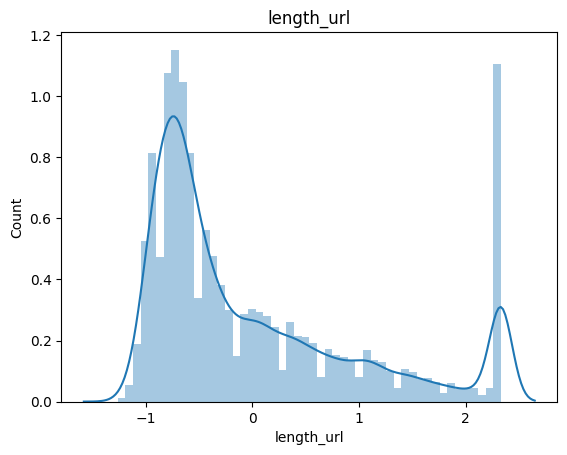

<Figure size 1500x1500 with 0 Axes>

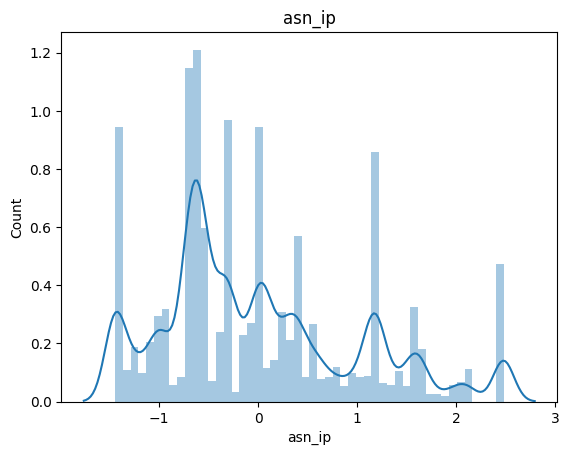

<Figure size 1500x1500 with 0 Axes>

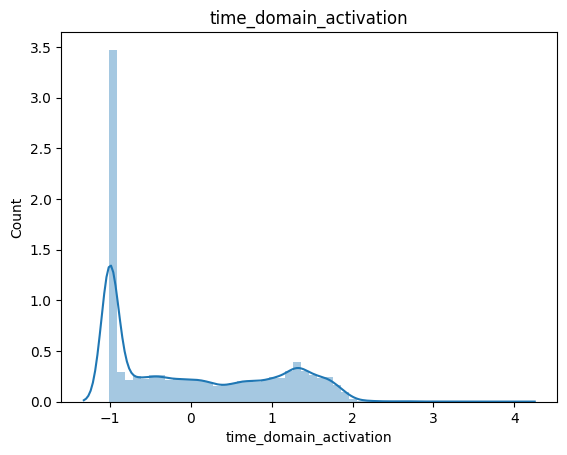

<Figure size 1500x1500 with 0 Axes>

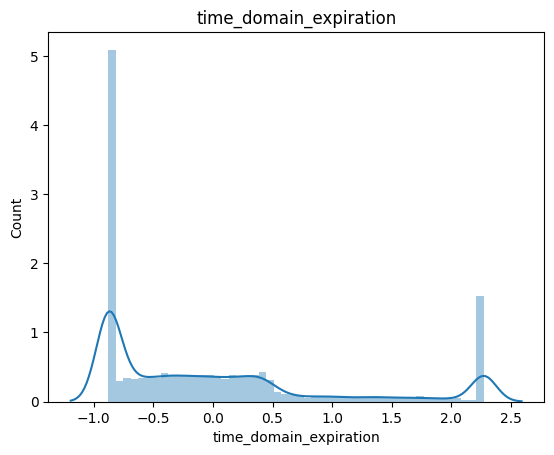

<Figure size 1500x1500 with 0 Axes>

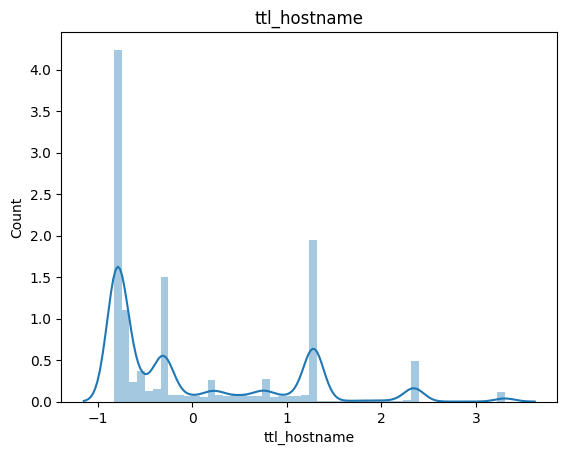

<Figure size 1500x1500 with 0 Axes>

In [81]:
for feature in continuous_feature_train:
    sns.distplot(df_reader_train[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

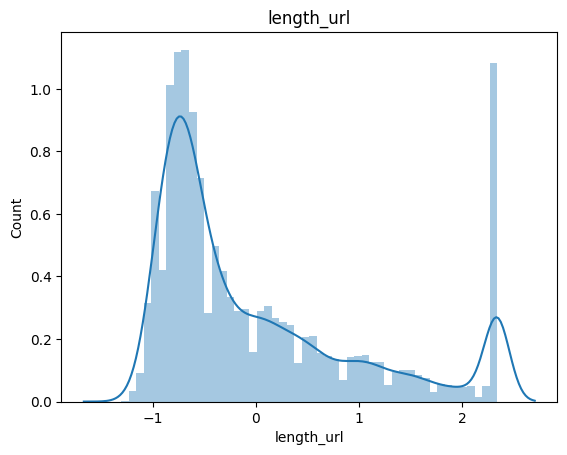

<Figure size 1500x1500 with 0 Axes>

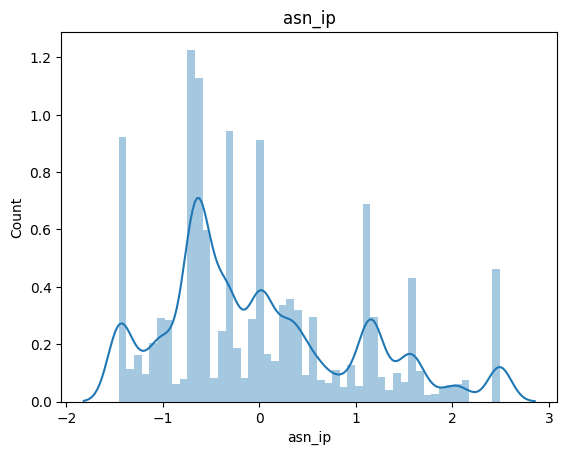

<Figure size 1500x1500 with 0 Axes>

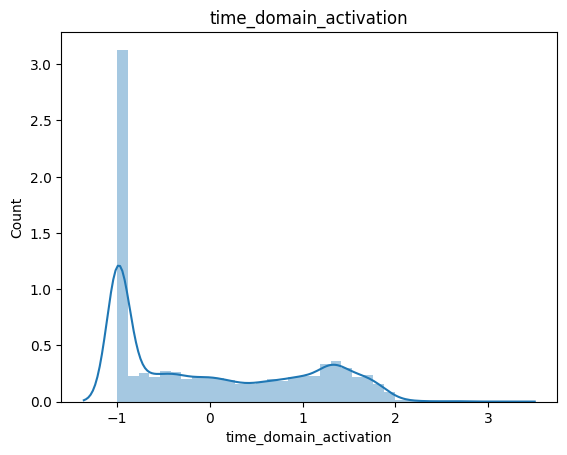

<Figure size 1500x1500 with 0 Axes>

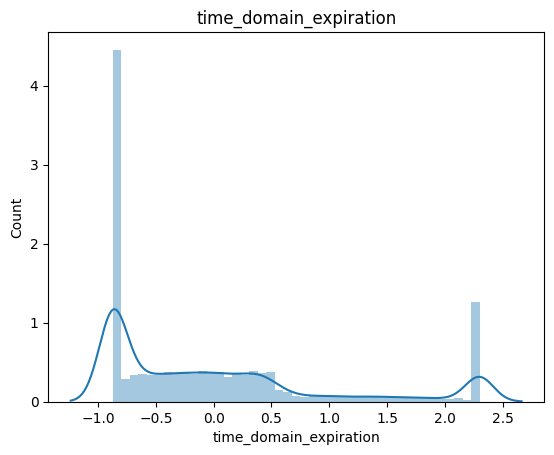

<Figure size 1500x1500 with 0 Axes>

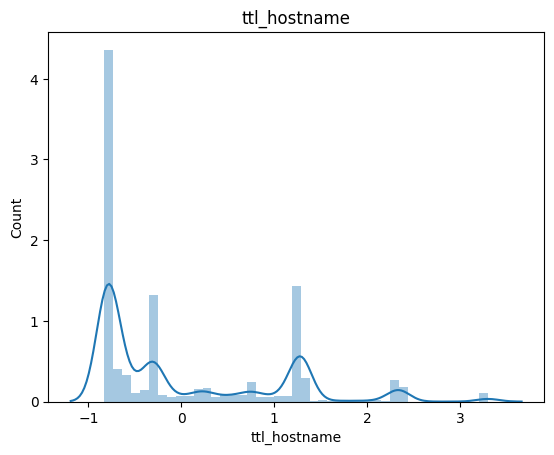

<Figure size 1500x1500 with 0 Axes>

In [82]:
for feature in continuous_feature_test:
    sns.distplot(df_reader_test[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Preprocessed Discrete Features distribution

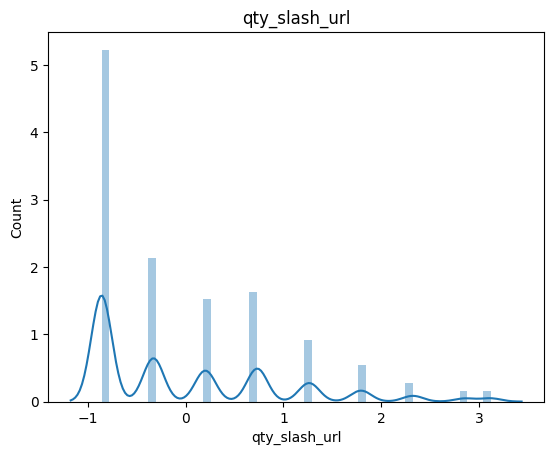

<Figure size 1500x1500 with 0 Axes>

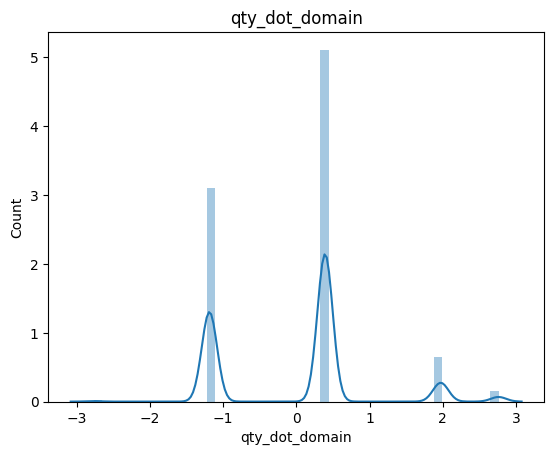

<Figure size 1500x1500 with 0 Axes>

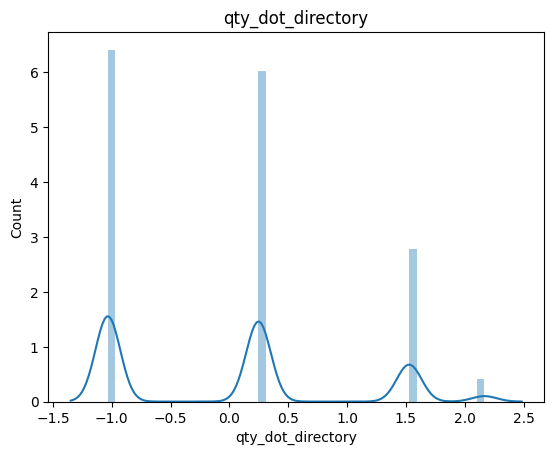

<Figure size 1500x1500 with 0 Axes>

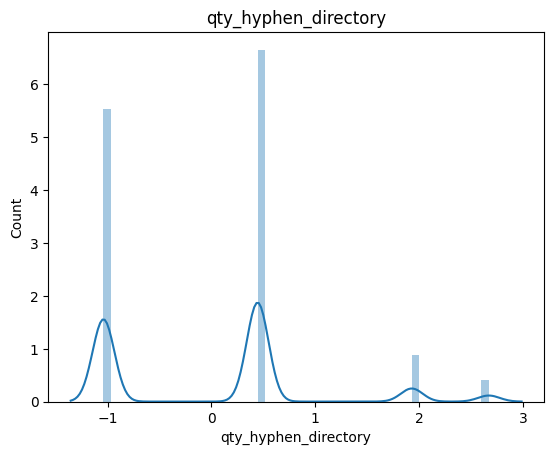

<Figure size 1500x1500 with 0 Axes>

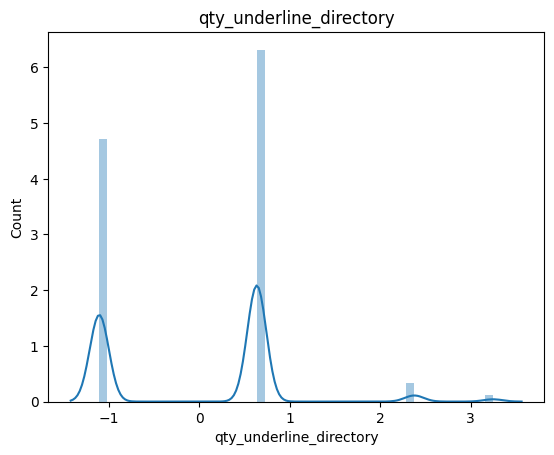

<Figure size 1500x1500 with 0 Axes>

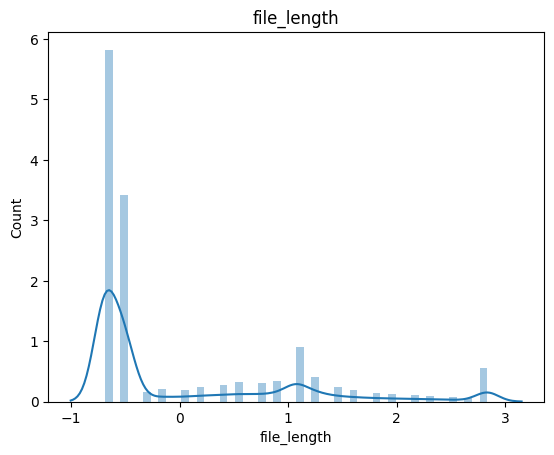

<Figure size 1500x1500 with 0 Axes>

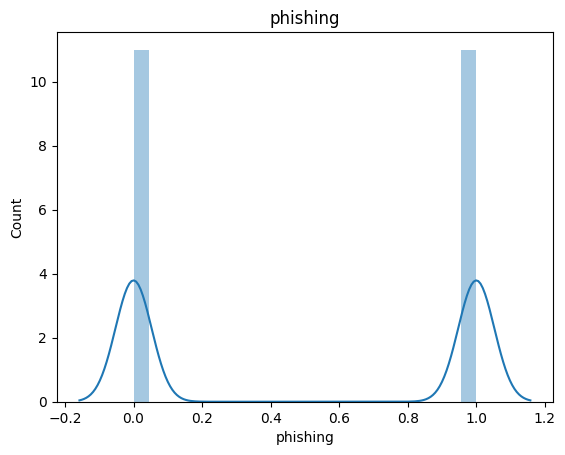

<Figure size 1500x1500 with 0 Axes>

In [84]:
for feature in discrete_feature_train:
    sns.distplot(df_reader_train[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

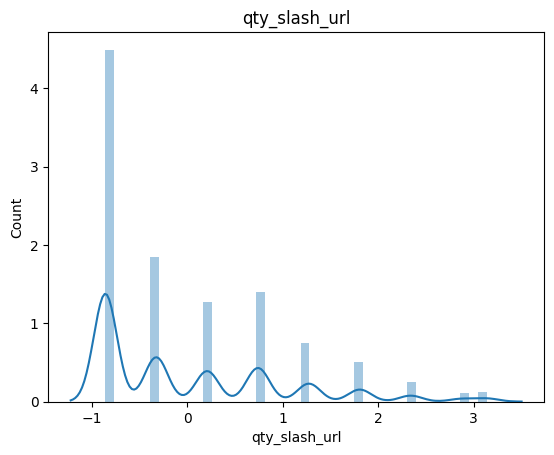

<Figure size 1500x1500 with 0 Axes>

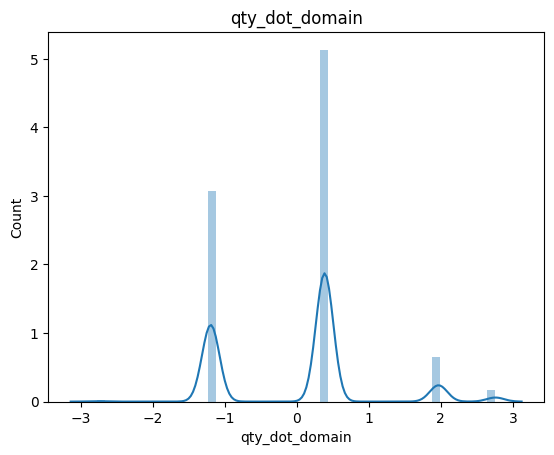

<Figure size 1500x1500 with 0 Axes>

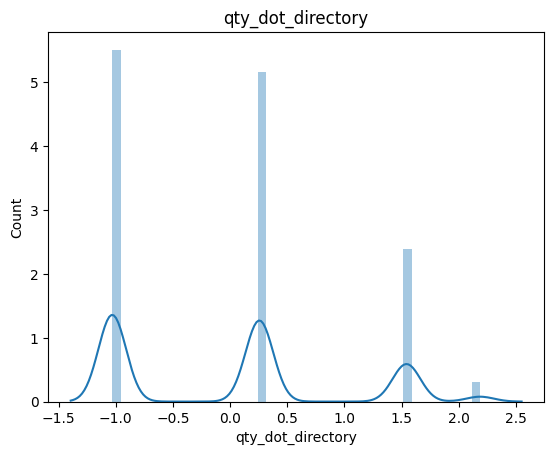

<Figure size 1500x1500 with 0 Axes>

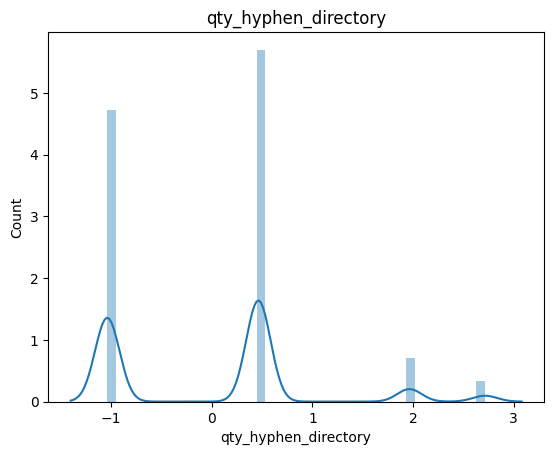

<Figure size 1500x1500 with 0 Axes>

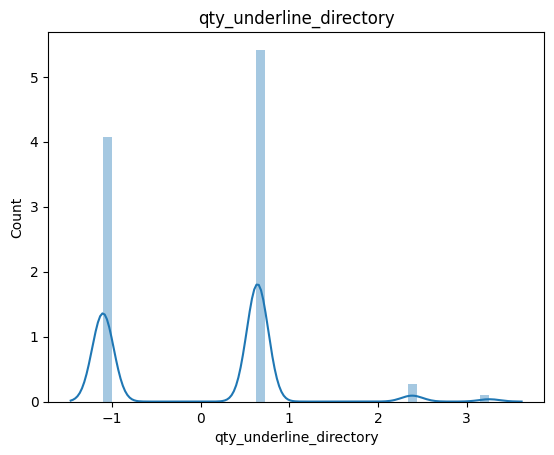

<Figure size 1500x1500 with 0 Axes>

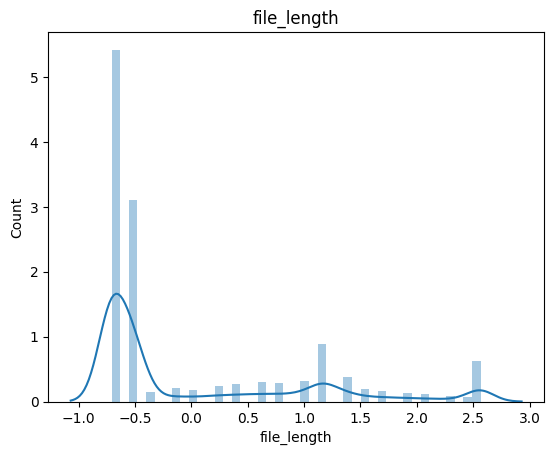

<Figure size 1500x1500 with 0 Axes>

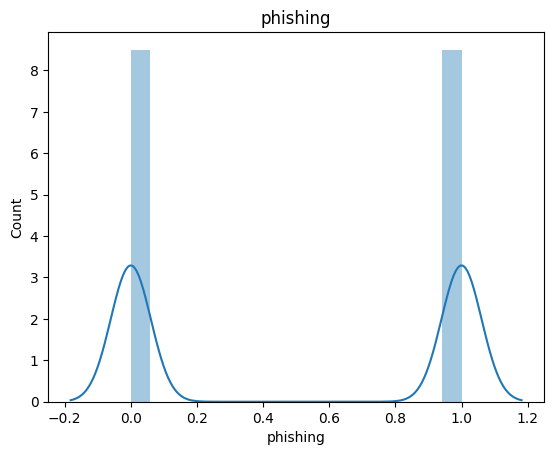

<Figure size 1500x1500 with 0 Axes>

In [85]:
for feature in discrete_feature_test:
    sns.distplot(df_reader_test[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()